# Pandas

# Librerias

In [1]:
# general
import numpy as np
import pandas as pd
import re
import os
import timeit


# visualización
import seaborn as sns
import matplotlib.pyplot as plt

from warnings import warn
plt.style.use('seaborn-colorblind')
#from data_exploration import explore

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import scipy.stats as stats
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier, RandomForestRegressor
from sklearn.metrics import roc_auc_score, mean_squared_error
import pylab
from sklearn.feature_selection import mutual_info_classif,chi2
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.tree import DecisionTreeRegressor



C:\Users\Diego\AppData\Local\Temp\ipykernel_15792\238516399.py:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-colorblind')


# List comprehension: for simplificado

obj= [action for x in obj]

# Funciones

Estas funciones y métodos para ETL  fueron creadas por 2018.11.17 Created by Eamon.Zhang

CITA IEEE: 
Zhang , E. (2018) Ashishpatel26/amazing-feature-engineering: Feature engineering is the process of using domain knowledge to extract features from raw data via data mining techniques. these features can be used to improve the performance of machine learning algorithms. feature engineering can be considered as applied machine learning itself., GitHub. Available at: https://github.com/ashishpatel26/Amazing-Feature-Engineering (Accessed: 20 August 2023). 


* Exploración
* Missing Values
* Tratamiento de Outliers
* Valores Raros (anormales)
* Discretización 
* Transformación
* Selección de Variables


In [2]:
from data_exploration import explore
from feature_cleaning import missing_data, outlier, rare_values
from feature_engineering import discretization, encoding, transformation
from feature_selection import embedded_method, feature_shuffle, filter_method, hybrid

## Exploración

In [8]:

def get_dtypes(data,drop_col=[]):
    """Return the dtypes for each column of a pandas Dataframe

    Parameters
    ----------
    data : pandas Dataframe

    drop_col : columns to omit in a list

    Returns
    -------
    str_var_list, num_var_list, all_var_list
    
    """

    name_of_col = list(data.columns)
    num_var_list = []
    str_var_list = []
    all_var_list = []

    str_var_list = name_of_col.copy()
    for var in name_of_col:
        # check if column belongs to numeric type
        if (data[var].dtypes in (np.int, np.int64, np.uint, np.int32, np.float,
                               np.float64, np.float32, np.double)):
            str_var_list.remove(var)
            num_var_list.append(var)
    # drop the omit column from list
    for var in drop_col:
        if var in str_var_list:
            str_var_list.remove(var)
        if var in num_var_list:
            num_var_list.remove(var)

    all_var_list.extend(str_var_list)
    all_var_list.extend(num_var_list)
    return str_var_list, num_var_list, all_var_list


def describe(data,output_path=None):
    """output the general description of a  pandas Dataframe
       into a csv file
    
    """
    
    result = data.describe(include='all')
    if output_path is not None:
        output = os.path.join(output_path,'describe.csv')
        result.to_csv(output)
        print('result saved at:', str(output))
    return result
    
    
def discrete_var_barplot(x,y,data,output_path=None):
    """draw the barplot of a discrete variable x against y(target variable). 
    By default the bar shows the mean value of y.

    Parameters
    ----------


    Returns
    -------
    figure save as PNG
    """
    
    plt.figure(figsize=(15,10))
    sns.barplot(x=x,y=y,data=data)
    if output_path is not None:
        output = os.path.join(output_path,'Barplot_'+str(x)+'_'+str(y)+'.png')
        plt.savefig(output)   
        print('Image saved at', str(output))
    
    
def discrete_var_countplot(x,data,output_path=None):
    """draw the countplot of a discrete variable x.

    Parameters
    ----------


    Returns
    -------
    figure save as PNG
    """    
    
    plt.figure(figsize=(15,10))
    sns.countplot(x=x,data=data)
    if output_path is not None:
        output = os.path.join(output_path,'Countplot_'+str(x)+'.png')
        plt.savefig(output) 
        print('Image saved at',str(output))


def discrete_var_boxplot(x,y,data,output_path=None):
    """draw the boxplot of a discrete variable x against y.

    Parameters
    ----------


    Returns
    -------
    figure save as PNG
    """    
        
    plt.figure(figsize=(15,10))
    sns.boxplot(x=x,y=y,data=data)
    if output_path is not None:
        output = os.path.join(output_path,'Boxplot_'+str(x)+'_'+str(y)+'.png')
        plt.savefig(output) 
        print('Image saved at',str(output))


def continuous_var_distplot(x,output_path=None,bins=None):
    """draw the distplot of a continuous variable x.

    Parameters
    ----------


    Returns
    -------
    figure save as PNG
    """    
    
    plt.figure(figsize=(15,10))
    sns.distplot(a=x,kde=False,bins=bins)
    if output_path is not None:
        output=os.path.join(output_path,'Distplot_'+str(x.name)+'.png')
        plt.savefig(output)
        print('Image saved at',str(output))    
    
    
# 2018.11.28 Created by Eamon.Zhang 

def scatter_plot(x,y,data,output_path=None):
    """draw the scatter-plot of two variables.

    Parameters
    ----------


    Returns
    -------
    figure save as PNG
    """    
    
    plt.figure(figsize=(15,10))
    sns.scatterplot(x=x,y=y,data=data)
    if output_path is not None:
        output = os.path.join(output_path,'Scatter_plot_'+str(x.name)+'_'+str(y.name)+'.png')
        plt.savefig(output)
        print('Image saved at',str(output))       
        
    
def correlation_plot(data,output_path=None):
    """draw the correlation plot between variables.

    Parameters
    ----------


    Returns
    -------
    figure save as PNG
    """    
    
    corrmat = data.corr()
    fig, ax = plt.subplots()
    fig.set_size_inches(11,11)
    sns.heatmap(corrmat,cmap="YlGnBu",linewidths=.5,annot=True)
    if output_path is not None:
        output = os.path.join(output_path,'Corr_plot'+'.png')
        plt.savefig(output)
        print('Image saved at',str(output))  
    
    
def heatmap(data,output_path=None,fmt='d'):
    """draw the heatmap between 2 variables.

    Parameters
    ----------


    Returns
    -------
    figure save as PNG
    """    
    
    fig, ax = plt.subplots()
    fig.set_size_inches(11,11)
    sns.heatmap(data,cmap="YlGnBu",linewidths=.5,annot=True,fmt=fmt)
    if output_path is not None:
        output = os.path.join(output_path,'Heatmap'+'.png')
        plt.savefig(output)
        print('Image saved at',str(output)) 

## Missing Values

In [11]:


def check_missing(data,output_path=None):
    """
    check the total number & percentage of missing values
    per variable of a pandas Dataframe
    """
    
    result = pd.concat([data.isnull().sum(),data.isnull().mean()],axis=1)
    result = result.rename(index=str,columns={0:'total missing',1:'proportion'})
    if output_path is not None:
        result.to_csv(output_path+'missing.csv')
        print('result saved at', output_path, 'missing.csv')
    return result


def drop_missing(data,axis=0):
    """
    Listwise deletion:
    excluding all cases (listwise) that have missing values

    Parameters
    ----------
    axis: drop cases(0)/columns(1),default 0

    Returns
    -------
    Pandas dataframe with missing cases/columns dropped
    """    
    
    data_copy = data.copy(deep=True)
    data_copy = data_copy.dropna(axis=axis,inplace=False)
    return data_copy
    

def add_var_denote_NA(data,NA_col=[]):
    """
    creating an additional variable indicating whether the data 
    was missing for that observation (1) or not (0).
    """
  
    data_copy = data.copy(deep=True)
    for i in NA_col:
        if data_copy[i].isnull().sum()>0:
            data_copy[i+'_is_NA'] = np.where(data_copy[i].isnull(),1,0)
        else:
            warn("Column %s has no missing cases" % i)
            
    return data_copy


def impute_NA_with_arbitrary(data,impute_value,NA_col=[]):
    """
    replacing NA with arbitrary values. 
    """
    
    data_copy = data.copy(deep=True)
    for i in NA_col:
        if data_copy[i].isnull().sum()>0:
            data_copy[i+'_'+str(impute_value)] = data_copy[i].fillna(impute_value)
        else:
            warn("Column %s has no missing cases" % i)
    return data_copy


def impute_NA_with_avg(data,strategy='mean',NA_col=[]):
    """
    replacing the NA with mean/median/most frequent values of that variable. 
    Note it should only be performed over training set and then propagated to test set.
    """
    
    data_copy = data.copy(deep=True)
    for i in NA_col:
        if data_copy[i].isnull().sum()>0:
            if strategy=='mean':
                data_copy[i+'_impute_mean'] = data_copy[i].fillna(data[i].mean())
            elif strategy=='median':
                data_copy[i+'_impute_median'] = data_copy[i].fillna(data[i].median())
            elif strategy=='mode':
                data_copy[i+'_impute_mode'] = data_copy[i].fillna(data[i].mode()[0])
        else:
            warn("Column %s has no missing" % i)
    return data_copy            


def impute_NA_with_end_of_distribution(data,NA_col=[]):
    """
    replacing the NA by values that are at the far end of the distribution of that variable
    calculated by mean + 3*std
    """
    
    data_copy = data.copy(deep=True)
    for i in NA_col:
        if data_copy[i].isnull().sum()>0:
            data_copy[i+'_impute_end_of_distri'] = data_copy[i].fillna(data[i].mean()+3*data[i].std())
        else:
            warn("Column %s has no missing" % i)
    return data_copy            
    

def impute_NA_with_random(data,NA_col=[],random_state=0):
    """
    replacing the NA with random sampling from the pool of available observations of the variable
    """
    
    data_copy = data.copy(deep=True)
    for i in NA_col:
        if data_copy[i].isnull().sum()>0:
            data_copy[i+'_random'] = data_copy[i]
            # extract the random sample to fill the na
            random_sample = data_copy[i].dropna().sample(data_copy[i].isnull().sum(), random_state=random_state)
            random_sample.index = data_copy[data_copy[i].isnull()].index
            data_copy.loc[data_copy[i].isnull(), str(i)+'_random'] = random_sample
        else:
            warn("Column %s has no missing" % i)
    return data_copy 
    

## Outlier

In [13]:

def outlier_detect_arbitrary(data,col,upper_fence,lower_fence):
    '''
    identify outliers based on arbitrary boundaries passed to the function.
    '''

    para = (upper_fence, lower_fence)
    tmp = pd.concat([data[col]>upper_fence,data[col]<lower_fence],axis=1)
    outlier_index = tmp.any(axis=1)
    print('Num of outlier detected:',outlier_index.value_counts()[1])
    print('Proportion of outlier detected',outlier_index.value_counts()[1]/len(outlier_index))    
    return outlier_index, para



def outlier_detect_IQR(data,col,threshold=3):
    '''
    outlier detection by Interquartile Ranges Rule, also known as Tukey's test. 
    calculate the IQR ( 75th quantile - 25th quantile) 
    and the 25th 75th quantile. 
    Any value beyond:
        upper bound = 75th quantile + （IQR * threshold）
        lower bound = 25th quantile - （IQR * threshold）   
    are regarded as outliers. Default threshold is 3.
    '''
     
    IQR = data[col].quantile(0.75) - data[col].quantile(0.25)
    Lower_fence = data[col].quantile(0.25) - (IQR * threshold)
    Upper_fence = data[col].quantile(0.75) + (IQR * threshold)
    para = (Upper_fence, Lower_fence)
    tmp = pd.concat([data[col]>Upper_fence,data[col]<Lower_fence],axis=1)
    outlier_index = tmp.any(axis=1)
    print('Num of outlier detected:',outlier_index.value_counts()[1])
    print('Proportion of outlier detected',outlier_index.value_counts()[1]/len(outlier_index))
    return outlier_index, para


def outlier_detect_mean_std(data,col,threshold=3):
    '''
    outlier detection by Mean and Standard Deviation Method.
    If a value is a certain number(called threshold) of standard deviations away 
    from the mean, that data point is identified as an outlier. 
    Default threshold is 3.

    This method can fail to detect outliers because the outliers increase the standard deviation. 
    The more extreme the outlier, the more the standard deviation is affected.
    '''
   
    Upper_fence = data[col].mean() + threshold * data[col].std()
    Lower_fence = data[col].mean() - threshold * data[col].std()   
    para = (Upper_fence, Lower_fence)   
    tmp = pd.concat([data[col]>Upper_fence,data[col]<Lower_fence],axis=1)
    outlier_index = tmp.any(axis=1)
    print('Num of outlier detected:',outlier_index.value_counts()[1])
    print('Proportion of outlier detected',outlier_index.value_counts()[1]/len(outlier_index))
    return outlier_index, para


def outlier_detect_MAD(data,col,threshold=3.5):
    """
    outlier detection by Median and Median Absolute Deviation Method (MAD)
    The median of the residuals is calculated. Then, the difference is calculated between each historical value and this median. 
    These differences are expressed as their absolute values, and a new median is calculated and multiplied by 
    an empirically derived constant to yield the median absolute deviation (MAD). 
    If a value is a certain number of MAD away from the median of the residuals, 
    that value is classified as an outlier. The default threshold is 3 MAD.
    
    This method is generally more effective than the mean and standard deviation method for detecting outliers, 
    but it can be too aggressive in classifying values that are not really extremely different. 
    Also, if more than 50% of the data points have the same value, MAD is computed to be 0, 
    so any value different from the residual median is classified as an outlier.
    """
    
    median = data[col].median()
    median_absolute_deviation = np.median([np.abs(y - median) for y in data[col]])
    modified_z_scores = pd.Series([0.6745 * (y - median) / median_absolute_deviation for y in data[col]])
    outlier_index = np.abs(modified_z_scores) > threshold
    print('Num of outlier detected:',outlier_index.value_counts()[1])
    print('Proportion of outlier detected',outlier_index.value_counts()[1]/len(outlier_index))
    return outlier_index


# 2018.11.10 outlier treatment
def impute_outlier_with_arbitrary(data,outlier_index,value,col=[]):
    """
    impute outliers with arbitrary value
    """
    
    data_copy = data.copy(deep=True)
    for i in col:
        data_copy.loc[outlier_index,i] = value
    return data_copy
    
    
def windsorization(data,col,para,strategy='both'):
    """
    top-coding & bottom coding (capping the maximum of a distribution at an arbitrarily set value,vice versa)
    """
    
    data_copy = data.copy(deep=True)  
    if strategy == 'both':
        data_copy.loc[data_copy[col]>para[0],col] = para[0]
        data_copy.loc[data_copy[col]<para[1],col] = para[1]
    elif strategy == 'top':
        data_copy.loc[data_copy[col]>para[0],col] = para[0]
    elif strategy == 'bottom':
        data_copy.loc[data_copy[col]<para[1],col] = para[1]  
    return data_copy


def drop_outlier(data,outlier_index):
    """
    drop the cases that are outliers
    """
    
    data_copy = data[~outlier_index]
    return data_copy


def impute_outlier_with_avg(data,col,outlier_index,strategy='mean'):
    """
    impute outlier with mean/median/most frequent values of that variable.
    """
    
    data_copy = data.copy(deep=True)
    if strategy=='mean':
        data_copy.loc[outlier_index,col] = data_copy[col].mean()
    elif strategy=='median':
        data_copy.loc[outlier_index,col] = data_copy[col].median()
    elif strategy=='mode':
        data_copy.loc[outlier_index,col] = data_copy[col].mode()[0]   
        
    return data_copy


## Valores Raros (Rare Values)

In [14]:


class GroupingRareValues():
    """
    Grouping the observations that show rare labels into a unique category ('rare')
    
    Parameters
    ----------
   
    """

    def __init__(self, mapping=None, cols=None, threshold=0.01):
        self.cols = cols
        self.mapping = mapping
        self._dim = None
        self.threshold = threshold


    def fit(self, X, y=None, **kwargs):
        """Fit encoder according to X and y.
        Parameters
        ----------
        X : array-like, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples
            and n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.
        Returns
        -------
        self : encoder
            Returns self.
        """

        self._dim = X.shape[1]

        _, categories = self.grouping(
            X,
            mapping=self.mapping,
            cols=self.cols,
            threshold=self.threshold
        )
        self.mapping = categories
        return self


    def transform(self, X):
        """Perform the transformation to new categorical data.
        Will use the mapping (if available) and the column list to encode the
        data.
        Parameters
        ----------
        X : array-like, shape = [n_samples, n_features]
        Returns
        -------
        X : Transformed values with encoding applied.
        """

        if self._dim is None:
            raise ValueError('Must train encoder before it can be used to transform data.')

        #  make sure that it is the right size
        if X.shape[1] != self._dim:
            raise ValueError('Unexpected input dimension %d, expected %d' % (X.shape[1], self._dim,))

        X, _ = self.grouping(
            X,
            mapping=self.mapping,
            cols=self.cols,
            threshold=self.threshold
        )

        return X 


    def grouping(self, X_in, threshold, mapping=None, cols=None):
        """
        Grouping the observations that show rare labels into a unique category ('rare')

        """

        X = X_in.copy(deep=True)

#        if cols is None:
#            cols = X.columns.values

        if mapping is not None:  # transform
            mapping_out = mapping
            for i in mapping:
                column = i.get('col') # get the column name
                X[column] = X[column].map(i['mapping'])

#                try:
#                    X[column] = X[column].astype(int)
#                except ValueError as e:
#                    X[column] = X[column].astype(float)
        else: # fit
            mapping_out = []
            for col in cols:
#                if util.is_category(X[col].dtype):
#                    categories = X[col].cat.categories
#                else:
                temp_df = pd.Series(X[col].value_counts()/len(X))
                mapping = { k: ('rare' if k not in temp_df[temp_df >= threshold].index else k)
                          for k in temp_df.index}

                mapping = pd.Series(mapping)
                mapping_out.append({'col': col, 'mapping': mapping, 'data_type': X[col].dtype}, )

        return X, mapping_out



#==============================================================================
# def rare_imputation(X_train, X_test, variable):
#     
#     # find the most frequent category
#     frequent_cat = X_train.groupby(variable)[variable].count().sort_values().tail(1).index.values[0]
#     
#     # find rare labels
#     temp = X_train.groupby([variable])[variable].count()/np.float(len(X_train))
#     rare_cat = [x for x in temp.loc[temp<0.05].index.values]
#     
#     # create new variables, with Rare labels imputed
#     
#     # by the most frequent category
#     X_train[variable+'_freq_imp'] = np.where(X_train[variable].isin(rare_cat), frequent_cat, X_train[variable])
#     X_test[variable+'_freq_imp'] = np.where(X_test[variable].isin(rare_cat), frequent_cat, X_test[variable])
#     
#     # by adding a new label 'Rare'
#     X_train[variable+'_rare_imp'] = np.where(X_train[variable].isin(rare_cat), 'Rare', X_train[variable])
#     X_test[variable+'_rare_imp'] = np.where(X_test[variable].isin(rare_cat), 'Rare', X_test[variable])
#==============================================================================

# 2018.11.26 created by Eamon.Zhang
class ModeImputation():
    """
    Replacing the rare label by most frequent label
    
    Parameters
    ----------
   
    """

    def __init__(self, mapping=None, cols=None, threshold=0.01):
        self.cols = cols
        self.mapping = mapping
        self._dim = None
        self.threshold = threshold


    def fit(self, X, y=None, **kwargs):
        """Fit encoder according to X and y.
        Parameters
        ----------
        X : array-like, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples
            and n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.
        Returns
        -------
        self : encoder
            Returns self.
        """

        self._dim = X.shape[1]

        _, categories = self.impute_with_mode(
            X,
            mapping=self.mapping,
            cols=self.cols,
            threshold=self.threshold
        )
        self.mapping = categories
        return self


    def transform(self, X):
        """Perform the transformation to new categorical data.
        Will use the mapping (if available) and the column list to encode the
        data.
        Parameters
        ----------
        X : array-like, shape = [n_samples, n_features]
        Returns
        -------
        X : Transformed values with encoding applied.
        """

        if self._dim is None:
            raise ValueError('Must train encoder before it can be used to transform data.')

        #  make sure that it is the right size
        if X.shape[1] != self._dim:
            raise ValueError('Unexpected input dimension %d, expected %d' % (X.shape[1], self._dim,))

        X, _ = self.impute_with_mode(
            X,
            mapping=self.mapping,
            cols=self.cols,
            threshold=self.threshold
        )

        return X 


    def impute_with_mode(self, X_in, threshold, mapping=None, cols=None):
        """
        Grouping the observations that show rare labels into a unique category ('rare')

        """

        X = X_in.copy(deep=True)

#        if cols is None:
#            cols = X.columns.values

        if mapping is not None:  # transform
            mapping_out = mapping
            for i in mapping:
                column = i.get('col') # get the column name
                X[column] = X[column].map(i['mapping'])

#                try:
#                    X[column] = X[column].astype(int)
#                except ValueError as e:
#                    X[column] = X[column].astype(float)
        else: # fit
            mapping_out = []
            for col in cols:
#                if util.is_category(X[col].dtype):
#                    categories = X[col].cat.categories
#                else:
                temp_df = pd.Series(X[col].value_counts()/len(X))
                median = X[col].mode()[0]
                mapping = { k: (median if k not in temp_df[temp_df >= threshold].index else k)
                          for k in temp_df.index}

                mapping = pd.Series(mapping)
                mapping_out.append({'col': col, 'mapping': mapping, 'data_type': X[col].dtype}, )

        return X, mapping_out


## Discretización

In [15]:

class ChiMerge():
    """
    supervised discretization using the ChiMerge method.
    
    
    Parameters
    ----------
    confidenceVal: number
        default=3.841, correspond to p=0.05 dof=1
    num_of_bins: int
        number of bins after discretize
    col: str
        the column to be performed
        
    """
    
    def __init__(self, col=None, bins=None, confidenceVal=3.841, num_of_bins=10):
        self.col = col
        self._dim = None
        self.confidenceVal = confidenceVal
        self.bins = bins
        self.num_of_bins = num_of_bins


    def fit(self, X, y, **kwargs):
        """Fit encoder according to X and y.
        Parameters
        ----------
        X : array-like, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples
            and n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.
        Returns
        -------
        self : encoder
            Returns self.
        """

        self._dim = X.shape[1]

        _, bins = self.chimerge(
            X_in=X,
            y=y,
            confidenceVal=self.confidenceVal,
            col=self.col,
            num_of_bins=self.num_of_bins
        )
        self.bins = bins
        return self
    
    
    def transform(self, X):
            """Perform the transformation to new data.
            Will use the tree model and the column list to discretize the
            column.
            Parameters
            ----------
            X : array-like, shape = [n_samples, n_features]
            Returns
            -------
            X : new dataframe with discretized new column.
            """
    
            if self._dim is None:
                raise ValueError('Must train encoder before it can be used to transform data.')
    
            #  make sure that it is the right size
            if X.shape[1] != self._dim:
                raise ValueError('Unexpected input dimension %d, expected %d' % (X.shape[1], self._dim,))
    
            X, _ = self.chimerge(
                X_in=X,
                col=self.col,
                bins=self.bins
            )
    
            return X 

    def chimerge(self, X_in, y=None, confidenceVal=None, num_of_bins=None, col=None, bins=None):
        """
        discretize a variable using ChiMerge

        """

        X = X_in.copy(deep=True)

        if bins is not None:  # transform
            try:
                X[col+'_chimerge'] = pd.cut(X[col],bins=bins,include_lowest=True)
            except Exception as e:
                print(e)
       
        else: # fit
            try:               
                # create an array which save the num of 0/1 samples of the column to be chimerge
                total_num = X.groupby([col])[y].count()
                total_num = pd.DataFrame({'total_num': total_num}) 
                positive_class = X.groupby([col])[y].sum()
                positive_class = pd.DataFrame({'positive_class': positive_class}) 
                regroup = pd.merge(total_num, positive_class, left_index=True, right_index=True,how='inner')  
                regroup.reset_index(inplace=True)
                regroup['negative_class'] = regroup['total_num'] - regroup['positive_class']  
                regroup = regroup.drop('total_num', axis=1)
                np_regroup = np.array(regroup)  
                # merge interval that have 0 pos/neg samples
                i = 0
                while (i <= np_regroup.shape[0] - 2):
                    if ((np_regroup[i, 1] == 0 and np_regroup[i + 1, 1] == 0) or ( np_regroup[i, 2] == 0 and np_regroup[i + 1, 2] == 0)):
                        np_regroup[i, 1] = np_regroup[i, 1] + np_regroup[i + 1, 1]  # pos
                        np_regroup[i, 2] = np_regroup[i, 2] + np_regroup[i + 1, 2]  # neg
                        np_regroup[i, 0] = np_regroup[i + 1, 0]
                        np_regroup = np.delete(np_regroup, i + 1, 0)
                        i = i - 1
                    i = i + 1
                # calculate chi for neighboring intervals
                # ∑[(yA-yB)²/yB]
                chi_table = np.array([])
                for i in np.arange(np_regroup.shape[0] - 1):
                    chi = (np_regroup[i, 1] * np_regroup[i + 1, 2] - np_regroup[i, 2] * np_regroup[i + 1, 1]) ** 2 \
                      * (np_regroup[i, 1] + np_regroup[i, 2] + np_regroup[i + 1, 1] + np_regroup[i + 1, 2]) / \
                      ((np_regroup[i, 1] + np_regroup[i, 2]) * (np_regroup[i + 1, 1] + np_regroup[i + 1, 2]) * (
                      np_regroup[i, 1] + np_regroup[i + 1, 1]) * (np_regroup[i, 2] + np_regroup[i + 1, 2]))
                    chi_table = np.append(chi_table, chi)
                # merge intervals that have closing chi
                while (1):
                    if (len(chi_table) <= (num_of_bins - 1) and min(chi_table) >= confidenceVal):
                        break
                    chi_min_index = np.argwhere(chi_table == min(chi_table))[0]  
                    np_regroup[chi_min_index, 1] = np_regroup[chi_min_index, 1] + np_regroup[chi_min_index + 1, 1]
                    np_regroup[chi_min_index, 2] = np_regroup[chi_min_index, 2] + np_regroup[chi_min_index + 1, 2]
                    np_regroup[chi_min_index, 0] = np_regroup[chi_min_index + 1, 0]
                    np_regroup = np.delete(np_regroup, chi_min_index + 1, 0)
        
                    if (chi_min_index == np_regroup.shape[0] - 1): 
                        chi_table[chi_min_index - 1] = (np_regroup[chi_min_index - 1, 1] * np_regroup[chi_min_index, 2] - np_regroup[chi_min_index - 1, 2] * np_regroup[chi_min_index, 1]) ** 2 \
                                                       * (np_regroup[chi_min_index - 1, 1] + np_regroup[chi_min_index - 1, 2] + np_regroup[chi_min_index, 1] + np_regroup[chi_min_index, 2]) / \
                                                   ((np_regroup[chi_min_index - 1, 1] + np_regroup[chi_min_index - 1, 2]) * (np_regroup[chi_min_index, 1] + np_regroup[chi_min_index, 2]) * (np_regroup[chi_min_index - 1, 1] + np_regroup[chi_min_index, 1]) * (np_regroup[chi_min_index - 1, 2] + np_regroup[chi_min_index, 2]))
                        chi_table = np.delete(chi_table, chi_min_index, axis=0)
        
                    else:
                        chi_table[chi_min_index - 1] = (np_regroup[chi_min_index - 1, 1] * np_regroup[chi_min_index, 2] - np_regroup[chi_min_index - 1, 2] * np_regroup[chi_min_index, 1]) ** 2 \
                                                   * (np_regroup[chi_min_index - 1, 1] + np_regroup[chi_min_index - 1, 2] + np_regroup[chi_min_index, 1] + np_regroup[chi_min_index, 2]) / \
                                                   ((np_regroup[chi_min_index - 1, 1] + np_regroup[chi_min_index - 1, 2]) * (np_regroup[chi_min_index, 1] + np_regroup[chi_min_index, 2]) * (np_regroup[chi_min_index - 1, 1] + np_regroup[chi_min_index, 1]) * (np_regroup[chi_min_index - 1, 2] + np_regroup[chi_min_index, 2]))
                        chi_table[chi_min_index] = (np_regroup[chi_min_index, 1] * np_regroup[chi_min_index + 1, 2] - np_regroup[chi_min_index, 2] * np_regroup[chi_min_index + 1, 1]) ** 2 \
                                                   * (np_regroup[chi_min_index, 1] + np_regroup[chi_min_index, 2] + np_regroup[chi_min_index + 1, 1] + np_regroup[chi_min_index + 1, 2]) / \
                                               ((np_regroup[chi_min_index, 1] + np_regroup[chi_min_index, 2]) * (np_regroup[chi_min_index + 1, 1] + np_regroup[chi_min_index + 1, 2]) * (np_regroup[chi_min_index, 1] + np_regroup[chi_min_index + 1, 1]) * (np_regroup[chi_min_index, 2] + np_regroup[chi_min_index + 1, 2]))
                        chi_table = np.delete(chi_table, chi_min_index + 1, axis=0)
                result_data = pd.DataFrame()
                result_data['variable'] = [col] * np_regroup.shape[0]
                bins = []
                tmp = []
                for i in np.arange(np_regroup.shape[0]):
                    if i == 0:
                        y = '-inf' + ',' + str(np_regroup[i, 0])
                        #x = np_regroup[i, 0]
                        #list_temp.append(x)
                    elif i == np_regroup.shape[0] - 1:
                        y = str(np_regroup[i - 1, 0]) + '+'
                        #x = 100000000.
                        #list_temp.append(x)
                    else:
                        y = str(np_regroup[i - 1, 0]) + ',' + str(np_regroup[i, 0])
                        #x = np_regroup[i, 0]
                        #list_temp.append(x)
                    bins.append(np_regroup[i - 1, 0])
                    tmp.append(y)
                
                #list_temp.append(df[variable].max()+0.1)
                bins.append(X[col].min()-0.1)
                
                result_data['interval'] = tmp  
                result_data['flag_0'] = np_regroup[:, 2] 
                result_data['flag_1'] = np_regroup[:, 1]  
                bins.sort(reverse=False)
                print('Interval for variable %s' % col)
                print(result_data)
                
            except Exception as e:
                print(e)
        
        return X, bins
        
        
        
        
# 2018.11.15 Created by Eamon.Zhang
class DiscretizeByDecisionTree():
    """
    Discretisation with Decision Trees consists of using a decision tree 
    to identify the optimal splitting points that would determine the bins 
    or contiguous intervals:  
        
    1.train a decision tree of limited depth (2, 3 or 4) using the variable 
    we want to discretise to predict the target.
    2.the original variable values are then replaced by the 
    probability returned by the tree.

    Parameters
    ----------
    col: str
      column to discretise
    max_depth: int or list of int
      max depth of the tree. Can be an int or a list of int we want the tree model to search 
      for the optimal depth.
    
    """

    def __init__(self, col=None, max_depth=None, tree_model=None):
        self.col = col
        self._dim = None
        self.max_depth = max_depth
        self.tree_model = tree_model


    def fit(self, X, y, **kwargs):
        """Fit encoder according to X and y.
        Parameters
        ----------
        X : array-like, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples
            and n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.
        Returns
        -------
        self : encoder
            Returns self.
        """

        self._dim = X.shape[1]

        _, tree = self.discretize(
            X_in=X,
            y=y,
            max_depth=self.max_depth,
            col=self.col,
            tree_model=self.tree_model
        )
        self.tree_model = tree
        return self

    def transform(self, X):
        """Perform the transformation to new categorical data.
        Will use the tree model and the column list to discretize the
        column.
        Parameters
        ----------
        X : array-like, shape = [n_samples, n_features]
        Returns
        -------
        X : new dataframe with discretized new column.
        """

        if self._dim is None:
            raise ValueError('Must train encoder before it can be used to transform data.')

        #  make sure that it is the right size
        if X.shape[1] != self._dim:
            raise ValueError('Unexpected input dimension %d, expected %d' % (X.shape[1], self._dim,))

        X, _ = self.discretize(
            X_in=X,
            col=self.col,
            tree_model=self.tree_model
        )

        return X 


    def discretize(self, X_in, y=None, max_depth=None, tree_model=None, col=None):
        """
        discretize a variable using DecisionTreeClassifier

        """

        X = X_in.copy(deep=True)

        if tree_model is not None:  # transform
            X[col+'_tree_discret'] = tree_model.predict_proba(X[col].to_frame())[:,1]

        else: # fit
            if isinstance(max_depth,int):
                tree_model = DecisionTreeClassifier(max_depth=max_depth)
                tree_model.fit(X[col].to_frame(), y)
                # X[col+'_tree_discret'] = tree_model.predict_proba(X[col].to_frame())[:,1]
                #print(x.tree_discret.unique())
#                bins = pd.concat( [X.groupby([col+'_tree_discret'])[col].min(),
#                                  X.groupby([col+'_tree_discret'])[col].max()], axis=1)
#                print('bins:')            
#                print(bins)
            
            elif len(max_depth)>1:
                score_ls = [] # here I will store the roc auc
                score_std_ls = [] # here I will store the standard deviation of the roc_auc
                for tree_depth in max_depth:
                    tree_model = DecisionTreeClassifier(max_depth=tree_depth)
                    scores = cross_val_score(tree_model, X[col].to_frame(), y, cv=3, scoring='roc_auc')
                    score_ls.append(np.mean(scores))
                    score_std_ls.append(np.std(scores))
                temp = pd.concat([pd.Series(max_depth), pd.Series(score_ls), pd.Series(score_std_ls)], axis=1)
                temp.columns = ['depth', 'roc_auc_mean', 'roc_auc_std']
                print('result ROC-AUC for each depth')
                print(temp)
                max_roc = temp.roc_auc_mean.max()
                optimal_depth=temp[temp.roc_auc_mean==max_roc]['depth'].values
                print('optimal_depth:',optimal_depth)
                tree_model = DecisionTreeClassifier(max_depth=optimal_depth)
                tree_model.fit(X[col].to_frame(), y)
#                bins = pd.concat( [X.groupby([col+'_tree_discret'])[col].min(),
#                                  X.groupby([col+'_tree_discret'])[col].max()], axis=1)
#                print('bins:')            
#                print(bins)
            else:
                raise ValueError('max_depth of a tree must be an integer or a list')

        return X, tree_model




## Codificación

In [17]:


class MeanEncoding():
    """
    replacing the label by the mean of the target for that label. 
    
    Parameters
    ----------
   
    """

    def __init__(self, mapping=None, cols=None):
        self.cols = cols
        self.mapping = mapping
        self._dim = None
        # self.threshold = threshold


    def fit(self, X, y=None, **kwargs):
        """Fit encoder according to X and y.
        Parameters
        ----------
        X : array-like, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples
            and n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.
        Returns
        -------
        self : encoder
            Returns self.
        """

        self._dim = X.shape[1]

        _, categories = self.mean_encoding(
            X,
            y,
            mapping=self.mapping,
            cols=self.cols
            # threshold=self.threshold
        )
        self.mapping = categories
        return self


    def transform(self, X):
        """Perform the transformation to new categorical data.
        Will use the mapping (if available) and the column list to encode the
        data.
        Parameters
        ----------
        X : array-like, shape = [n_samples, n_features]
        Returns
        -------
        X : Transformed values with encoding applied.
        """

        if self._dim is None:
            raise ValueError('Must train encoder before it can be used to transform data.')

        #  make sure that it is the right size
        if X.shape[1] != self._dim:
            raise ValueError('Unexpected input dimension %d, expected %d' % (X.shape[1], self._dim,))

        X, _ = self.mean_encoding(
            X,
            mapping=self.mapping,
            cols=self.cols
            # threshold=self.threshold
        )

        return X 


    def mean_encoding(self, X_in, y=None, mapping=None, cols=None):
        """
        Grouping the observations that show rare labels into a unique category ('rare')

        """

        X = X_in.copy(deep=True)

#        if cols is None:
#            cols = X.columns.values

        if mapping is not None:  # transform
            mapping_out = mapping
            for i in mapping:
                column = i.get('col') # get the column name
                X[column] = X[column].map(i['mapping'])

#                try:
#                    X[column] = X[column].astype(int)
#                except ValueError as e:
#                    X[column] = X[column].astype(float)
        else: # fit
            mapping_out = []
            for col in cols:
#                if util.is_category(X[col].dtype):
#                    categories = X[col].cat.categories
#                else:
                mapping = X[y.name].groupby(X[col]).mean().to_dict()
                mapping = pd.Series(mapping)
                mapping_out.append({'col': col, 'mapping': mapping, 'data_type': X[col].dtype}, )

        return X, mapping_out

## Transformación 

In [ ]:

# 2018.11.26 Created by Eamon.Zhang
def diagnostic_plots(df, variable):
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=pylab)

    plt.show()
    
    
def log_transform(data,cols=[]):
    """
    Logarithmic transformation
    """
    
    data_copy = data.copy(deep=True)
    for i in cols:
        data_copy[i+'_log'] = np.log(data_copy[i]+1)
        print('Variable ' + i +' Q-Q plot')
        diagnostic_plots(data_copy,str(i+'_log'))       
    return data_copy 


def reciprocal_transform(data,cols=[]):
    """
    Reciprocal transformation
    """
    
    data_copy = data.copy(deep=True)
    for i in cols:
        data_copy[i+'_reciprocal'] = 1/(data_copy[i])
        print('Variable ' + i +' Q-Q plot')
        diagnostic_plots(data_copy,str(i+'_reciprocal'))       
    return data_copy 


def square_root_transform(data,cols=[]):
    """
    square root transformation
    """
    
    data_copy = data.copy(deep=True)
    for i in cols:
        data_copy[i+'_square_root'] = (data_copy[i])**(0.5)
        print('Variable ' + i +' Q-Q plot')
        diagnostic_plots(data_copy,str(i+'_square_root'))        
    return data_copy 


def exp_transform(data,coef,cols=[]):
    """
    exp transformation
    """
    
    data_copy = data.copy(deep=True)
    for i in cols:
        data_copy[i+'_exp'] = (data_copy[i])**coef
        print('Variable ' + i +' Q-Q plot')
        diagnostic_plots(data_copy,str(i+'_exp'))         
    return data_copy 



## Selección de variables

In [27]:


def feature_shuffle_rf(X_train,y_train,max_depth=None,class_weight=None,top_n=15,n_estimators=50,random_state=0):
    
    model = RandomForestClassifier(n_estimators=n_estimators,max_depth=max_depth,
                                    random_state=random_state,class_weight=class_weight,
                                    n_jobs=-1)
    model.fit(X_train, y_train)
    train_auc = roc_auc_score(y_train, (model.predict_proba(X_train))[:, 1])
    feature_dict = {}

    # selection  logic
    for feature in X_train.columns:
        X_train_c = X_train.copy().reset_index(drop=True)
        y_train_c = y_train.copy().reset_index(drop=True)
        
        # shuffle individual feature
        X_train_c[feature] = X_train_c[feature].sample(frac=1,random_state=random_state).reset_index(
            drop=True)
        #print(X_train_c.isnull().sum())
        # make prediction with shuffled feature and calculate roc-auc
        shuff_auc = roc_auc_score(y_train_c,
                                  (model.predict_proba(X_train_c))[:, 1])
        #print(shuff_auc)
        # save the drop in roc-auc
        feature_dict[feature] = (train_auc - shuff_auc)
        #print(feature_dict)
    
    auc_drop = pd.Series(feature_dict).reset_index()
    auc_drop.columns = ['feature', 'auc_drop']
    auc_drop.sort_values(by=['auc_drop'], ascending=False, inplace=True)
    selected_features = auc_drop[auc_drop.auc_drop>0]['feature']

    return auc_drop, selected_features




def constant_feature_detect(data,threshold=0.98):
    """ detect features that show the same value for the 
    majority/all of the observations (constant/quasi-constant features)
    
    Parameters
    ----------
    data : pd.Dataframe
    threshold : threshold to identify the variable as constant
        
    Returns
    -------
    list of variables names
    """
    
    data_copy = data.copy(deep=True)
    quasi_constant_feature = []
    for feature in data_copy.columns:
        predominant = (data_copy[feature].value_counts() / np.float(
                      len(data_copy))).sort_values(ascending=False).values[0]
        if predominant >= threshold:
            quasi_constant_feature.append(feature)
    print(len(quasi_constant_feature),' variables are found to be almost constant')    
    return quasi_constant_feature


def corr_feature_detect(data,threshold=0.8):
    """ detect highly-correlated features of a Dataframe
    Parameters
    ----------
    data : pd.Dataframe
    threshold : threshold to identify the variable correlated
        
    Returns
    -------
    pairs of correlated variables
    """
    
    corrmat = data.corr()
    corrmat = corrmat.abs().unstack() # absolute value of corr coef
    corrmat = corrmat.sort_values(ascending=False)
    corrmat = corrmat[corrmat >= threshold]
    corrmat = corrmat[corrmat < 1] # remove the digonal
    corrmat = pd.DataFrame(corrmat).reset_index()
    corrmat.columns = ['feature1', 'feature2', 'corr']
   
    grouped_feature_ls = []
    correlated_groups = []
    
    for feature in corrmat.feature1.unique():
        if feature not in grouped_feature_ls:
    
            # find all features correlated to a single feature
            correlated_block = corrmat[corrmat.feature1 == feature]
            grouped_feature_ls = grouped_feature_ls + list(
                correlated_block.feature2.unique()) + [feature]
    
            # append the block of features to the list
            correlated_groups.append(correlated_block)
    return correlated_groups


def mutual_info(X,y,select_k=10):
    
#    mi = mutual_info_classif(X,y)
#    mi = pd.Series(mi)
#    mi.index = X.columns
#    mi.sort_values(ascending=False)
    
    if select_k >= 1:
        sel_ = SelectKBest(mutual_info_classif, k=select_k).fit(X,y)
        col = X.columns[sel_.get_support()]
        
    elif 0 < select_k < 1:
        sel_ = SelectPercentile(mutual_info_classif, percentile=select_k*100).fit(X,y)
        col = X.columns[sel_.get_support()]   
        
    else:
        raise ValueError("select_k must be a positive number")
    
    return col
    

# 2018.11.27 edit Chi-square test
def chi_square_test(X,y,select_k=10):
   
    """
    Compute chi-squared stats between each non-negative feature and class.
    This score should be used to evaluate categorical variables in a classification task
    """
    if select_k >= 1:
        sel_ = SelectKBest(chi2, k=select_k).fit(X,y)
        col = X.columns[sel_.get_support()]
    elif 0 < select_k < 1:
        sel_ = SelectPercentile(chi2, percentile=select_k*100).fit(X,y)
        col = X.columns[sel_.get_support()]   
    else:
        raise ValueError("select_k must be a positive number")  
    
    return col
    

def univariate_roc_auc(X_train,y_train,X_test,y_test,threshold):
   
    """
    First, it builds one decision tree per feature, to predict the target
    Second, it makes predictions using the decision tree and the mentioned feature
    Third, it ranks the features according to the machine learning metric (roc-auc or mse)
    It selects the highest ranked features

    """
    roc_values = []
    for feature in X_train.columns:
        clf = DecisionTreeClassifier()
        clf.fit(X_train[feature].to_frame(), y_train)
        y_scored = clf.predict_proba(X_test[feature].to_frame())
        roc_values.append(roc_auc_score(y_test, y_scored[:, 1]))
    roc_values = pd.Series(roc_values)
    roc_values.index = X_train.columns
    print(roc_values.sort_values(ascending=False))
    print(len(roc_values[roc_values > threshold]),'out of the %s featues are kept'% len(X_train.columns))
    keep_col = roc_values[roc_values > threshold]
    return keep_col
        
        
def univariate_mse(X_train,y_train,X_test,y_test,threshold):
   
    """
    First, it builds one decision tree per feature, to predict the target
    Second, it makes predictions using the decision tree and the mentioned feature
    Third, it ranks the features according to the machine learning metric (roc-auc or mse)
    It selects the highest ranked features

    """
    mse_values = []
    for feature in X_train.columns:
        clf = DecisionTreeRegressor()
        clf.fit(X_train[feature].to_frame(), y_train)
        y_scored = clf.predict(X_test[feature].to_frame())
        mse_values.append(mean_squared_error(y_test, y_scored))
    mse_values = pd.Series(mse_values)
    mse_values.index = X_train.columns
    print(mse_values.sort_values(ascending=False))
    print(len(mse_values[mse_values > threshold]),'out of the %s featues are kept'% len(X_train.columns))
    keep_col = mse_values[mse_values > threshold]
    return keep_col        
        



def recursive_feature_elimination_rf(X_train,y_train,X_test,y_test,
                                     tol=0.001,max_depth=None,
                                     class_weight=None,
                                     top_n=15,n_estimators=50,random_state=0):
    
   
    features_to_remove = []
    count = 1
    # initial model using all the features
    model_all_features = RandomForestClassifier(n_estimators=n_estimators,max_depth=max_depth,
                                    random_state=random_state,class_weight=class_weight,
                                    n_jobs=-1)
    model_all_features.fit(X_train, y_train)
    y_pred_test = model_all_features.predict_proba(X_test)[:, 1]
    auc_score_all = roc_auc_score(y_test, y_pred_test)
    
    for feature in X_train.columns:
        print()
        print('testing feature: ', feature, ' which is feature ', count,
          ' out of ', len(X_train.columns))
        count += 1
        model = RandomForestClassifier(n_estimators=n_estimators,max_depth=max_depth,
                                    random_state=random_state,class_weight=class_weight,
                                    n_jobs=-1)
        
        # fit model with all variables minus the removed features
        # and the feature to be evaluated
        model.fit(X_train.drop(features_to_remove + [feature], axis=1), y_train)
        y_pred_test = model.predict_proba(
                    X_test.drop(features_to_remove + [feature], axis=1))[:, 1]    
        auc_score_int = roc_auc_score(y_test, y_pred_test)
        print('New Test ROC AUC={}'.format((auc_score_int)))
    
        # print the original roc-auc with all the features
        print('All features Test ROC AUC={}'.format((auc_score_all)))
    
        # determine the drop in the roc-auc
        diff_auc = auc_score_all - auc_score_int
    
        # compare the drop in roc-auc with the tolerance
        if diff_auc >= tol:
            print('Drop in ROC AUC={}'.format(diff_auc))
            print('keep: ', feature)
            
        else:
            print('Drop in ROC AUC={}'.format(diff_auc))
            print('remove: ', feature)
            
            # if the drop in the roc is small and we remove the
            # feature, we need to set the new roc to the one based on
            # the remaining features
            auc_score_all = auc_score_int
            
            # and append the feature to remove to the list
            features_to_remove.append(feature)
    print('DONE!!')
    print('total features to remove: ', len(features_to_remove))  
    features_to_keep = [x for x in X_train.columns if x not in features_to_remove]
    print('total features to keep: ', len(features_to_keep))
    
    return features_to_keep


def recursive_feature_addition_rf(X_train,y_train,X_test,y_test,
                                     tol=0.001,max_depth=None,
                                     class_weight=None,
                                     top_n=15,n_estimators=50,random_state=0):
    
   
    features_to_keep = [X_train.columns[0]]
    count = 1
    # initial model using only one feature
    model_one_feature = RandomForestClassifier(n_estimators=n_estimators,max_depth=max_depth,
                                    random_state=random_state,class_weight=class_weight,
                                    n_jobs=-1)
    model_one_feature.fit(X_train[[X_train.columns[0]]], y_train)
    y_pred_test = model_one_feature.predict_proba(X_test[[X_train.columns[0]]])[:, 1]  
    auc_score_all = roc_auc_score(y_test, y_pred_test)
    
    for feature in X_train.columns[1:]:
        print()
        print('testing feature: ', feature, ' which is feature ', count,
          ' out of ', len(X_train.columns))
        count += 1
        model = RandomForestClassifier(n_estimators=n_estimators,max_depth=max_depth,
                                    random_state=random_state,class_weight=class_weight,
                                    n_jobs=-1)
        
        # fit model with  the selected features
        # and the feature to be evaluated
        model.fit(X_train[features_to_keep + [feature]], y_train)
        y_pred_test = model.predict_proba(
                    X_test[features_to_keep + [feature]])[:, 1]    
        auc_score_int = roc_auc_score(y_test, y_pred_test)
        print('New Test ROC AUC={}'.format((auc_score_int)))
    
        # print the original roc-auc with all the features
        print('All features Test ROC AUC={}'.format((auc_score_all)))
    
        # determine the drop in the roc-auc
        diff_auc = auc_score_int - auc_score_all
    
        # compare the drop in roc-auc with the tolerance
        if diff_auc >= tol:
            # if the increase in the roc is bigger than the threshold
            # we keep the feature and re-adjust the roc-auc to the new value
            # considering the added feature
            print('Increase in ROC AUC={}'.format(diff_auc))
            print('keep: ', feature)
            auc_score_all = auc_score_int
            features_to_keep.append(feature)
        else:
            print('Increase in ROC AUC={}'.format(diff_auc))
            print('remove: ', feature)          

    print('DONE!!')
    print('total features to keep: ', len(features_to_keep))  
   
    return features_to_keep


def rf_importance(X_train,y_train,max_depth=10,class_weight=None,top_n=15,n_estimators=50,random_state=0):
    
    model = RandomForestClassifier(n_estimators=n_estimators,max_depth=max_depth,
                                    random_state=random_state,class_weight=class_weight,
                                    n_jobs=-1)
    model.fit(X_train, y_train)
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    feat_labels = X_train.columns
    std = np.std([tree.feature_importances_ for tree in model.estimators_],
                 axis=0) #  inter-trees variability. 
    print("Feature ranking:") 
#    l1,l2,l3,l4 = [],[],[],[]
    for f in range(X_train.shape[1]):
        print("%d. feature no:%d feature name:%s (%f)" % (f + 1, indices[f], feat_labels[indices[f]], importances[indices[f]]))
#        l1.append(f+1)
#        l2.append(indices[f])
#        l3.append(feat_labels[indices[f]])
#        l4.append(importances[indices[f]])
    #feature_rank = pd.Dataframe(zip(l1,l2,l3,l4),columns=['id','indice','feature','importances'])
    
    # plotting
    indices = indices[0:top_n]
    plt.figure()
    plt.title("Feature importances top %d" % top_n)
    plt.bar(range(top_n), importances[indices],
           color="r", yerr=std[indices], align="center")
    plt.xticks(range(top_n), indices)
    plt.xlim([-1,top_n])
    plt.show() 
    
    return model


def gbt_importance(X_train,y_train,max_depth=10,top_n=15,n_estimators=50,random_state=0):
    
    model = GradientBoostingClassifier(n_estimators=n_estimators,max_depth=max_depth,
                                       random_state=random_state)
    model.fit(X_train, y_train)
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    feat_labels = X_train.columns
    std = np.std([tree[0].feature_importances_ for tree in model.estimators_],
                 axis=0) #  inter-trees variability. 
    print("Feature ranking:")   
#    l1,l2,l3,l4 = [],[],[],[]
    for f in range(X_train.shape[1]):
        print("%d. feature no:%d feature name:%s (%f)" % (f + 1, indices[f], feat_labels[indices[f]], importances[indices[f]]))
#        l1.append(f+1)
#        l2.append(indices[f])
#        l3.append(feat_labels[indices[f]])
#        l4.append(importances[indices[f]])
#    feature_rank = pd.Dataframe(zip(l1,l2,l3,l4),columns=['id','indice','feature','importances'])   
    # plotting
    indices = indices[0:top_n]
    plt.figure()
    plt.title("Feature importances top %d" % top_n)
    plt.bar(range(top_n), importances[indices],
           color="r", yerr=std[indices], align="center")
    plt.xticks(range(top_n), indices)
    plt.xlim([-1,top_n])
    plt.show() 
    
    return model


# Numpy 


## Numpy estructuras de datos

In [13]:
# Numpy 
# crear array
a = np.array([[1,2], [3, 4], [5, 6]])
# array extrayendo elementos de otro array
b = np.array([a[0, 0], a[1, 1], a[2, 1]])
# crear array, especificar tipo de estructura de dato
np.array([1, 2, 3, 4], dtype=np.float32)



array([1., 2., 3., 4.], dtype=float32)

In [14]:
# forma de array
shape1 = a.shape 

# tipo de items en array
type1 = a.dtype

# nombre de tipo de array
type_name1 = a.dtype.name

In [15]:
# crear array de 1s  3x5
ones = np.ones((3, 5), dtype=float)

# crear array de 0s 1x10
zeros=np.zeros(10, dtype=int)

# crear full array de valor fijo 3.14
full = np.full((3, 5), 3.14)
full

array([[3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14]])

## Numpy arange

In [16]:
# crear array en secuencia lineal
# start=0, end= 20, step=2
np.arange(0, 20, 2)

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [17]:
# crear array de valores separados igual
# start=0, stop= 1, num=2
np.linspace(0, 1, 5)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [18]:
# crear array 3x3 distribucion uniforme random 
# pseudorandom values between 0 and 1
rand1 = np.random.random((3, 3))

# crear array 3x3 distribucion normal random
# values with mean 0 and standard deviation 1
# u=0,lamda=1
np.random.normal(0, 1, (3, 3))


array([[ 0.60895269,  0.97087613,  0.1947929 ],
       [-0.74179926,  0.93259533,  0.71334773],
       [ 0.66445643,  0.99096237,  0.76056889]])

In [19]:
# crear 3x3 matriz identidad
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [20]:
# Index y mascara bool
aplu5 = a>5
print(aplu5)
# 
map_aplu5=a[a>5]
print(map_aplu5)

[[False False]
 [False False]
 [False  True]]
[6]


## Indexing

Obtener elementos de objetos

In [21]:
a = np.array([1,3,5,7])
a

array([1, 3, 5, 7])

In [22]:

a[2]

5

In [23]:
# For multidimensional array, we need to use integer array indexing, let's create a new multidimensional array
a = np.array([[1,2], [3, 4], [5, 6]])
a

array([[1, 2],
       [3, 4],
       [5, 6]])

In [24]:
a[1,1] # remember in python we start at 0!

4

In [25]:
# if we want to get multiple elements 
# for example, 1, 4, and 6 and put them into a one-dimensional array
# we can enter the indices directly into an array function
np.array([a[0, 0], a[1, 1], a[2, 1]])

array([1, 4, 6])

In [26]:
# second list up
print(a[[0, 1, 2], [0, 1, 1]])

[1 4 6]


## Indexing Booleano

Obtener elementos de array por condicion

In [27]:
# This returns a boolean array showing that if the value at the corresponding index is greater than 5
print(a >5)

[[False False]
 [False False]
 [False  True]]


In [28]:
# array relating to the true values.
print(a[a>5])

[6]


## Slicing

Crear sub-arrays a partir del original

In [29]:
# Slicing
a = np.array([0,1,2,3,4,5])
a_03 = a[:4]
a_24 = a[2:4]

print(a_03)
print(a_24)

[0 1 2 3]
[2 3]


In [30]:
# brackets, we get elements from index 0 to index 3 (excluding index 3)
a = np.array([0,1,2,3,4,5])
print(a[:3])

[0 1 2]


In [31]:
# array multi-dimension
# array_n = np.array([ [],[],[]  ])
a = np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12]])
print(a)
print("")

# a_02 primeros 2 arrays dentro de n-array
a_02 = a[:2]
print(a_02)
print("")

a_02_13 = a[:2,1:3]
a_02_13
print(a_02_13)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]

[[1 2 3 4]
 [5 6 7 8]]

[[2 3]
 [6 7]]


In [32]:
# los multi- arrays el primer argumento es para seleccionra filas
# el segundo argumento es para seleccionra columnas

In [33]:
# Here I'll change the element at position [0, 0], which is 2, to 50, then we can see that the value in the
# original array is changed to 50 as well

sub_array = a[:2, 1:3]
print("sub array index [0,0] value before change:", sub_array[0,0])
sub_array[0,0] = 50
print("sub array index [0,0] value after change:", sub_array[0,0])
print("original array index [0,1] value after change:", a[0,1])

sub array index [0,0] value before change: 2
sub array index [0,0] value after change: 50
original array index [0,1] value after change: 50


In [34]:
# Operaciones con arrays on aplicando elementwise.
# crear arrays
a = np.array([10,20,30,40])
b = np.array([1, 2, 3,4])

# restar arrays 
c = a-b
print(c)

# multiplicar arrays
d = a*b
print(d)

[ 9 18 27 36]
[ 10  40  90 160]


In [35]:
# crear arrays
A = np.array([[1,1],[0,1]])
B = np.array([[2,0],[3,4]])
# producto elementwise
C = A*B
print(A*B)

# producto punto (producto matricial)
C2=A@B
print(A@B)

[[2 0]
 [0 4]]
[[5 4]
 [3 4]]


In [36]:
# dimensiones de array
A.shape

(2, 2)

In [37]:
# concatenar listas
[1,2] + [3,2]


[1, 2, 3, 2]

In [38]:
# verificar si elemento esta en lista 
1 in [1,2,3,4]

True

## Operaciones con arrays

In [39]:
# crera arrays
array1 = np.array([[1, 2, 3], [4, 5, 6]])
print(array1)

# crear array de flotas
array2 = np.array([[7.1, 8.2, 9.1], [10.4, 11.2, 12.3]])
print(array2)

# sumar arrays
array3=array1+array2
print(array3)

[[1 2 3]
 [4 5 6]]
[[ 7.1  8.2  9.1]
 [10.4 11.2 12.3]]
[[ 8.1 10.2 12.1]
 [14.4 16.2 18.3]]


In [40]:
# funciones sum,max,min,mean(avg)
print("sumar elementos",array3.sum())
print("maximo de elementos en array",array3.max())
print("minimo de elementos en array",array3.min())
print("promedio de array",array3.mean())

sumar elementos 79.3
maximo de elementos en array 18.3
minimo de elementos en array 8.1
promedio de array 13.216666666666667


In [41]:
# Arithmetic operators on array apply elementwise.

# Let's create a couple of arrays
a = np.array([10,20,30,40])
b = np.array([1, 2, 3,4])

# Now let's look at a minus b
c = a-b
print(c)

# And let's look at a times b
d = a*b
print(d)

[ 9 18 27 36]
[ 10  40  90 160]


In [42]:
# Let's create an array of typical Ann Arbor winter farenheit values
farenheit = np.array([0,-10,-5,-15,0])

# And the formula for conversion is ((°F − 32) × 5/9 = °C)
celcius = (farenheit - 31) * (5/9)
celcius

array([-17.22222222, -22.77777778, -20.        , -25.55555556,
       -17.22222222])

In [43]:
# modulus operator para ver numeros pares divisibles por  2
celcius%2 == 0

array([False, False,  True, False, False])

In [44]:
# Let's create an array of integers
array1 = np.array([[1, 2, 3], [4, 5, 6]])
print(array1.dtype)

# Now let's create an array of floats
array2 = np.array([[7.1, 8.2, 9.1], [10.4, 11.2, 12.3]])
print(array2.dtype)

# Let's do an addition for the two arrays
array3=array1+array2
print(array3)
print(array3.dtype)

int32
float64
[[ 8.1 10.2 12.1]
 [14.4 16.2 18.3]]
float64


## Funciones de agregación

In [45]:
# funciones de agregación
print(array3.sum()) # suma 
print(array3.max()) # máximo
print(array3.min()) # mínimo
print(array3.mean()) # promedio

79.3
18.3
8.1
13.216666666666667


In [46]:
# For two dimensional arrays, we can do the same thing for each row or column
# let's create an array with 15 elements, ranging from 1 to 15, 
# with a dimension of 3X5
b = np.arange(1,16,1).reshape(3,5)
print(b)

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]]


## Diccionarios

{key:value}

In [47]:
# los diccionarios son listas que asocian keys con valores  'key': 'value'
# dic= {'key-n','value-n'}
dic1 = {'Christopher Brooks': 'brooksch@umich.edu', 'Bill Gates': 'billg@microsoft.com'}
dic1['Christopher Brooks'] # obtener valor de un key 


'brooksch@umich.edu'

In [48]:
dic1['Kevyn Collins-Thompson'] = None
dic1['Kevyn Collins-Thompson']
dic1

{'Christopher Brooks': 'brooksch@umich.edu',
 'Bill Gates': 'billg@microsoft.com',
 'Kevyn Collins-Thompson': None}

In [49]:
# iterar sobre keys de diccionario
for key in dic1.keys():
    print(key)

Christopher Brooks
Bill Gates
Kevyn Collins-Thompson


In [50]:
# iterar sobre valores de diccionario
for value in dic1.values():
    print(value)

brooksch@umich.edu
billg@microsoft.com
None


In [51]:
# iterar sobre items de la lista

for key,value in dic1.items():
    print('key:',key)
    print('value:',value)
    print("")

key: Christopher Brooks
value: brooksch@umich.edu

key: Bill Gates
value: billg@microsoft.com

key: Kevyn Collins-Thompson
value: None



## Numpy Datasets

In [52]:
# cargar base de vinos
wines = np.genfromtxt("data/winequality-red.csv", delimiter=";", skip_header=1)
wines


array([[ 7.4  ,  0.7  ,  0.   , ...,  0.56 ,  9.4  ,  5.   ],
       [ 7.8  ,  0.88 ,  0.   , ...,  0.68 ,  9.8  ,  5.   ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  0.65 ,  9.8  ,  5.   ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  0.75 , 11.   ,  6.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  0.71 , 10.2  ,  5.   ],
       [ 6.   ,  0.31 ,  0.47 , ...,  0.66 , 11.   ,  6.   ]])

In [53]:
wines_rows_0column1 = wines[:,0] # todas las filas, primera columna
wines_rows_0column2 = wines[:, 0:1] # todas las filas, primera columna(mantiene forma)
wines_rows_0column3 = wines[:,0:3] # todas las filas, columnas 0-2 (no incluye 3)
wines_rows_columns024 = wines[:,[0,2,4] ] # todas las filas, columnas 0,2,4

print(wines_rows_0column1)
print("")
print(wines_rows_0column2)
print("")
print(wines_rows_0column3)
print("")
print(wines_rows_columns024)



[7.4 7.8 7.8 ... 6.3 5.9 6. ]

[[7.4]
 [7.8]
 [7.8]
 ...
 [6.3]
 [5.9]
 [6. ]]

[[7.4   0.7   0.   ]
 [7.8   0.88  0.   ]
 [7.8   0.76  0.04 ]
 ...
 [6.3   0.51  0.13 ]
 [5.9   0.645 0.12 ]
 [6.    0.31  0.47 ]]

[[7.4   0.    0.076]
 [7.8   0.    0.098]
 [7.8   0.04  0.092]
 ...
 [6.3   0.13  0.076]
 [5.9   0.12  0.075]
 [6.    0.47  0.067]]


In [54]:
wines[:,-1] # todas las filas, última columna
prom1 = wines[:,-1].mean() # promedio de última columna
prom1

5.6360225140712945

In [55]:
# cargar base admission Dataset
graduate_admission = np.genfromtxt('data/Admission_Predict.csv', dtype=None, delimiter=',', skip_header=1,
                                   names=('Serial No','GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
                                          'LOR','CGPA','Research', 'Chance of Admit'))
graduate_admission

array([(  1, 337, 118, 4, 4.5, 4.5, 9.65, 1, 0.92),
       (  2, 324, 107, 4, 4. , 4.5, 8.87, 1, 0.76),
       (  3, 316, 104, 3, 3. , 3.5, 8.  , 1, 0.72),
       (  4, 322, 110, 3, 3.5, 2.5, 8.67, 1, 0.8 ),
       (  5, 314, 103, 2, 2. , 3. , 8.21, 0, 0.65),
       (  6, 330, 115, 5, 4.5, 3. , 9.34, 1, 0.9 ),
       (  7, 321, 109, 3, 3. , 4. , 8.2 , 1, 0.75),
       (  8, 308, 101, 2, 3. , 4. , 7.9 , 0, 0.68),
       (  9, 302, 102, 1, 2. , 1.5, 8.  , 0, 0.5 ),
       ( 10, 323, 108, 3, 3.5, 3. , 8.6 , 0, 0.45),
       ( 11, 325, 106, 3, 3.5, 4. , 8.4 , 1, 0.52),
       ( 12, 327, 111, 4, 4. , 4.5, 9.  , 1, 0.84),
       ( 13, 328, 112, 4, 4. , 4.5, 9.1 , 1, 0.78),
       ( 14, 307, 109, 3, 4. , 3. , 8.  , 1, 0.62),
       ( 15, 311, 104, 3, 3.5, 2. , 8.2 , 1, 0.61),
       ( 16, 314, 105, 3, 3.5, 2.5, 8.3 , 0, 0.54),
       ( 17, 317, 107, 3, 4. , 3. , 8.7 , 0, 0.66),
       ( 18, 319, 106, 3, 4. , 3. , 8.  , 1, 0.65),
       ( 19, 318, 110, 3, 4. , 3. , 8.8 , 0, 0.63),
       ( 20,

In [56]:
graduate_admission.shape # array con 400 tuplas

(400,)

In [57]:
# Slicing por columna
columnCGPA_rows05 =graduate_admission['CGPA'][0:5] # filas 0-4 de la columna ['CGPA']
print('columna columnCGPA, filas 0-5',columnCGPA_rows05)

# transformar columna CGPA a escala 5
graduate_admission['CGPA'] = graduate_admission['CGPA']/10 *4 # multiplicar columna 'CGPA' *(4/10)
print('columna CGPA transformada escala 5',graduate_admission)
columnCGPA_rows020 = graduate_admission['CGPA'][0:20]# filas 0-19 de la columna ['CGPA']
print('columna columnCGPA, filas 0-20',columnCGPA_rows020)

graduate_admission['CGPA']

columna columnCGPA, filas 0-5 [9.65 8.87 8.   8.67 8.21]
columna CGPA transformada escala 5 [(  1, 337, 118, 4, 4.5, 4.5, 3.86 , 1, 0.92)
 (  2, 324, 107, 4, 4. , 4.5, 3.548, 1, 0.76)
 (  3, 316, 104, 3, 3. , 3.5, 3.2  , 1, 0.72)
 (  4, 322, 110, 3, 3.5, 2.5, 3.468, 1, 0.8 )
 (  5, 314, 103, 2, 2. , 3. , 3.284, 0, 0.65)
 (  6, 330, 115, 5, 4.5, 3. , 3.736, 1, 0.9 )
 (  7, 321, 109, 3, 3. , 4. , 3.28 , 1, 0.75)
 (  8, 308, 101, 2, 3. , 4. , 3.16 , 0, 0.68)
 (  9, 302, 102, 1, 2. , 1.5, 3.2  , 0, 0.5 )
 ( 10, 323, 108, 3, 3.5, 3. , 3.44 , 0, 0.45)
 ( 11, 325, 106, 3, 3.5, 4. , 3.36 , 1, 0.52)
 ( 12, 327, 111, 4, 4. , 4.5, 3.6  , 1, 0.84)
 ( 13, 328, 112, 4, 4. , 4.5, 3.64 , 1, 0.78)
 ( 14, 307, 109, 3, 4. , 3. , 3.2  , 1, 0.62)
 ( 15, 311, 104, 3, 3.5, 2. , 3.28 , 1, 0.61)
 ( 16, 314, 105, 3, 3.5, 2.5, 3.32 , 0, 0.54)
 ( 17, 317, 107, 3, 4. , 3. , 3.48 , 0, 0.66)
 ( 18, 319, 106, 3, 4. , 3. , 3.2  , 1, 0.65)
 ( 19, 318, 110, 3, 4. , 3. , 3.52 , 0, 0.63)
 ( 20, 303, 102, 3, 3.5, 3. , 3.4 

array([3.86 , 3.548, 3.2  , 3.468, 3.284, 3.736, 3.28 , 3.16 , 3.2  ,
       3.44 , 3.36 , 3.6  , 3.64 , 3.2  , 3.28 , 3.32 , 3.48 , 3.2  ,
       3.52 , 3.4  , 3.16 , 3.36 , 3.8  , 3.88 , 3.92 , 3.84 , 3.52 ,
       3.   , 2.88 , 2.92 , 3.24 , 3.32 , 3.76 , 3.84 , 3.92 , 3.68 ,
       3.36 , 3.12 , 3.   , 3.08 , 3.2  , 3.28 , 3.4  , 3.64 , 3.76 ,
       3.64 , 3.72 , 3.88 , 3.54 , 3.36 , 3.32 , 3.16 , 3.2  , 3.24 ,
       3.2  , 3.08 , 2.96 , 3.04 , 2.72 , 3.32 , 3.24 , 3.28 , 3.28 ,
       3.4  , 3.48 , 3.568, 3.608, 3.456, 3.688, 3.664, 3.856, 3.904,
       3.78 , 3.616, 3.56 , 3.424, 3.488, 3.288, 3.016, 2.944, 3.208,
       3.8  , 3.688, 3.744, 3.78 , 3.464, 3.368, 3.312, 3.256, 3.504,
       3.168, 3.064, 3.212, 3.152, 3.064, 3.136, 3.2  , 3.584, 3.696,
       3.552, 3.384, 3.248, 3.3  , 3.388, 3.62 , 3.512, 3.672, 3.784,
       3.752, 3.456, 3.392, 3.472, 3.336, 3.424, 3.38 , 3.616, 3.448,
       2.984, 2.912, 3.536, 3.824, 3.792, 3.344, 3.288, 3.388, 3.464,
       3.728, 3.484,

## Transformar base de datos por condición (boolean)

In [58]:
# filas por condicion (boolena)
columnaResearch_cond1 = graduate_admission[graduate_admission['Research']==1]
print(len(graduate_admission[graduate_admission['Research'] == 1]))
columnaResearch_cond1


219


array([(  1, 337, 118, 4, 4.5, 4.5, 3.86 , 1, 0.92),
       (  2, 324, 107, 4, 4. , 4.5, 3.548, 1, 0.76),
       (  3, 316, 104, 3, 3. , 3.5, 3.2  , 1, 0.72),
       (  4, 322, 110, 3, 3.5, 2.5, 3.468, 1, 0.8 ),
       (  6, 330, 115, 5, 4.5, 3. , 3.736, 1, 0.9 ),
       (  7, 321, 109, 3, 3. , 4. , 3.28 , 1, 0.75),
       ( 11, 325, 106, 3, 3.5, 4. , 3.36 , 1, 0.52),
       ( 12, 327, 111, 4, 4. , 4.5, 3.6  , 1, 0.84),
       ( 13, 328, 112, 4, 4. , 4.5, 3.64 , 1, 0.78),
       ( 14, 307, 109, 3, 4. , 3. , 3.2  , 1, 0.62),
       ( 15, 311, 104, 3, 3.5, 2. , 3.28 , 1, 0.61),
       ( 18, 319, 106, 3, 4. , 3. , 3.2  , 1, 0.65),
       ( 21, 312, 107, 3, 3. , 2. , 3.16 , 1, 0.64),
       ( 23, 328, 116, 5, 5. , 5. , 3.8  , 1, 0.94),
       ( 24, 334, 119, 5, 5. , 4.5, 3.88 , 1, 0.95),
       ( 25, 336, 119, 5, 4. , 3.5, 3.92 , 1, 0.97),
       ( 26, 340, 120, 5, 4.5, 4.5, 3.84 , 1, 0.94),
       ( 28, 298,  98, 2, 1.5, 2.5, 3.   , 1, 0.44),
       ( 31, 300,  97, 2, 3. , 3. , 3.24 , 1, 

In [59]:
# Transformar base por condicion
# filas por condición columna 'Chance_of_Admit']>0.8, sacar promedio de columna 'CGPA'
trans_condChance_of_Admitplus08_columnCGPA = graduate_admission[graduate_admission['Chance_of_Admit']>0.8]['CGPA'].mean()

# filas por condición 'Chance_of_Admit']<0.4, sacar promedio de columna 'CGPA'
trans_condChance_of_Admitless04_columnCGPA  = graduate_admission[graduate_admission['Chance_of_Admit']<0.4]['CGPA'].mean()
print('Promedio CGPA observaciones con Chance_of_Admit > 0.8',trans_condChance_of_Admitplus08_columnCGPA)
print('Promedio CGPA observaciones con Chance_of_Admit < 0.4',trans_condChance_of_Admitless04_columnCGPA)

Promedio CGPA observaciones con Chance_of_Admit > 0.8 3.7106666666666666
Promedio CGPA observaciones con Chance_of_Admit < 0.4 3.0222857142857142


In [60]:
# transformaciones
# filas por condición columna 'Chance_of_Admit']>0.8, sacar promedio de columna 'GRE'
trans_condChance_of_Admitplus08_columnGRE_ScoreProm = graduate_admission[graduate_admission['Chance_of_Admit'] > 0.8]['GRE_Score'].mean()
# filas por condición columna 'Chance_of_Admit']<0.4, sacar promedio de columna 'GRE'
trans_condChance_of_Admitless04_columnGRE_ScoreProm = graduate_admission[graduate_admission['Chance_of_Admit'] < 0.4]['GRE_Score'].mean()

print(graduate_admission[graduate_admission['Chance_of_Admit'] > 0.8]['GRE_Score'].mean())
print(graduate_admission[graduate_admission['Chance_of_Admit'] < 0.4]['GRE_Score'].mean())

328.7350427350427
302.2857142857143


## Reshaping

In [61]:
# crear array 1-9
grid = np.arange(1, 10)
print('original 1x9: ',grid)
print("")
# cambiar formato de array nxm
reshape= grid.reshape(3, 3)
print('reshape 3x3: ',reshape)

original 1x9:  [1 2 3 4 5 6 7 8 9]

reshape 3x3:  [[1 2 3]
 [4 5 6]
 [7 8 9]]


In [62]:
# crear array
x = np.array([1, 2, 3])
# cambiar formato
x.reshape((1, 3)) 


array([[1, 2, 3]])

In [63]:
x.reshape((3, 1)) 

array([[1],
       [2],
       [3]])

In [64]:
# crear arrays
x = np.array([1, 2, 3])
y = np.array([3, 2, 1])
# concatenar arrays x+y
conc = np.concatenate([x, y])
z = np.array([99, 99, 99])
print(np.concatenate([x, y, z]),conc)

[ 1  2  3  3  2  1 99 99 99] [1 2 3 3 2 1]


## Strings

In [65]:
# crear diccionario sales_record
sales_record = {
'price': 3.24,
'num_items': 4,
'person': 'Chris'}

# crear formato de string
sales_statement = '{} bought {} item(s) at a price of {} each for a total of {}'

# print   estructura.format(formato['key-n'])  
print(sales_statement.format(sales_record['person'],
                             sales_record['num_items'],
                             sales_record['price'],
                             sales_record['num_items']*sales_record['price']))


Chris bought 4 item(s) at a price of 3.24 each for a total of 12.96


## Fechas y Tiempo

In [66]:
import datetime as dt
import time as tm

In [67]:
tm.time() # tiempo transcurrido desde Epoch

1692489669.8237503

In [68]:
# convertir objeto timestamp y datetime
dtnow = dt.datetime.fromtimestamp(tm.time())
dtnow

datetime.datetime(2023, 8, 19, 19, 1, 9, 844505)

In [69]:
# atributos de clase datetime
# año, mes, dia, hora, minuto ,segundo 
dtnow.year, dtnow.month, dtnow.day, dtnow.hour, dtnow.minute, dtnow.second


(2023, 8, 19, 19, 1, 9)

In [70]:
# delta de tiempo de 100 dias
delta = dt.timedelta(days = 100)
delta

datetime.timedelta(days=100)

In [71]:
# fecha hoy
today = dt.date.today()
today

datetime.date(2023, 8, 19)

In [72]:
# fecha de hoy - delta tiempo
today - delta 

datetime.date(2023, 5, 11)

## Función Lambda

In [73]:
funcion_lambda = lambda a, b, c : a + b
funcion_lambda(2,2,1)

4

In [74]:
# iterar sobre lista con for loop
lista = []
for num in range(0, 1000):
    if num % 2 == 0: # num es divisible por 2
        lista.append(num)
print(lista)

# iterar sobre lista con list comprehension
lista2 = []
lista2 = [num for num in range(0,1000) if num % 2 == 0]
print(lista2)

lista==lista2


[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100, 102, 104, 106, 108, 110, 112, 114, 116, 118, 120, 122, 124, 126, 128, 130, 132, 134, 136, 138, 140, 142, 144, 146, 148, 150, 152, 154, 156, 158, 160, 162, 164, 166, 168, 170, 172, 174, 176, 178, 180, 182, 184, 186, 188, 190, 192, 194, 196, 198, 200, 202, 204, 206, 208, 210, 212, 214, 216, 218, 220, 222, 224, 226, 228, 230, 232, 234, 236, 238, 240, 242, 244, 246, 248, 250, 252, 254, 256, 258, 260, 262, 264, 266, 268, 270, 272, 274, 276, 278, 280, 282, 284, 286, 288, 290, 292, 294, 296, 298, 300, 302, 304, 306, 308, 310, 312, 314, 316, 318, 320, 322, 324, 326, 328, 330, 332, 334, 336, 338, 340, 342, 344, 346, 348, 350, 352, 354, 356, 358, 360, 362, 364, 366, 368, 370, 372, 374, 376, 378, 380, 382, 384, 386, 388, 390, 392, 394, 396, 398, 400, 402, 404, 406, 408, 410, 412, 414, 416, 418, 420,

True

# Regex

In [75]:
# importar libreria regex
import re


In [76]:
# crear texto
text = "This is a good day."

# buscar patron en texto
# re.search("patron", texto)
if re.search("good", text): 
    print("Wonderful!")
else:
    print("Alas :(")

Wonderful!


In [77]:
# crear texto
text = "Amy works diligently. Amy gets good grades. Our student Amy is succesful."

# split texto en lista, a partir de patron
# re.split(texto,patron) 
re.split("Amy", text)

['',
 ' works diligently. ',
 ' gets good grades. Our student ',
 ' is succesful.']

In [78]:
# contar cuantas veces hay patron en texto
# re.findall(patron, texto)
re.findall("Amy", text)



['Amy', 'Amy', 'Amy']

In [79]:
# crear texto
text = "Amy works diligently. Amy gets good grades. Our student Amy is succesful."

# condicion texto empieza con patron
# re.search("^patron", texto)
re.search("^Amy",text)

<re.Match object; span=(0, 3), match='Amy'>

## Patrones y Caracteres

In [80]:
# texto
grades="ACAAAABCBCBAA"

# contar veces de caracter en texto
# re.findall("char",texot)
re.findall("B",grades)

['B', 'B', 'B']

In [81]:
# contar veces de varios caracteres 
# re.findall("[char1char2charn]",texto)
print(re.findall("[AB]",grades) )
print(len(re.findall("[AB]",grades)))

['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'A', 'A']
10


In [82]:
# contar veces caracter1, seguido de caracter2 o caracter2
# re.findall("[char1][char2-char3]", texto)

print(re.findall("[A][B-C]",grades) )
print(re.findall("AB|AC",grades))

['AC', 'AB']
['AC', 'AB']


In [83]:
# lista de caracteres excepto patron
# re.findall("[^patron]",texto)
re.findall("[^A]",grades)

['C', 'B', 'C', 'B', 'C', 'B']

## Quantifiers "patron{min,max}"


In [84]:
# contar veces de caracter en secuencia con cuantificador
# re.findall("char{min,max}",texto)
re.findall("A{2,10}",grades) 

['AAAA', 'AA']

In [85]:
# si no se incluye el cuantificador en el regex se asume min=max=1
re.findall("AA",grades)

['AA', 'AA', 'AA']

In [86]:
# cuantificador con solo parametro es {min=max=n}
re.findall("A{2}",grades)

['AA', 'AA', 'AA']

## Cuantificadores
 {min,max}
 *: match 0 o más elementos
 ?: match 1 o más elementos
 +: match 1 o más elementos
 [a-zA-Z]: cualquier palabra
 [\w]: cualquier palabra y numero (alfanumerico)



In [87]:
with open("data/ferpa.txt","r") as file:
    # we'll read that into a variable called wiki
        wiki=file.read()
    # and lets print that variable out to the screen
wiki

'Overview[edit]\nFERPA gives parents access to their child\'s education records, an opportunity to seek to have the records amended, and some control over the disclosure of information from the records. With several exceptions, schools must have a student\'s consent prior to the disclosure of education records after that student is 18 years old. The law applies only to educational agencies and institutions that receive funds under a program administered by the U.S. Department of Education.\n\nOther regulations under this act, effective starting January 3, 2012, allow for greater disclosures of personal and directory student identifying information and regulate student IDs and e-mail addresses.[2] For example, schools may provide external companies with a student\'s personally identifiable information without the student\'s consent.[2]\n\nExamples of situations affected by FERPA include school employees divulging information to anyone other than the student about the student\'s grades o

In [88]:
# encontrar cualquier palabra, entre 1 y 100 letras, seguido de patron \[edit\] 
re.findall("[a-zA-Z]{1,100}\[edit\]",wiki)

['Overview[edit]', 'records[edit]', 'records[edit]']

In [89]:
# encontrar cualquier palabra alfanumerica, entre 1 y 100 caracteres, seguido de patron \[edit\]
re.findall("[\w]{1,100}\[edit\]",wiki)

['Overview[edit]', 'records[edit]', 'records[edit]']

In [90]:
# encontrar cualquier palabra alfanumerica, entre 0 y más caracteres, seguido de patron \[edit\]
re.findall("[\w]*\[edit\]",wiki)

['Overview[edit]', 'records[edit]', 'records[edit]']

In [91]:
# encontrar cualquier palabra alfanumerica + espacio, entre 0 y más caracteres, seguido de patron \[edit\]
re.findall("[\w ]*\[edit\]",wiki)

['Overview[edit]',
 'Access to public records[edit]',
 'Student medical records[edit]']

In [92]:
# iterar sobre titulos en regex
# regex: encontrar cualquier palabra alfanumerica + espacio, entre 0 y más caracteres, seguido de patron \[edit\]
for title in re.findall("[\w ]*\[edit\]",wiki):
    # split titulo de cada regex con patron [\[]
    # tomar primer elemento
    print(re.split("[\[]",title)[0])

Overview
Access to public records
Student medical records


## Grupos de regex

In [93]:
# encontrar varios regex/grupos de regex
# re.findall("(patron1)(patron2)")
re.findall("([\w ]*)(\[edit\])",wiki)

[('Overview', '[edit]'),
 ('Access to public records', '[edit]'),
 ('Student medical records', '[edit]')]

In [94]:
# re.finditer("(patron1)(patron2)") lista de matchs

# regex=  (cualquier palabra + espacio)(\[edit\])
# iterar sobre lista de match
for item in re.finditer("([\w ]*)(\[edit\])",wiki):
    print(item.groups())
    

('Overview', '[edit]')
('Access to public records', '[edit]')
('Student medical records', '[edit]')


In [95]:
print(item.groupdict())


{}


In [96]:

# # match 2 grupos
# # primer grupo es title
# # segundo grupo es [edit]
# for item in re.finditer("(?P<title>[\w ]+)(?=\[edit\])",wiki):
#     # What this regex says is match two groups, the first will be named and called title, will have any amount
#     # of whitespace or regular word characters, the second will be the characters [edit] but we don't actually
#     # want this edit put in our output match objects
#     print(item)

In [8]:
# # We can see that each university follows a fairly similar pattern, with the name followed by an – then the
# # words "located in" followed by the city and state

# # I'll actually use this example to show you the verbose mode of python regexes. The verbose mode allows you
# # to write multi-line regexes and increases readability. For this mode, we have to explicitly indicate all
# # whitespace characters, either by prepending them with a \ or by using the \s special value. However, this
# # means we can write our regex a bit more like code, and can even include comments with #
# pattern="""
# (?P<title>.*)        #the university title
# (–\ located\ in\ )   #an indicator of the location
# (?P<city>\w*)        #city the university is in
# (,\ )                #separator for the state
# (?P<state>\w*)       #the state the city is located in"""

# # Now when we call finditer() we just pass the re.VERBOSE flag as the last parameter, this makes it much
# # easier to understand large regexes!
# for item in re.finditer(pattern,wiki,re.VERBOSE):
#     # We can get the dictionary returned for the item with .groupdict()
#     print(item.groupdict())

## New York Times y Hashtags

In [ ]:
# with open("data/nytimeshealth.txt","r") as file:
#     # We'll read everything into a variable and take a look at it
#     health=file.read()
# health

In [9]:
# # So lets create a pattern. We want to include the hash sign first, then any number of alphanumeric
# # characters. And we end when we see some whitespace
# pattern = '#[\w\d]*(?=\s)'

# # Notice that the ending is a look ahead. We're not actually interested in matching whitespace in the return
# # value. Also notice that I use an asterix * instead of the plus + for the matching of alphabetical characters
# # or digits, because a + would require at least one of each

# # Lets searchg and display all of the hashtags
# re.findall(pattern, health)

# DataFrames

## Series

Array 1D de pandas de data con indices asociados a las posiciones 

In [377]:
# crear Serie de pandas
serie1 = pd.Series([0.25, 0.5, 0.75, 1.0])
serie1

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

In [378]:
# valores de la Serie
serie1.values

array([0.25, 0.5 , 0.75, 1.  ])

In [379]:
# index de Serie
serie1.index

RangeIndex(start=0, stop=4, step=1)

In [380]:
# crear Serie de Pandas
data1 = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
data1['b']

0.5

In [381]:
# crear Serie con indices no secuenciales
data2 = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=[2, 5, 3, 7])
data2

2    0.25
5    0.50
3    0.75
7    1.00
dtype: float64

In [382]:
# crear Serie como dict  {'key':'vaue'}
population_dict = {'California': 39538223, 'Texas': 29145505,
                   'Florida': 21538187, 'New York': 20201249,
                   'Pennsylvania': 13002700}
population = pd.Series(population_dict)
population

California      39538223
Texas           29145505
Florida         21538187
New York        20201249
Pennsylvania    13002700
dtype: int64

In [383]:
# operaciones de slicing de arrays
population['California':'Florida']

California    39538223
Texas         29145505
Florida       21538187
dtype: int64

In [384]:
ser1 = pd.Series([2, 4, 6])
ser2 = pd.Series(5, index=[100, 200, 300])
ser2

100    5
200    5
300    5
dtype: int64

In [385]:
ser3 = pd.Series({2:'a', 1:'b', 3:'c'})
ser3

2    a
1    b
3    c
dtype: object

## DataFrames 

In [97]:
# crear Serie de Estados como dict {'key':val}
area_dict = {'California': 423967, 'Texas': 695662, 'Florida': 170312, 
             'New York': 141297, 'Pennsylvania': 119280}
area = pd.Series(area_dict)
area

California      423967
Texas           695662
Florida         170312
New York        141297
Pennsylvania    119280
dtype: int64

In [388]:
# crear DataFrame como dict  
states = pd.DataFrame({'population': population,
                       'area': area})
states

population    area
California      39538223  423967
Texas           29145505  695662
Florida         21538187  170312
New York        20201249  141297
Pennsylvania    13002700  119280

In [389]:
# seleccionar columna 'population'
states['population'] # seleccionar por nombre de columna

California      39538223
Texas           29145505
Florida         21538187
New York        20201249
Pennsylvania    13002700
Name: population, dtype: int64

In [390]:
states.loc[:,'population'] # seleccionar por slicing


California      39538223
Texas           29145505
Florida         21538187
New York        20201249
Pennsylvania    13002700
Name: population, dtype: int64

In [391]:
states.population # seleccionar por columna

California      39538223
Texas           29145505
Florida         21538187
New York        20201249
Pennsylvania    13002700
Name: population, dtype: int64

In [392]:
states.iloc[:,0] # seleccionar por indice

California      39538223
Texas           29145505
Florida         21538187
New York        20201249
Pennsylvania    13002700
Name: population, dtype: int64

In [393]:
# slicing por filas 
states.iloc[0,:]

population    39538223
area            423967
Name: California, dtype: int64

In [394]:
# slicing por columnas
states.iloc[:,0]

California      39538223
Texas           29145505
Florida         21538187
New York        20201249
Pennsylvania    13002700
Name: population, dtype: int64

In [395]:
# slicing filas
states.iloc[2:4,:]

population    area
Florida     21538187  170312
New York    20201249  141297

In [396]:
# indice de DataFrame 
states.index

Index(['California', 'Texas', 'Florida', 'New York', 'Pennsylvania'], dtype='object')

In [397]:
# columnas de DataFrame
states.columns

Index(['population', 'area'], dtype='object')

## Construir objetos DataFrame 

In [398]:
# construir DataFrame de 1 Serie 
pd.DataFrame(population, columns=['population'])

population
California      39538223
Texas           29145505
Florida         21538187
New York        20201249
Pennsylvania    13002700

In [399]:
# construir DataFrame de lista de dict
data = [{'a': i, 'b': 2 * i}
        for i in range(3)]
pd.DataFrame(data)

a  b
0  0  0
1  1  2
2  2  4

In [400]:
# NAN = Not A  Number
pd.DataFrame([{'a': 1, 'b': 2}, {'b': 3, 'c': 4}])

a  b    c
0  1.0  2  NaN
1  NaN  3  4.0

In [401]:
# construir DataFrame de lista de dict de Series
pd.DataFrame({'population': population,
              'area': area})

population    area
California      39538223  423967
Texas           29145505  695662
Florida         21538187  170312
New York        20201249  141297
Pennsylvania    13002700  119280

In [402]:
# construir DataFrame de numpy array 2D
# definir nombre de columnas
# definir indice
pd.DataFrame(np.random.rand(3, 2),
             columns=['foo', 'bar'],
             index=['a', 'b', 'c'])

foo       bar
a  0.794299  0.915694
b  0.484209  0.433148
c  0.482931  0.101635

In [403]:
# construir DataFrame de array estructurado
A = np.zeros(3, dtype=[('A', 'i8'), ('B', 'f8')])
pd.DataFrame(A)


A    B
0  0  0.0
1  0  0.0
2  0  0.0

## Objeto Index 

Array inmutable - set ordenado 

In [404]:
# crear objeto Index
ind = pd.Index([2, 3, 5, 7, 11])
ind

Int64Index([2, 3, 5, 7, 11], dtype='int64')

In [405]:
ind[1]

3

In [406]:
ind[::2]

Int64Index([2, 5, 11], dtype='int64')

In [407]:
# crear Index
indA = pd.Index([1, 3, 5, 7, 9])
indB = pd.Index([2, 3, 5, 7, 11])
indB

Int64Index([2, 3, 5, 7, 11], dtype='int64')

In [408]:
# interseccion entre indices
# indA n indB
indA.intersection(indB)

Int64Index([3, 5, 7], dtype='int64')

In [409]:
# union entre indices
# indA u indB
indA.union(indB)

Int64Index([1, 2, 3, 5, 7, 9, 11], dtype='int64')

In [410]:
indA.symmetric_difference(indB)

Int64Index([1, 2, 9, 11], dtype='int64')

In [411]:
print(ind.size, ind.shape, ind.ndim, ind.dtype)

5 (5,) 1 int64


In [412]:
# crear Series como lista de float, index 
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [413]:
# acceder a Serie por index
data['b']

0.5

In [414]:
# usar expresiones de dict para ver keys/indices y valores
'a' in data


True

In [415]:
# keys de Serie como dict
data.keys()

Index(['a', 'b', 'c', 'd'], dtype='object')

In [416]:
# lista de tuplas (key,value) en Serie como dict
list(data.items())
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [417]:
# crear tupla key-value
data['e'] = 1.25
data

a    0.25
b    0.50
c    0.75
d    1.00
e    1.25
dtype: float64

In [418]:
# slicing por indices
data['a':'c']

a    0.25
b    0.50
c    0.75
dtype: float64

In [419]:
# slicing por numero de indice
data[0:2]
data

a    0.25
b    0.50
c    0.75
d    1.00
e    1.25
dtype: float64

In [420]:
# masking: mascara sobre Serie por condicion
data[(data > 0.3) & (data < 0.8)]


b    0.50
c    0.75
dtype: float64

In [421]:
# fancy indexing
data[['a', 'e']]

a    0.25
e    1.25
dtype: float64

In [422]:
data = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])
data

1    a
3    b
5    c
dtype: object

In [423]:
# indexing por numero
data[1]

'a'

In [424]:
# indexing al hacer slicing
data[1:3]
data

1    a
3    b
5    c
dtype: object

In [425]:
# loc atributo que hacer indexing y slicing a indice numerico
# obtener valor de indice
data.loc[1]

'a'

In [426]:
# loc  indexing y slicing con indice por numero
data.loc[1:3]

1    a
3    b
dtype: object

In [427]:
# iloc  indexing y slicing con indice por array
data.iloc[1]

'b'

In [428]:
# iloc  indexing y slicing con indice por array
data.iloc[1:3]

3    b
5    c
dtype: object

## Estructura de DataFrames

In [26]:
# crear Serie comom dict {'key':'value}
area = pd.Series({'California': 423967, 'Texas': 695662,
                  'Florida': 170312, 'New York': 141297,
                  'Pennsylvania': 119280})
# crear Serie comom dict {'key':'value}
pop = pd.Series({'California': 39538223, 'Texas': 29145505,
                 'Florida': 21538187, 'New York': 20201249,
                 'Pennsylvania': 13002700})
# crear DataFrame como dict con valores de Series
data = pd.DataFrame({'area':area, 'pop':pop})
data

area       pop
California    423967  39538223
Texas         695662  29145505
Florida       170312  21538187
New York      141297  20201249
Pennsylvania  119280  13002700

In [430]:
# indexing por nombre columna (acceder a Serie)
data['area']

California      423967
Texas           695662
Florida         170312
New York        141297
Pennsylvania    119280
Name: area, dtype: int64

In [431]:
# indexing con atributo por columna
data.area


California      423967
Texas           695662
Florida         170312
New York        141297
Pennsylvania    119280
Name: area, dtype: int64

In [432]:
# crear nueva columna a partir de otras columnas
data['density'] = data['pop'] / data['area']
data

area       pop     density
California    423967  39538223   93.257784
Texas         695662  29145505   41.896072
Florida       170312  21538187  126.463121
New York      141297  20201249  142.970120
Pennsylvania  119280  13002700  109.009893

In [433]:
data

area       pop     density
California    423967  39538223   93.257784
Texas         695662  29145505   41.896072
Florida       170312  21538187  126.463121
New York      141297  20201249  142.970120
Pennsylvania  119280  13002700  109.009893

In [434]:
data.values

array([[4.23967000e+05, 3.95382230e+07, 9.32577842e+01],
       [6.95662000e+05, 2.91455050e+07, 4.18960717e+01],
       [1.70312000e+05, 2.15381870e+07, 1.26463121e+02],
       [1.41297000e+05, 2.02012490e+07, 1.42970120e+02],
       [1.19280000e+05, 1.30027000e+07, 1.09009893e+02]])

In [435]:
# matriz transpuesta de DataFrame
data.T

California         Texas       Florida      New York  Pennsylvania
area     4.239670e+05  6.956620e+05  1.703120e+05  1.412970e+05  1.192800e+05
pop      3.953822e+07  2.914550e+07  2.153819e+07  2.020125e+07  1.300270e+07
density  9.325778e+01  4.189607e+01  1.264631e+02  1.429701e+02  1.090099e+02

In [28]:
# crear Series como diccionario
record1 = pd.Series({'Name': 'Alice',
                        'Class': 'Physics',
                        'Score': 85})
record2 = pd.Series({'Name': 'Jack',
                        'Class': 'Chemistry',
                        'Score': 82})
record3 = pd.Series({'Name': 'Helen',
                        'Class': 'Biology',
                        'Score': 90})

record1,record2,record3

(Name       Alice
 Class    Physics
 Score         85
 dtype: object,
 Name          Jack
 Class    Chemistry
 Score           82
 dtype: object,
 Name       Helen
 Class    Biology
 Score         90
 dtype: object)

In [29]:
# crear DataFrame([Series],index[i])
# crear DataFrame con Series y indices
df = pd.DataFrame([record1, record2, record3],
                  index=['school1', 'school2', 'school1'])

df

Name      Class  Score
school1  Alice    Physics     85
school2   Jack  Chemistry     82
school1  Helen    Biology     90

In [31]:
# crear DataFrame como lista de diccionarios

# crear lista diccionarios de estudiantes [{'key':'value'}]
students = [{'Name': 'Alice',
              'Class': 'Physics',
              'Score': 85},
            {'Name': 'Jack',
             'Class': 'Chemistry',
             'Score': 82},
            {'Name': 'Helen',
             'Class': 'Biology',
             'Score': 90}]

# crear DataFrame (lista de diccionarios, indices)
df = pd.DataFrame(students, index=['school1', 'school2', 'school1'])
# And lets print the head again
df

Name      Class  Score
school1  Alice    Physics     85
school2   Jack  Chemistry     82
school1  Helen    Biology     90

In [32]:
# extraer diccionario de indice

# df.loc[indice]
df.loc['school2']
df.loc['school1']

Name    Class  Score
school1  Alice  Physics     85
school1  Helen  Biology     90

In [34]:
# extraer por indice, columna
df.loc['school1', 'Name']


school1    Alice
school1    Helen
Name: Name, dtype: object

In [37]:
# transponer =cambiar indices-nombre columnas
df.T

school1    school2  school1
Name     Alice       Jack    Helen
Class  Physics  Chemistry  Biology
Score       85         82       90

In [38]:
# extraer columna
df['Name'],type(df['Name'])

(school1    Alice
 school2     Jack
 school1    Helen
 Name: Name, dtype: object,
 pandas.core.series.Series)

In [39]:
# extraer por [fila][columna]
df.loc['school1']['Name']

school1    Alice
school1    Helen
Name: Name, dtype: object

In [40]:
# extraer todas las filas, columnas ['Name','Score']
df.loc[:,['Name','Score']]

Name  Score
school1  Alice     85
school2   Jack     82
school1  Helen     90

In [41]:
# copia de DataFrame al quitar columna 'school1'
# NO modifica el DataFrame original
df.drop('school1')

Name      Class  Score
school2  Jack  Chemistry     82

In [42]:
df

Name      Class  Score
school1  Alice    Physics     85
school2   Jack  Chemistry     82
school1  Helen    Biology     90

In [44]:
# copia de DataFrame
copy_df = df.copy()

# quitar columna "Name"
# inplace=True SI MODIFICA DataFrame
# axis=1: columnas
copy_df.drop("Name", inplace=True, axis=1)
copy_df

Class  Score
school1    Physics     85
school2  Chemistry     82
school1    Biology     90

In [448]:
# SI MODIFICA permanente el DataFrame
# del df['columna']
del copy_df['Class']
copy_df

In [47]:
# crear nueva columna
df['ClassRanking'] =  None
df

Name      Class  Score ClassRanking
school1  Alice    Physics     85         None
school2   Jack  Chemistry     82         None
school1  Helen    Biology     90         None

# Indexing

In [2]:
# cargar base de datos Admission_Predict
df = pd.read_csv('data/Admission_Predict.csv')

# visualizar datos
df.head()


Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65

In [3]:
# cargar base de datos .csv
# index_col=0  asigna primera columna como indice
df = pd.read_csv('data/Admission_Predict.csv', index_col=0)
#df.set_index('Serial No.',inplace=True)
df
#read_csv('datasets/Admission_Predict.csv', index_col=0)

GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
Serial No.                                                               
1                 337          118                  4  4.5   4.5  9.65   
2                 324          107                  4  4.0   4.5  8.87   
3                 316          104                  3  3.0   3.5  8.00   
4                 322          110                  3  3.5   2.5  8.67   
5                 314          103                  2  2.0   3.0  8.21   
...               ...          ...                ...  ...   ...   ...   
396               324          110                  3  3.5   3.5  9.04   
397               325          107                  3  3.0   3.5  9.11   
398               330          116                  4  5.0   4.5  9.45   
399               312          103                  3  3.5   4.0  8.78   
400               333          117                  4  5.0   4.0  9.66   

            Research  Chance of Admit   
Serial No.                              
1                  1              0.92  
2                  1              0.76  
3                  1              0.72  
4                  1              0.80  
5                  0              0.65  
...              ...               ...  
396                1              0.82  
397                1              0.84  
398                1              0.91  
399                0              0.67  
400                1              0.95  

[400 rows x 8 columns]

In [4]:
# cambiar nombre de columnas

# df.rename(columns={'columna anterior':'columna nueva'})
new_df=df.rename(columns={'GRE Score':'GRE Score', 'TOEFL Score':'TOEFL Score',
                   'University Rating':'University Rating', 
                   'SOP': 'Statement of Purpose','LOR': 'Letter of Recommendation',
                   'CGPA':'CGPA', 'Research':'Research',
                   'Chance of Admit':'Chance of Admit'})
new_df.head()


GRE Score  TOEFL Score  University Rating  Statement of Purpose  \
Serial No.                                                                    
1                 337          118                  4                   4.5   
2                 324          107                  4                   4.0   
3                 316          104                  3                   3.0   
4                 322          110                  3                   3.5   
5                 314          103                  2                   2.0   

            LOR   CGPA  Research  Chance of Admit   
Serial No.                                          
1            4.5  9.65         1              0.92  
2            4.5  8.87         1              0.76  
3            3.5  8.00         1              0.72  
4            2.5  8.67         1              0.80  
5            3.0  8.21         0              0.65

In [101]:
# columnas de nuevo DataFrame
new_df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'Statement of Purpose',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [5]:
# cambiar columnas, incluir espacio
new_df=new_df.rename(columns={'LOR ': 'Letter of Recommendation'})
new_df.head()

GRE Score  TOEFL Score  University Rating  Statement of Purpose  \
Serial No.                                                                    
1                 337          118                  4                   4.5   
2                 324          107                  4                   4.0   
3                 316          104                  3                   3.0   
4                 322          110                  3                   3.5   
5                 314          103                  2                   2.0   

            Letter of Recommendation  CGPA  Research  Chance of Admit   
Serial No.                                                              
1                                4.5  9.65         1              0.92  
2                                4.5  8.87         1              0.76  
3                                3.5  8.00         1              0.72  
4                                2.5  8.67         1              0.80  
5                                3.0  8.21         0              0.65

In [6]:
# cambiar nombre de las columnas, aplicar strip (quitar espacios) a los nombres de columnas 
new_df=new_df.rename(mapper=str.strip, axis='columns')
# Let's take a look at results
print(new_df.columns)
new_df

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'Statement of Purpose',
       'Letter of Recommendation', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')


GRE Score  TOEFL Score  University Rating  Statement of Purpose  \
Serial No.                                                                    
1                 337          118                  4                   4.5   
2                 324          107                  4                   4.0   
3                 316          104                  3                   3.0   
4                 322          110                  3                   3.5   
5                 314          103                  2                   2.0   
...               ...          ...                ...                   ...   
396               324          110                  3                   3.5   
397               325          107                  3                   3.0   
398               330          116                  4                   5.0   
399               312          103                  3                   3.5   
400               333          117                  4                   5.0   

            Letter of Recommendation  CGPA  Research  Chance of Admit  
Serial No.                                                             
1                                4.5  9.65         1             0.92  
2                                4.5  8.87         1             0.76  
3                                3.5  8.00         1             0.72  
4                                2.5  8.67         1             0.80  
5                                3.0  8.21         0             0.65  
...                              ...   ...       ...              ...  
396                              3.5  9.04         1             0.82  
397                              3.5  9.11         1             0.84  
398                              4.5  9.45         1             0.91  
399                              4.0  8.78         0             0.67  
400                              4.0  9.66         1             0.95  

[400 rows x 8 columns]

In [7]:
# crear lista de nombre de columnas
cols = list(df.columns)

# list comprehension= for simplificado
# obj= [action for x in obj]
cols = [x.lower().strip() for x in cols] # pasar nombres de columnas a minuscula y separar
df.columns = cols
df

gre score  toefl score  university rating  sop  lor  cgpa  \
Serial No.                                                              
1                 337          118                  4  4.5  4.5  9.65   
2                 324          107                  4  4.0  4.5  8.87   
3                 316          104                  3  3.0  3.5  8.00   
4                 322          110                  3  3.5  2.5  8.67   
5                 314          103                  2  2.0  3.0  8.21   
...               ...          ...                ...  ...  ...   ...   
396               324          110                  3  3.5  3.5  9.04   
397               325          107                  3  3.0  3.5  9.11   
398               330          116                  4  5.0  4.5  9.45   
399               312          103                  3  3.5  4.0  8.78   
400               333          117                  4  5.0  4.0  9.66   

            research  chance of admit  
Serial No.                             
1                  1             0.92  
2                  1             0.76  
3                  1             0.72  
4                  1             0.80  
5                  0             0.65  
...              ...              ...  
396                1             0.82  
397                1             0.84  
398                1             0.91  
399                0             0.67  
400                1             0.95  

[400 rows x 8 columns]

# **Manipulación**  (Funciones agregadas)

* chaining: varios métodos en cadena
* apply: aplicar función a DataFrame axis=1 filas, axis=0 columnas
* función lambda: aplicar función lambda axis=1 filas, axis=0 columnas

* **groupby** : agrupar DataFrame por columna

* agregación: 
* transformación:
* filtración: 


In [8]:
dfs=pd.read_html("https://en.wikipedia.org/wiki/College_admissions_in_the_United_States")
len(dfs)
dfs

[    0                                                  1
 0 NaN  This article has multiple issues. Please help ...
 1 NaN  This article contains instructions, advice, or...
 2 NaN  This article may contain an excessive amount o...,
     0                                                  1
 0 NaN  This article contains instructions, advice, or...,
     0                                                  1
 0 NaN  This article may contain an excessive amount o...,
    Unnamed: 0_level_0 Total (56 institutions)                     \
    Unnamed: 0_level_1      Unnamed: 1_level_1 Unnamed: 2_level_1   
     Admit Year (Fall)                    Apps             Admits   
 0                2001                  645111             198815   
 1                2002                  650908             202565   
 2                2003                  681989             206423   
 3                2004                  699074             207238   
 4                2005                  737493    

In [10]:
df = pd.read_csv('data/census.csv')
df

SUMLEV  REGION  DIVISION  STATE  COUNTY   STNAME            CTYNAME  \
0         40       3         6      1       0  Alabama            Alabama   
1         50       3         6      1       1  Alabama     Autauga County   
2         50       3         6      1       3  Alabama     Baldwin County   
3         50       3         6      1       5  Alabama     Barbour County   
4         50       3         6      1       7  Alabama        Bibb County   
...      ...     ...       ...    ...     ...      ...                ...   
3188      50       4         8     56      37  Wyoming  Sweetwater County   
3189      50       4         8     56      39  Wyoming       Teton County   
3190      50       4         8     56      41  Wyoming       Uinta County   
3191      50       4         8     56      43  Wyoming    Washakie County   
3192      50       4         8     56      45  Wyoming      Weston County   

      CENSUS2010POP  ESTIMATESBASE2010  POPESTIMATE2010  ...  \
0           4779736            4780127          4785161  ...   
1             54571              54571            54660  ...   
2            182265             182265           183193  ...   
3             27457              27457            27341  ...   
4             22915              22919            22861  ...   
...             ...                ...              ...  ...   
3188          43806              43806            43593  ...   
3189          21294              21294            21297  ...   
3190          21118              21118            21102  ...   
3191           8533               8533             8545  ...   
3192           7208               7208             7181  ...   

      RDOMESTICMIG2011  RDOMESTICMIG2012  RDOMESTICMIG2013  RDOMESTICMIG2014  \
0             0.002295         -0.193196          0.381066          0.582002   
1             7.242091         -2.915927         -3.012349          2.265971   
2            14.832960         17.647293         21.845705         19.243287   
3            -4.728132         -2.500690         -7.056824         -3.904217   
4            -5.527043         -5.068871         -6.201001         -0.177537   
...                ...               ...               ...               ...   
3188          1.072643         16.243199         -5.339774        -14.252889   
3189         -1.589565          0.972695         19.525929         14.143021   
3190        -17.755986         -4.916350         -6.902954        -14.215862   
3191        -11.637475         -0.827815         -2.013502        -17.781491   
3192        -11.752361         -8.040059         12.372583          1.533635   

      RDOMESTICMIG2015  RNETMIG2011  RNETMIG2012  RNETMIG2013  RNETMIG2014  \
0            -0.467369     1.030015     0.826644     1.383282     1.724718   
1            -2.530799     7.606016    -2.626146    -2.722002     2.592270   
2            17.197872    15.844176    18.559627    22.727626    20.317142   
3           -10.543299    -4.874741    -2.758113    -7.167664    -3.978583   
4             0.177258    -5.088389    -4.363636    -5.403729     0.754533   
...                ...          ...          ...          ...          ...   
3188        -14.248864     1.255221    16.243199    -5.295460   -14.075283   
3189         -0.564849     0.654527     2.408578    21.160658    16.308671   
3190        -12.127022   -18.136812    -5.536861    -7.521840   -14.740608   
3191          1.682288   -11.990126    -1.182592    -2.250385   -18.020168   
3192          6.935294   -12.032179    -8.040059    12.372583     1.533635   

      RNETMIG2015  
0        0.712594  
1       -2.187333  
2       18.293499  
3      -10.543299  
4        1.107861  
...           ...  
3188   -14.070195  
3189     1.520747  
3190   -12.606351  
3191     1.441961  
3192     6.935294  

[3193 rows x 100 columns]

## Chaining

Aplicar varios métodos en secuencia

In [11]:
# chaining

# where(condicion): filas con condicion ['SUMLEV']==50
# dropna() quitar NA's
# set_index([columns] determinar indice como columnas ['STNAME','CTYNAME']
# rename(columns={'old_column':'new_column'})    cambiar nombre de columnas 

(df.where(df['SUMLEV']==50)
    .dropna()
    .set_index(['STNAME','CTYNAME'])
    .rename(columns={'ESTIMATESBASE2010': 'Estimates Base 2010'}))

df

SUMLEV  REGION  DIVISION  STATE  COUNTY   STNAME            CTYNAME  \
0         40       3         6      1       0  Alabama            Alabama   
1         50       3         6      1       1  Alabama     Autauga County   
2         50       3         6      1       3  Alabama     Baldwin County   
3         50       3         6      1       5  Alabama     Barbour County   
4         50       3         6      1       7  Alabama        Bibb County   
...      ...     ...       ...    ...     ...      ...                ...   
3188      50       4         8     56      37  Wyoming  Sweetwater County   
3189      50       4         8     56      39  Wyoming       Teton County   
3190      50       4         8     56      41  Wyoming       Uinta County   
3191      50       4         8     56      43  Wyoming    Washakie County   
3192      50       4         8     56      45  Wyoming      Weston County   

      CENSUS2010POP  ESTIMATESBASE2010  POPESTIMATE2010  ...  \
0           4779736            4780127          4785161  ...   
1             54571              54571            54660  ...   
2            182265             182265           183193  ...   
3             27457              27457            27341  ...   
4             22915              22919            22861  ...   
...             ...                ...              ...  ...   
3188          43806              43806            43593  ...   
3189          21294              21294            21297  ...   
3190          21118              21118            21102  ...   
3191           8533               8533             8545  ...   
3192           7208               7208             7181  ...   

      RDOMESTICMIG2011  RDOMESTICMIG2012  RDOMESTICMIG2013  RDOMESTICMIG2014  \
0             0.002295         -0.193196          0.381066          0.582002   
1             7.242091         -2.915927         -3.012349          2.265971   
2            14.832960         17.647293         21.845705         19.243287   
3            -4.728132         -2.500690         -7.056824         -3.904217   
4            -5.527043         -5.068871         -6.201001         -0.177537   
...                ...               ...               ...               ...   
3188          1.072643         16.243199         -5.339774        -14.252889   
3189         -1.589565          0.972695         19.525929         14.143021   
3190        -17.755986         -4.916350         -6.902954        -14.215862   
3191        -11.637475         -0.827815         -2.013502        -17.781491   
3192        -11.752361         -8.040059         12.372583          1.533635   

      RDOMESTICMIG2015  RNETMIG2011  RNETMIG2012  RNETMIG2013  RNETMIG2014  \
0            -0.467369     1.030015     0.826644     1.383282     1.724718   
1            -2.530799     7.606016    -2.626146    -2.722002     2.592270   
2            17.197872    15.844176    18.559627    22.727626    20.317142   
3           -10.543299    -4.874741    -2.758113    -7.167664    -3.978583   
4             0.177258    -5.088389    -4.363636    -5.403729     0.754533   
...                ...          ...          ...          ...          ...   
3188        -14.248864     1.255221    16.243199    -5.295460   -14.075283   
3189         -0.564849     0.654527     2.408578    21.160658    16.308671   
3190        -12.127022   -18.136812    -5.536861    -7.521840   -14.740608   
3191          1.682288   -11.990126    -1.182592    -2.250385   -18.020168   
3192          6.935294   -12.032179    -8.040059    12.372583     1.533635   

      RNETMIG2015  
0        0.712594  
1       -2.187333  
2       18.293499  
3      -10.543299  
4        1.107861  
...           ...  
3188   -14.070195  
3189     1.520747  
3190   -12.606351  
3191     1.441961  
3192     6.935294  

[3193 rows x 100 columns]

In [12]:
# metodos 'manual'
df = df[df['SUMLEV']==50] # filas por condicion ['SUMLEV']==50
df.set_index(['STNAME','CTYNAME'], inplace=True) # determinar indices  ['STNAME','CTYNAME']
df.rename(columns={'ESTIMATESBASE2010': 'Estimates Base 2010'}) # cambiar nombres de columnas

SUMLEV  REGION  DIVISION  STATE  COUNTY  \
STNAME  CTYNAME                                                      
Alabama Autauga County         50       3         6      1       1   
        Baldwin County         50       3         6      1       3   
        Barbour County         50       3         6      1       5   
        Bibb County            50       3         6      1       7   
        Blount County          50       3         6      1       9   
...                           ...     ...       ...    ...     ...   
Wyoming Sweetwater County      50       4         8     56      37   
        Teton County           50       4         8     56      39   
        Uinta County           50       4         8     56      41   
        Washakie County        50       4         8     56      43   
        Weston County          50       4         8     56      45   

                           CENSUS2010POP  Estimates Base 2010  \
STNAME  CTYNAME                                                 
Alabama Autauga County             54571                54571   
        Baldwin County            182265               182265   
        Barbour County             27457                27457   
        Bibb County                22915                22919   
        Blount County              57322                57322   
...                                  ...                  ...   
Wyoming Sweetwater County          43806                43806   
        Teton County               21294                21294   
        Uinta County               21118                21118   
        Washakie County             8533                 8533   
        Weston County               7208                 7208   

                           POPESTIMATE2010  POPESTIMATE2011  POPESTIMATE2012  \
STNAME  CTYNAME                                                                
Alabama Autauga County               54660            55253            55175   
        Baldwin County              183193           186659           190396   
        Barbour County               27341            27226            27159   
        Bibb County                  22861            22733            22642   
        Blount County                57373            57711            57776   
...                                    ...              ...              ...   
Wyoming Sweetwater County            43593            44041            45104   
        Teton County                 21297            21482            21697   
        Uinta County                 21102            20912            20989   
        Washakie County               8545             8469             8443   
        Weston County                 7181             7114             7065   

                           ...  RDOMESTICMIG2011  RDOMESTICMIG2012  \
STNAME  CTYNAME            ...                                       
Alabama Autauga County     ...          7.242091         -2.915927   
        Baldwin County     ...         14.832960         17.647293   
        Barbour County     ...         -4.728132         -2.500690   
        Bibb County        ...         -5.527043         -5.068871   
        Blount County      ...          1.807375         -1.177622   
...                        ...               ...               ...   
Wyoming Sweetwater County  ...          1.072643         16.243199   
        Teton County       ...         -1.589565          0.972695   
        Uinta County       ...        -17.755986         -4.916350   
        Washakie County    ...        -11.637475         -0.827815   
        Weston County      ...        -11.752361         -8.040059   

                           RDOMESTICMIG2013  RDOMESTICMIG2014  \
STNAME  CTYNAME                                                 
Alabama Autauga County            -3.012349          2.265971   
        Baldwin County            21.845705         19.243287   
        Barbour County            -7.056824         -3.904

## Apply 

Aplicar función a DataFrame.

axis=1 filas, axis=0 columnas

In [13]:
# apply: aplicar función a DataFrame
# axis=1 filas, axis=0 columnas

# función min_max
# aplicar min_max sobre columnas ['POPESTIMATE2010','POPESTIMATE2011','POPESTIMATE2012','POPESTIMATE2013','POPESTIMATE2014','POPESTIMATE2015']
# returns Serie min, max
def min_max(fila):
    data = fila[['POPESTIMATE2010',
                'POPESTIMATE2011',
                'POPESTIMATE2012',
                'POPESTIMATE2013',
                'POPESTIMATE2014',
                'POPESTIMATE2015']]
    return pd.Series({'min': np.min(data), 'max': np.max(data)})

# aplicar función min_max
# df.apply(funcion, axis) 
df.apply(min_max, axis=1)


min       max
STNAME  CTYNAME                              
Alabama Autauga County      54660.0   55347.0
        Baldwin County     183193.0  203709.0
        Barbour County      26489.0   27341.0
        Bibb County         22512.0   22861.0
        Blount County       57373.0   57776.0
...                             ...       ...
Wyoming Sweetwater County   43593.0   45162.0
        Teton County        21297.0   23125.0
        Uinta County        20822.0   21102.0
        Washakie County      8316.0    8545.0
        Weston County        7065.0    7234.0

[3142 rows x 2 columns]

## Función lambda

Aplicar función lambda.

axis=1 filas, axis=0 columnas

In [14]:
# columnas sobre las que se aplica la función lamba
rows = ['POPESTIMATE2010',
        'POPESTIMATE2011',
        'POPESTIMATE2012',
        'POPESTIMATE2013',
        'POPESTIMATE2014',
        'POPESTIMATE2015']

# aplicar función lambda 

# lambda
# funcion: np.max(x[rows]
# axis=1: filas 
df.apply(lambda x: np.max(x[rows]), axis=1)


STNAME   CTYNAME          
Alabama  Autauga County        55347.0
         Baldwin County       203709.0
         Barbour County        27341.0
         Bibb County           22861.0
         Blount County         57776.0
                                ...   
Wyoming  Sweetwater County     45162.0
         Teton County          23125.0
         Uinta County          21102.0
         Washakie County        8545.0
         Weston County          7234.0
Length: 3142, dtype: float64

In [15]:
df = pd.read_csv('data/census.csv')

# función región
# returns: región de cada estado

def get_state_region(x):
    northeast = ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 
                 'Rhode Island','Vermont','New York','New Jersey','Pennsylvania']
    midwest = ['Illinois','Indiana','Michigan','Ohio','Wisconsin','Iowa',
               'Kansas','Minnesota','Missouri','Nebraska','North Dakota',
               'South Dakota']
    south = ['Delaware','Florida','Georgia','Maryland','North Carolina',
             'South Carolina','Virginia','District of Columbia','West Virginia',
             'Alabama','Kentucky','Mississippi','Tennessee','Arkansas',
             'Louisiana','Oklahoma','Texas']
    west = ['Arizona','Colorado','Idaho','Montana','Nevada','New Mexico','Utah',
            'Wyoming','Alaska','California','Hawaii','Oregon','Washington']
    
    if x in northeast:
        return "Northeast"
    elif x in midwest:
        return "Midwest"
    elif x in south:
        return "South"
    else:
        return "West"
    
# crear columna 'state_region' en DataFrame
# aplicar función lambda sobre columna 'STNAME' 
# x: get_state_region(x)

df['state_region'] = df['STNAME'].apply(lambda x: get_state_region(x))
df

SUMLEV  REGION  DIVISION  STATE  COUNTY   STNAME            CTYNAME  \
0         40       3         6      1       0  Alabama            Alabama   
1         50       3         6      1       1  Alabama     Autauga County   
2         50       3         6      1       3  Alabama     Baldwin County   
3         50       3         6      1       5  Alabama     Barbour County   
4         50       3         6      1       7  Alabama        Bibb County   
...      ...     ...       ...    ...     ...      ...                ...   
3188      50       4         8     56      37  Wyoming  Sweetwater County   
3189      50       4         8     56      39  Wyoming       Teton County   
3190      50       4         8     56      41  Wyoming       Uinta County   
3191      50       4         8     56      43  Wyoming    Washakie County   
3192      50       4         8     56      45  Wyoming      Weston County   

      CENSUS2010POP  ESTIMATESBASE2010  POPESTIMATE2010  ...  \
0           4779736            4780127          4785161  ...   
1             54571              54571            54660  ...   
2            182265             182265           183193  ...   
3             27457              27457            27341  ...   
4             22915              22919            22861  ...   
...             ...                ...              ...  ...   
3188          43806              43806            43593  ...   
3189          21294              21294            21297  ...   
3190          21118              21118            21102  ...   
3191           8533               8533             8545  ...   
3192           7208               7208             7181  ...   

      RDOMESTICMIG2012  RDOMESTICMIG2013  RDOMESTICMIG2014  RDOMESTICMIG2015  \
0            -0.193196          0.381066          0.582002         -0.467369   
1            -2.915927         -3.012349          2.265971         -2.530799   
2            17.647293         21.845705         19.243287         17.197872   
3            -2.500690         -7.056824         -3.904217        -10.543299   
4            -5.068871         -6.201001         -0.177537          0.177258   
...                ...               ...               ...               ...   
3188         16.243199         -5.339774        -14.252889        -14.248864   
3189          0.972695         19.525929         14.143021         -0.564849   
3190         -4.916350         -6.902954        -14.215862        -12.127022   
3191         -0.827815         -2.013502        -17.781491          1.682288   
3192         -8.040059         12.372583          1.533635          6.935294   

      RNETMIG2011  RNETMIG2012  RNETMIG2013  RNETMIG2014  RNETMIG2015  \
0        1.030015     0.826644     1.383282     1.724718     0.712594   
1        7.606016    -2.626146    -2.722002     2.592270    -2.187333   
2       15.844176    18.559627    22.727626    20.317142    18.293499   
3       -4.874741    -2.758113    -7.167664    -3.978583   -10.543299   
4       -5.088389    -4.363636    -5.403729     0.754533     1.107861   
...           ...          ...          ...          ...          ...   
3188     1.255221    16.243199    -5.295460   -14.075283   -14.070195   
3189     0.654527     2.408578    21.160658    16.308671     1.520747   
3190   -18.136812    -5.536861    -7.521840   -14.740608   -12.606351   
3191   -11.990126    -1.182592    -2.250385   -18.020168     1.441961   
3192   -12.032179    -8.040059    12.372583     1.533635     6.935294   

      state_region  
0            South  
1            South  
2            South  
3            South  
4            South  
...            ...  
3188          West  
3189          West  
3190          West  
3191          West  
3192          West  

[3193 rows x 101 columns]

In [16]:
# ver columnas ['col1','coln'] de DataFrame
df[['STNAME','state_region']]

STNAME state_region
0     Alabama        South
1     Alabama        South
2     Alabama        South
3     Alabama        South
4     Alabama        South
...       ...          ...
3188  Wyoming         West
3189  Wyoming         West
3190  Wyoming         West
3191  Wyoming         West
3192  Wyoming         West

[3193 rows x 2 columns]

In [56]:
df = pd.read_csv('data/census.csv')

# filas con condición df['SUMLEV']==50  
df = df[df['SUMLEV']==50]
df.head()

SUMLEV  REGION  DIVISION  STATE  COUNTY   STNAME         CTYNAME  \
1      50       3         6      1       1  Alabama  Autauga County   
2      50       3         6      1       3  Alabama  Baldwin County   
3      50       3         6      1       5  Alabama  Barbour County   
4      50       3         6      1       7  Alabama     Bibb County   
5      50       3         6      1       9  Alabama   Blount County   

   CENSUS2010POP  ESTIMATESBASE2010  POPESTIMATE2010  ...  RDOMESTICMIG2011  \
1          54571              54571            54660  ...          7.242091   
2         182265             182265           183193  ...         14.832960   
3          27457              27457            27341  ...         -4.728132   
4          22915              22919            22861  ...         -5.527043   
5          57322              57322            57373  ...          1.807375   

   RDOMESTICMIG2012  RDOMESTICMIG2013  RDOMESTICMIG2014  RDOMESTICMIG2015  \
1         -2.915927         -3.012349          2.265971         -2.530799   
2         17.647293         21.845705         19.243287         17.197872   
3         -2.500690         -7.056824         -3.904217        -10.543299   
4         -5.068871         -6.201001         -0.177537          0.177258   
5         -1.177622         -1.748766         -2.062535         -1.369970   

   RNETMIG2011  RNETMIG2012  RNETMIG2013  RNETMIG2014  RNETMIG2015  
1     7.606016    -2.626146    -2.722002     2.592270    -2.187333  
2    15.844176    18.559627    22.727626    20.317142    18.293499  
3    -4.874741    -2.758113    -7.167664    -3.978583   -10.543299  
4    -5.088389    -4.363636    -5.403729     0.754533     1.107861  
5     1.859511    -0.848580    -1.402476    -1.577232    -0.884411  

[5 rows x 100 columns]

## Groupby

Agrupar DataFrame por columna en **grupos**


The groupby() function follows a split-apply-combine approach - first
the data is split into subgroups, then you can apply some transformation, filtering, or aggregation, then
the results are combined automatically by pandas for us.

In [57]:

%%timeit -n 3

# iterar sobre state en filas unicas de columna 'STNAME'
# calcular promedio
# condición(where ) df['STNAME']==state
# quitar NAs sobre columna 'CENSUS2010POP'

for state in df['STNAME'].unique():
    # We'll just calculate the average using numpy for this particular state
    avg = np.average(df.where(df['STNAME']==state).dropna()['CENSUS2010POP'])
    # And we'll print it to the screen
    print('Counties in state ' + state + 
          ' have an average population of ' + str(avg))

Counties in state Alabama have an average population of 71339.34328358209
Counties in state Alaska have an average population of 24490.724137931036
Counties in state Arizona have an average population of 426134.4666666667
Counties in state Arkansas have an average population of 38878.90666666667
Counties in state California have an average population of 642309.5862068966
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.3333333333
Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an average population of 280616.5671641791
Counties in state Georgia have an average population of 60928.63522012578
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.86363636364
Counties in state Illinois have an average populat

In [58]:
%%timeit -n 3

# For this method, we start by telling pandas we're interested in grouping by state name, this is the "split"

# iterar sobre grupo, DataFrame agrupado por columna 'STNAME')  
for group, frame in df.groupby('STNAME'):

    print('grupo actual: ',group) # columna agrupada actual
    print('frame actual: ',frame) # frame(fila) resultante
    
    # calcular promedio sobre columna  'CENSUS2010POP'
    avg = np.average(frame['CENSUS2010POP'])
    # And print the results
    print('Counties in state ' + group + 
          ' have an average population of ' + str(avg))


grupo actual:  Alabama
frame actual:      SUMLEV  REGION  DIVISION  STATE  COUNTY   STNAME            CTYNAME  \
1       50       3         6      1       1  Alabama     Autauga County   
2       50       3         6      1       3  Alabama     Baldwin County   
3       50       3         6      1       5  Alabama     Barbour County   
4       50       3         6      1       7  Alabama        Bibb County   
5       50       3         6      1       9  Alabama      Blount County   
..     ...     ...       ...    ...     ...      ...                ...   
63      50       3         6      1     125  Alabama  Tuscaloosa County   
64      50       3         6      1     127  Alabama      Walker County   
65      50       3         6      1     129  Alabama  Washington County   
66      50       3         6      1     131  Alabama      Wilcox County   
67      50       3         6      1     133  Alabama     Winston County   

    CENSUS2010POP  ESTIMATESBASE2010  POPESTIMATE2010  ...  R

In [59]:
# set indice columna 'STNAME' 
df = df.set_index('STNAME')

# funcion  set_batch_number 
def set_batch_number(item):
    if item[0]<'M':
        return 0
    if item[0]<'Q':
        return 1
    return 2

# iterar sobre grupo, frame(fila agrupada)
# agrupar por -aplicar funcion  set_batch_number(item)
for group, frame in df.groupby(set_batch_number):
    print('There are ' + str(len(frame)) + ' records in group ' + str(group) + ' for processing.')

There are 1177 records in group 0 for processing.
There are 1134 records in group 1 for processing.
There are 831 records in group 2 for processing.


In [63]:
df=pd.read_csv("data/listings.csv")
df.head()

id                            listing_url       scrape_id  \
0  12147973  https://www.airbnb.com/rooms/12147973  20160906204935   
1   3075044   https://www.airbnb.com/rooms/3075044  20160906204935   
2      6976      https://www.airbnb.com/rooms/6976  20160906204935   
3   1436513   https://www.airbnb.com/rooms/1436513  20160906204935   
4   7651065   https://www.airbnb.com/rooms/7651065  20160906204935   

  last_scraped                                           name  \
0   2016-09-07                     Sunny Bungalow in the City   
1   2016-09-07              Charming room in pet friendly apt   
2   2016-09-07               Mexican Folk Art Haven in Boston   
3   2016-09-07  Spacious Sunny Bedroom Suite in Historic Home   
4   2016-09-07                            Come Home to Boston   

                                             summary  \
0  Cozy, sunny, family home.  Master bedroom high...   
1  Charming and quiet room in a second floor 1910...   
2  Come stay with a friendly, middle-aged guy in ...   
3  Come experience the comforts of home away from...   
4  My comfy, clean and relaxing home is one block...   

                                               space  \
0  The house has an open and cozy feel at the sam...   
1  Small but cozy and quite room with a full size...   
2  Come stay with a friendly, middle-aged guy in ...   
3  Most places you find in Boston are small howev...   
4  Clean, attractive, private room, one block fro...   

                                         description experiences_offered  \
0  Cozy, sunny, family home.  Master bedroom high...                none   
1  Charming and quiet room in a second floor 1910...                none   
2  Come stay with a friendly, middle-aged guy in ...                none   
3  Come experience the comforts of home away from...                none   
4  My comfy, clean and relaxing home is one block...                none   

                               neighborhood_overview  ... review_scores_value  \
0  Roslindale is quiet, convenient and friendly. ...  ...                 NaN   
1  The room is in Roslindale, a diverse and prima...  ...                 9.0   
2  The LOCATION: Roslindale is a safe and diverse...  ...                10.0   
3  Roslindale is a lovely little neighborhood loc...  ...                10.0   
4  I love the proximity to downtown, the neighbor...  ...                10.0   

  requires_license license jurisdiction_names instant_bookable  \
0                f     NaN                NaN                f   
1                f     NaN                NaN                t   
2                f     NaN                NaN                f   
3                f     NaN                NaN                f   
4                f     NaN                NaN                f   

  cancellation_policy require_guest_profile_picture  \
0            moderate                             f   
1            moderate                             f   
2            moderate                             t   
3            moderate                             f   
4            flexible                             f   

  require_guest_phone_verification calculated_host_listings_count  \
0                                f                              1   
1                                f                              1   
2                                f                              1   
3                                f                              1   
4                                f                              1   

   reviews_per_month  
0                NaN  
1               1.30  
2               0.47  
3               1.00  
4               2.25  

[5 rows x 95 columns]

In [64]:
# set multi- indice columnas ["cancellation_policy","review_scores_value"] 
df=df.set_index(["cancellation_policy","review_scores_value"])
df

id  \
cancellation_policy review_scores_value             
moderate            NaN                  12147973   
                    9.0                   3075044   
                    10.0                     6976   
                    10.0                  1436513   
flexible            10.0                  7651065   
...                                           ...   
strict              9.0                   8373729   
                    NaN                  14844274   
flexible            NaN                  14585486   
strict              7.0                  14603878   
flexible            NaN                  14504422   

                                                                   listing_url  \
cancellation_policy review_scores_value                                          
moderate            NaN                  https://www.airbnb.com/rooms/12147973   
                    9.0                   https://www.airbnb.com/rooms/3075044   
                    10.0                     https://www.airbnb.com/rooms/6976   
                    10.0                  https://www.airbnb.com/rooms/1436513   
flexible            10.0                  https://www.airbnb.com/rooms/7651065   
...                                                                        ...   
strict              9.0                   https://www.airbnb.com/rooms/8373729   
                    NaN                  https://www.airbnb.com/rooms/14844274   
flexible            NaN                  https://www.airbnb.com/rooms/14585486   
strict              7.0                  https://www.airbnb.com/rooms/14603878   
flexible            NaN                  https://www.airbnb.com/rooms/14504422   

                                              scrape_id last_scraped  \
cancellation_policy review_scores_value                                
moderate            NaN                  20160906204935   2016-09-07   
                    9.0                  20160906204935   2016-09-07   
                    10.0                 20160906204935   2016-09-07   
                    10.0                 20160906204935   2016-09-07   
flexible            10.0                 20160906204935   2016-09-07   
...                                                 ...          ...   
strict              9.0                  20160906204935   2016-09-07   
                    NaN                  20160906204935   2016-09-07   
flexible            NaN                  20160906204935   2016-09-07   
strict              7.0                  20160906204935   2016-09-07   
flexible            NaN                  20160906204935   2016-09-07   

                                                                                  name  \
cancellation_policy review_scores_value                                                  
moderate            NaN                                     Sunny Bungalow in the City   
                    9.0                              Charming room in pet friendly apt   
                    10.0                              Mexican Folk Art Haven in Boston   
                    10.0                 Spacious Sunny Bedroom Suite in Historic Home   
flexible            10.0                                           Come Home to Boston   
...                                                                                ...   
strict              9.0                                           Big cozy room near T   
                    NaN                            BU Apartment DexterPark Bright room   
flexible            NaN                                       Gorgeous funky apartment   
strict              7.0                          Great Location; Train and Restaurants   
flexible            NaN                             (K1) Private Room near Harvard/MIT   

                                                                                   summary  \
cancellation_policy review_scores_value                                                 

In [65]:

# When we have a multiindex we need to pass in the levels we are interested in grouping by
# iterar por grupo, frame(fila agrupada)
# agrupar por level=(0,1)
for group, frame in df.groupby(level=(0,1)):
    print(group)

('flexible', 2.0)
('flexible', 4.0)
('flexible', 5.0)
('flexible', 6.0)
('flexible', 7.0)
('flexible', 8.0)
('flexible', 9.0)
('flexible', 10.0)
('moderate', 2.0)
('moderate', 4.0)
('moderate', 6.0)
('moderate', 7.0)
('moderate', 8.0)
('moderate', 9.0)
('moderate', 10.0)
('strict', 2.0)
('strict', 3.0)
('strict', 4.0)
('strict', 5.0)
('strict', 6.0)
('strict', 7.0)
('strict', 8.0)
('strict', 9.0)
('strict', 10.0)
('super_strict_30', 6.0)
('super_strict_30', 7.0)
('super_strict_30', 8.0)
('super_strict_30', 9.0)
('super_strict_30', 10.0)


In [66]:
# funcion grouping
# parametro item(fila )
def grouping_fun(item):
    # Check the "review_scores_value" portion of the index. item is in the format of
    # (cancellation_policy,review_scores_value
    
    
    # fila[1] columna "review_scores_value" ==10
    if item[1] == 10.0:
        # returns: fila[0] columna "cancellation_policy", 10 
        return (item[0],"10.0")
    else:
        # returns: fila[0] columna "cancellation_policy", NOT 10
        return (item[0],"not 10.0")

# iterar por grupo, frame(fila agrupada)
# agrupar por (by=grouping_fun) funcion grouping_fun
for group, frame in df.groupby(by=grouping_fun):
    print(group)

('flexible', '10.0')
('flexible', 'not 10.0')
('moderate', '10.0')
('moderate', 'not 10.0')
('strict', '10.0')
('strict', 'not 10.0')
('super_strict_30', '10.0')
('super_strict_30', 'not 10.0')


In [85]:
# cargar DataFrame
df=pd.read_csv("data/listings.csv")

# subset de DataFrame de columnas  
df=df[['cancellation_policy','review_scores_value']]
df.head()

cancellation_policy  review_scores_value
0            moderate                  NaN
1            moderate                  9.0
2            moderate                 10.0
3            moderate                 10.0
4            flexible                 10.0

In [86]:
# calcular promedio de columna review_scores
# parametro: grupos de DataFrame agrupado

def calc_mean_review_scores(group):
    # group is a dataframe just of whatever we have grouped by, e.g. cancellation policy, so we can treat
    # this as the complete dataframe
    
    # calcular promedio(IGNORAR NAs) de columna "review_scores_value" de cada grupo
    avg=np.nanmean(group["review_scores_value"])
    
    
    # agregar columna "review_scores_mean" 
    # valor absoluto de  promedio de columna "review_scores_value"- columna "review_scores_value" del grupo
    group["review_scores_mean"]=np.abs(avg-group["review_scores_value"])
    return group # retorna grupo de DataFrame

# agrupar DataFrame por columna 'cancellation_policy'
# aplica función calc_mean_review_scores sobre grupos
df.groupby('cancellation_policy').apply(calc_mean_review_scores).head()

C:\Users\Diego\AppData\Local\Temp\ipykernel_7028\115466442.py:19: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df.groupby('cancellation_policy').apply(calc_mean_review_scores).head()


cancellation_policy  review_scores_value  review_scores_mean
0            moderate                  NaN                 NaN
1            moderate                  9.0            0.307398
2            moderate                 10.0            0.692602
3            moderate                 10.0            0.692602
4            flexible                 10.0            0.762579

### Agregación
Aplicar función a columna de DataFrame agrupado por columna

In [67]:
df

id  \
cancellation_policy review_scores_value             
moderate            NaN                  12147973   
                    9.0                   3075044   
                    10.0                     6976   
                    10.0                  1436513   
flexible            10.0                  7651065   
...                                           ...   
strict              9.0                   8373729   
                    NaN                  14844274   
flexible            NaN                  14585486   
strict              7.0                  14603878   
flexible            NaN                  14504422   

                                                                   listing_url  \
cancellation_policy review_scores_value                                          
moderate            NaN                  https://www.airbnb.com/rooms/12147973   
                    9.0                   https://www.airbnb.com/rooms/3075044   
                    10.0                     https://www.airbnb.com/rooms/6976   
                    10.0                  https://www.airbnb.com/rooms/1436513   
flexible            10.0                  https://www.airbnb.com/rooms/7651065   
...                                                                        ...   
strict              9.0                   https://www.airbnb.com/rooms/8373729   
                    NaN                  https://www.airbnb.com/rooms/14844274   
flexible            NaN                  https://www.airbnb.com/rooms/14585486   
strict              7.0                  https://www.airbnb.com/rooms/14603878   
flexible            NaN                  https://www.airbnb.com/rooms/14504422   

                                              scrape_id last_scraped  \
cancellation_policy review_scores_value                                
moderate            NaN                  20160906204935   2016-09-07   
                    9.0                  20160906204935   2016-09-07   
                    10.0                 20160906204935   2016-09-07   
                    10.0                 20160906204935   2016-09-07   
flexible            10.0                 20160906204935   2016-09-07   
...                                                 ...          ...   
strict              9.0                  20160906204935   2016-09-07   
                    NaN                  20160906204935   2016-09-07   
flexible            NaN                  20160906204935   2016-09-07   
strict              7.0                  20160906204935   2016-09-07   
flexible            NaN                  20160906204935   2016-09-07   

                                                                                  name  \
cancellation_policy review_scores_value                                                  
moderate            NaN                                     Sunny Bungalow in the City   
                    9.0                              Charming room in pet friendly apt   
                    10.0                              Mexican Folk Art Haven in Boston   
                    10.0                 Spacious Sunny Bedroom Suite in Historic Home   
flexible            10.0                                           Come Home to Boston   
...                                                                                ...   
strict              9.0                                           Big cozy room near T   
                    NaN                            BU Apartment DexterPark Bright room   
flexible            NaN                                       Gorgeous funky apartment   
strict              7.0                          Great Location; Train and Restaurants   
flexible            NaN                             (K1) Private Room near Harvard/MIT   

                                                                                   summary  \
cancellation_policy review_scores_value                                                 

In [70]:
# reiniciar indice
# quitar columnas de grupos y reestablecer DataFrame original
df=df.reset_index()

# agrupar por columna "cancellation_policy"
# agregar función promedio en columna "review_scores_value"
 
# agg({"columna":funcion}
df.groupby("cancellation_policy").agg({"review_scores_value":np.average})

review_scores_value
cancellation_policy                     
flexible                             NaN
moderate                             NaN
strict                               NaN
super_strict_30                      NaN

In [71]:
# agrupar por columna "cancellation_policy"
# agregar función promedio IGNORAR NAs en columna "review_scores_value"
df.groupby("cancellation_policy").agg({"review_scores_value":np.nanmean})

review_scores_value
cancellation_policy                     
flexible                        9.237421
moderate                        9.307398
strict                          9.081441
super_strict_30                 8.537313

In [76]:
# agregar multi-funciones en multiples columnas
# agrupar DataFrame por columna "cancellation_policy"

# agregar funciones 
# columna "review_scores_value" funcines promedio, desviación estándar (np.nanmean,np.nanstd)
# columna "reviews_per_month" función promedio 
df.groupby("cancellation_policy").agg({"review_scores_value":(np.nanmean,np.nanstd),
                                      "reviews_per_month":np.nanmean})



review_scores_value           reviews_per_month
                                nanmean    nanstd           nanmean
cancellation_policy                                                
flexible                       9.237421  1.096271          1.829210
moderate                       9.307398  0.859859          2.391922
strict                         9.081441  1.040531          1.873467
super_strict_30                8.537313  0.840785          0.340143

### Transformación

In [79]:
# columnas para transformar
cols=['cancellation_policy','review_scores_value']

# crear DataFrame transformado

# crear subset de columnas
# agrupar por columna 'cancellation_policy'
# transformar columnas agrupadas función np.nanmean
transform_df=df[cols].groupby('cancellation_policy').transform(np.nanmean)
transform_df.head()

review_scores_value
0             9.307398
1             9.307398
2             9.307398
3             9.307398
4             9.237421

In [80]:
# cambiar nombre de columnas
# axis ='columns', inplace=True  cambiar DataFrame original
transform_df.rename({'review_scores_value':'mean_review_scores'}, axis='columns', inplace=True)
df=df.merge(transform_df, left_index=True, right_index=True)
df.head()

level_0  index cancellation_policy  review_scores_value        id  \
0        0      0            moderate                  NaN  12147973   
1        1      1            moderate                  9.0   3075044   
2        2      2            moderate                 10.0      6976   
3        3      3            moderate                 10.0   1436513   
4        4      4            flexible                 10.0   7651065   

                             listing_url       scrape_id last_scraped  \
0  https://www.airbnb.com/rooms/12147973  20160906204935   2016-09-07   
1   https://www.airbnb.com/rooms/3075044  20160906204935   2016-09-07   
2      https://www.airbnb.com/rooms/6976  20160906204935   2016-09-07   
3   https://www.airbnb.com/rooms/1436513  20160906204935   2016-09-07   
4   https://www.airbnb.com/rooms/7651065  20160906204935   2016-09-07   

                                            name  \
0                     Sunny Bungalow in the City   
1              Charming room in pet friendly apt   
2               Mexican Folk Art Haven in Boston   
3  Spacious Sunny Bedroom Suite in Historic Home   
4                            Come Home to Boston   

                                             summary  ...  \
0  Cozy, sunny, family home.  Master bedroom high...  ...   
1  Charming and quiet room in a second floor 1910...  ...   
2  Come stay with a friendly, middle-aged guy in ...  ...   
3  Come experience the comforts of home away from...  ...   
4  My comfy, clean and relaxing home is one block...  ...   

  review_scores_location requires_license license jurisdiction_names  \
0                    NaN                f     NaN                NaN   
1                    9.0                f     NaN                NaN   
2                    9.0                f     NaN                NaN   
3                   10.0                f     NaN                NaN   
4                    9.0                f     NaN                NaN   

  instant_bookable require_guest_profile_picture  \
0                f                             f   
1                t                             f   
2                f                             t   
3                f                             f   
4                f                             f   

  require_guest_phone_verification calculated_host_listings_count  \
0                                f                              1   
1                                f                              1   
2                                f                              1   
3                                f                              1   
4                                f                              1   

  reviews_per_month mean_review_scores  
0               NaN           9.307398  
1              1.30           9.307398  
2              0.47           9.307398  
3              1.00           9.307398  
4              2.25           9.237421  

[5 rows x 98 columns]

In [81]:
# crear columna 'mean_diff'
# diferencia absoluta entre columnas 'review_scores_value'-'mean_review_scores'
df['mean_diff']=np.absolute(df['review_scores_value']-df['mean_review_scores'])
df['mean_diff'].head()


0         NaN
1    0.307398
2    0.692602
3    0.692602
4    0.762579
Name: mean_diff, dtype: float64

### Filtración

Filtrar grupos de DataFrame agrupado por condición en columna

In [82]:

# agrupar por 'cancellation_policy' 
# filtrar grupos por función lambda
# función promedio, columna por condición ['review_scores_value']>9.2
df.groupby('cancellation_policy').filter(lambda x: np.nanmean(x['review_scores_value'])>9.2)

level_0  index cancellation_policy  review_scores_value        id  \
0           0      0            moderate                  NaN  12147973   
1           1      1            moderate                  9.0   3075044   
2           2      2            moderate                 10.0      6976   
3           3      3            moderate                 10.0   1436513   
4           4      4            flexible                 10.0   7651065   
...       ...    ...                 ...                  ...       ...   
3576     3576   3576            flexible                  NaN  14689681   
3577     3577   3577            flexible                  NaN  13750763   
3579     3579   3579            flexible                  NaN  14852179   
3582     3582   3582            flexible                  NaN  14585486   
3584     3584   3584            flexible                  NaN  14504422   

                                listing_url       scrape_id last_scraped  \
0     https://www.airbnb.com/rooms/12147973  20160906204935   2016-09-07   
1      https://www.airbnb.com/rooms/3075044  20160906204935   2016-09-07   
2         https://www.airbnb.com/rooms/6976  20160906204935   2016-09-07   
3      https://www.airbnb.com/rooms/1436513  20160906204935   2016-09-07   
4      https://www.airbnb.com/rooms/7651065  20160906204935   2016-09-07   
...                                     ...             ...          ...   
3576  https://www.airbnb.com/rooms/14689681  20160906204935   2016-09-07   
3577  https://www.airbnb.com/rooms/13750763  20160906204935   2016-09-07   
3579  https://www.airbnb.com/rooms/14852179  20160906204935   2016-09-07   
3582  https://www.airbnb.com/rooms/14585486  20160906204935   2016-09-07   
3584  https://www.airbnb.com/rooms/14504422  20160906204935   2016-09-07   

                                                   name  \
0                            Sunny Bungalow in the City   
1                     Charming room in pet friendly apt   
2                      Mexican Folk Art Haven in Boston   
3         Spacious Sunny Bedroom Suite in Historic Home   
4                                   Come Home to Boston   
...                                                 ...   
3576   Beautiful loft style bedroom with large bathroom   
3577        Comfortable Space in the Heart of Brookline   
3579  Spacious Queen Bed Room Close to Boston Univer...   
3582                           Gorgeous funky apartment   
3584                 (K1) Private Room near Harvard/MIT   

                                                summary  ... requires_license  \
0     Cozy, sunny, family home.  Master bedroom high...  ...                f   
1     Charming and quiet room in a second floor 1910...  ...                f   
2     Come stay with a friendly, middle-aged guy in ...  ...                f   
3     Come experience the comforts of home away from...  ...                f   
4     My comfy, clean and relaxing home is one block...  ...                f   
...                                                 ...  ...              ...   
3576  You'd be living on the top floor of a four sto...  ...                f   
3577  Our place is close to Coolidge Corner, Allston...  ...                f   
3579  - Grocery: A full-size Star market is 2 minute...  ...                f   
3582  Funky little apartment close to public transpo...  ...                f   
3584  My place is close to My home is a warm and fri...  ...                f   

     license jurisdiction_names instant_bookable  \
0        NaN                NaN                f   
1        NaN                NaN                t   
2        NaN                NaN                f   
3        NaN                NaN                f   
4        NaN                NaN                f   
...      ...                ...              ...   
3576     NaN                NaN                f   
3577     NaN                NaN                f   
3579     NaN                NaN           

# Merging 

merge() para manipular conjuntos Sets A-B

union   parametro how= 'outer' pd.merge(A, B, how = 'outer', left_index = True, right_index = True)

interseccion  parametro how= 'inner'  pd.merge(A, B, how = 'inner', left_index = True, right_index = True)

addicion de todos los elementos de A asi esten en interseccion

pd.merge(A, B, how = 'left', left_index = True, right_index = True)

merge() pero utilizando columnas en especifico para hacer merge

pd.merge(staff_df, std_df, how = 'right', on='Name')

concat()  to concatenate DataFrames

df_list = [df_A, df_B]

pd.concat(df_list)

## Merge

Unir columnas de 2 DataFrames

![Venn Diagram](data/merging1.png)


In [100]:
# crear DataFrames
staff_df = pd.DataFrame([{'Name':'Kelly', 'Role':'Director of HR'},
                        {'Name':'Sally', 'Role':'Course liasion'},
                        {'Name':'James', 'Role':'Grader'}])
# create students df
std_df = pd.DataFrame([{'Name':'James', 'School':'Business'},
                      {'Name':'Mike', 'School':'Law'},
                      {'Name':'Sally', 'School':'Engineering'}])
# index staff by column Name
staff_df = staff_df.set_index('Name')
std_df = std_df.set_index('Name')

print(staff_df)
print(std_df)


                 Role
Name                 
Kelly  Director of HR
Sally  Course liasion
James          Grader
            School
Name              
James     Business
Mike           Law
Sally  Engineering


## Outer/Full Join: A U B
![Union](data/merging2.png)

In [101]:
# merge: unir DataFrame
# how='outer' full join UNION
# left_index=right_index=True usar indices como relación 
pd.merge(staff_df, std_df, how='outer', left_index=True, right_index=True)


Role       School
Name                              
James          Grader     Business
Kelly  Director of HR          NaN
Mike              NaN          Law
Sally  Course liasion  Engineering

## Inner Join: A n B
![Union](data/merging3.png)

In [92]:
# merge: unir DataFrame
# how='inner' join INTERSECCIÓN
# left_index=right_index=True usar indices como relación 
pd.merge(staff_df, std_df, how='inner', left_index=True, right_index=True)

Role       School
Name                              
Sally  Course liasion  Engineering
James          Grader     Business

In [93]:
# merge: unir DataFrame
# how='left' join IZQUIERDA+INTERSECCIÓN
# left_index=right_index=True usar indices como relación 
pd.merge(staff_df, std_df, how='left', left_index=True, right_index=True)

Role       School
Name                              
Kelly  Director of HR          NaN
Sally  Course liasion  Engineering
James          Grader     Business

In [94]:
# merge: unir DataFrame
# how='right' join DERECHA+INTERSECCIÓN
# left_index=right_index=True usar indices como relación 
pd.merge(staff_df, std_df, how='left', left_index=True, right_index=True)

Role       School
Name                              
Kelly  Director of HR          NaN
Sally  Course liasion  Engineering
James          Grader     Business

In [97]:
# reiniciar indice con número
staff_df = staff_df.reset_index()
student_df = std_df.reset_index()

# merge: unir DataFrame
# how='right' join DERECHA+INTERSECCIÓN
# on='Name' relación columna 'Name' 
pd.merge(staff_df, std_df, how='right', on='Name')

level_0  index   Name            Role       School
0      2.0    2.0  James          Grader     Business
1      NaN    NaN   Mike             NaN          Law
2      1.0    1.0  Sally  Course liasion  Engineering

In [98]:
# crear nuevos DataFrames
staff_df = pd.DataFrame([{'Name': 'Kelly', 'Role': 'Director of HR', 
                          'Location': 'State Street'},
                         {'Name': 'Sally', 'Role': 'Course liasion', 
                          'Location': 'Washington Avenue'},
                         {'Name': 'James', 'Role': 'Grader', 
                          'Location': 'Washington Avenue'}])
student_df = pd.DataFrame([{'Name': 'James', 'School': 'Business', 
                            'Location': '1024 Billiard Avenue'},
                           {'Name': 'Mike', 'School': 'Law', 
                            'Location': 'Fraternity House #22'},
                           {'Name': 'Sally', 'School': 'Engineering', 
                            'Location': '512 Wilson Crescent'}])

# merge: unir DataFrame
# how='left' join IZQUIERDA+INTERSECCIÓN
# on='Name' relación columna 'Name' 
pd.merge(staff_df, student_df, how='left', on='Name')

Name            Role         Location_x       School            Location_y
0  Kelly  Director of HR       State Street          NaN                   NaN
1  Sally  Course liasion  Washington Avenue  Engineering   512 Wilson Crescent
2  James          Grader  Washington Avenue     Business  1024 Billiard Avenue

In [99]:
staff_df = pd.DataFrame([{'First Name': 'Kelly', 'Last Name': 'Desjardins', 
                          'Role': 'Director of HR'},
                         {'First Name': 'Sally', 'Last Name': 'Brooks', 
                          'Role': 'Course liasion'},
                         {'First Name': 'James', 'Last Name': 'Wilde', 
                          'Role': 'Grader'}])
student_df = pd.DataFrame([{'First Name': 'James', 'Last Name': 'Hammond', 
                            'School': 'Business'},
                           {'First Name': 'Mike', 'Last Name': 'Smith', 
                            'School': 'Law'},
                           {'First Name': 'Sally', 'Last Name': 'Brooks', 
                            'School': 'Engineering'}])

# merge: unir DataFrame
# how='inner' join INTERSECCIÓN
# on= 'First Name','Last Name' relación por columnas
pd.merge(staff_df, student_df, how='inner', on=['First Name','Last Name'])

First Name Last Name            Role       School
0      Sally    Brooks  Course liasion  Engineering

# Concat

Pegar filas de 2 DataFrames

In [102]:
df_2008 = pd.read_csv("data/MERGED2008_09_PP.csv", error_bad_lines=False)
df_2009 = pd.read_csv("data/MERGED2009_10_PP.csv", error_bad_lines=False)
df_2010 = pd.read_csv("data/MERGED2010_11_PP.csv", error_bad_lines=False)

C:\Users\Diego\AppData\Local\Temp\ipykernel_7028\2245018133.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_2008 = pd.read_csv("data/MERGED2008_09_PP.csv", error_bad_lines=False)
C:\Users\Diego\AppData\Local\Temp\ipykernel_7028\2245018133.py:1: DtypeWarning: Columns (1,1537,1540,1542,1606,1614,1615) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2008 = pd.read_csv("data/MERGED2008_09_PP.csv", error_bad_lines=False)
C:\Users\Diego\AppData\Local\Temp\ipykernel_7028\2245018133.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_2009 = pd.read_csv("data/MERGED2009_10_PP.csv", error_bad_lines=False)
C:\Users\Diego\AppData\Local\Temp\ipykernel_7028\2245018133.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.


In [103]:
# DataFrames para pegar por filas
frames = [df_2008, df_2009, df_2010]
pd.concat(frames)

UNITID     OPEID  OPEID6                                INSTNM  \
0       100654    100200    1002              Alabama A & M University   
1       100663    105200    1052   University of Alabama at Birmingham   
2       100690   2503400   25034                    Amridge University   
3       100706    105500    1055   University of Alabama in Huntsville   
4       100724    100500    1005              Alabama State University   
...        ...       ...     ...                                   ...   
7409  45896402  00145954    1459  Strayer University-Charleston Campus   
7410  45897301  00145990    1459             Strayer University-Irving   
7411  45897302  00145992    1459               Strayer University-Katy   
7412  45897303  00145994    1459  Strayer University-Northwest Houston   
7413  45897304  00145995    1459              Strayer University-Plano   

                  CITY STABBR         ZIP  ACCREDAGENCY  INSTURL  NPCURL  ...  \
0               Normal     AL       35762           NaN      NaN     NaN  ...   
1           Birmingham     AL  35294-0110           NaN      NaN     NaN  ...   
2           Montgomery     AL  36117-3553           NaN      NaN     NaN  ...   
3           Huntsville     AL       35899           NaN      NaN     NaN  ...   
4           Montgomery     AL  36104-0271           NaN      NaN     NaN  ...   
...                ...    ...         ...           ...      ...     ...  ...   
7409  North Charleston     SC       29418           NaN      NaN     NaN  ...   
7410            Irving     TX       75063           NaN      NaN     NaN  ...   
7411           Houston     TX       77079           NaN      NaN     NaN  ...   
7412           Houston     TX       77064           NaN      NaN     NaN  ...   
7413             Plano     TX       75093           NaN      NaN     NaN  ...   

      OMAWDP8_NOTFIRSTTIME_POOLED_SUPP  OMENRUP_NOTFIRSTTIME_POOLED_SUPP  \
0                                  NaN                               NaN   
1                                  NaN                               NaN   
2                                  NaN                               NaN   
3                                  NaN                               NaN   
4                                  NaN                               NaN   
...                                ...                               ...   
7409                               NaN                               NaN   
7410                               NaN                               NaN   
7411                               NaN                               NaN   
7412                               NaN                               NaN   
7413                               NaN                               NaN   

      OMENRYP_FULLTIME_POOLED_SUPP  OMENRAP_FULLTIME_POOLED_SUPP  \
0                              NaN                           NaN   
1                              NaN                           NaN   
2                              NaN                           NaN   
3                              NaN                           NaN   
4                              NaN                           NaN   
...                            ...                           ...   
7409                           NaN                           NaN   
7410                           NaN                           NaN   
7411                           NaN                           NaN   
7412                           NaN                           NaN   
7413                           NaN                           NaN   

      OMAWDP8_FULLTIME_POOLED_SUPP  OMENRUP_FULLTIME_POOLED_SUPP  \
0                              NaN                           NaN   
1                              NaN                           NaN   
2                              NaN                           NaN   
3                              NaN                           NaN   
4                              NaN                           NaN   
...     

In [105]:
# concat([DataFrames], keys=[grupos])
# pegar por filas
# set grupos sobre DataFrame
pd.concat(frames, keys=['2008','2009','2010'])

UNITID     OPEID  OPEID6                                INSTNM  \
2008 0       100654    100200    1002              Alabama A & M University   
     1       100663    105200    1052   University of Alabama at Birmingham   
     2       100690   2503400   25034                    Amridge University   
     3       100706    105500    1055   University of Alabama in Huntsville   
     4       100724    100500    1005              Alabama State University   
...             ...       ...     ...                                   ...   
2010 7409  45896402  00145954    1459  Strayer University-Charleston Campus   
     7410  45897301  00145990    1459             Strayer University-Irving   
     7411  45897302  00145992    1459               Strayer University-Katy   
     7412  45897303  00145994    1459  Strayer University-Northwest Houston   
     7413  45897304  00145995    1459              Strayer University-Plano   

                       CITY STABBR         ZIP  ACCREDAGENCY  INSTURL  NPCURL  \
2008 0               Normal     AL       35762           NaN      NaN     NaN   
     1           Birmingham     AL  35294-0110           NaN      NaN     NaN   
     2           Montgomery     AL  36117-3553           NaN      NaN     NaN   
     3           Huntsville     AL       35899           NaN      NaN     NaN   
     4           Montgomery     AL  36104-0271           NaN      NaN     NaN   
...                     ...    ...         ...           ...      ...     ...   
2010 7409  North Charleston     SC       29418           NaN      NaN     NaN   
     7410            Irving     TX       75063           NaN      NaN     NaN   
     7411           Houston     TX       77079           NaN      NaN     NaN   
     7412           Houston     TX       77064           NaN      NaN     NaN   
     7413             Plano     TX       75093           NaN      NaN     NaN   

           ...  OMAWDP8_NOTFIRSTTIME_POOLED_SUPP  \
2008 0     ...                               NaN   
     1     ...                               NaN   
     2     ...                               NaN   
     3     ...                               NaN   
     4     ...                               NaN   
...        ...                               ...   
2010 7409  ...                               NaN   
     7410  ...                               NaN   
     7411  ...                               NaN   
     7412  ...                               NaN   
     7413  ...                               NaN   

           OMENRUP_NOTFIRSTTIME_POOLED_SUPP  OMENRYP_FULLTIME_POOLED_SUPP  \
2008 0                                  NaN                           NaN   
     1                                  NaN                           NaN   
     2                                  NaN                           NaN   
     3                                  NaN                           NaN   
     4                                  NaN                           NaN   
...                                     ...                           ...   
2010 7409                               NaN                           NaN   
     7410                               NaN                           NaN   
     7411                               NaN                           NaN   
     7412                               NaN                           NaN   
     7413                               NaN                           NaN   

           OMENRAP_FULLTIME_POOLED_SUPP  OMAWDP8_FULLTIME_POOLED_SUPP  \
2008 0                              NaN                           NaN   
     1                              NaN                           NaN   
     2                              NaN                           NaN   
     3                              NaN                           NaN   
     4                              NaN                           NaN   
...                                 ...                           ...   
2010 7409                     

# Funciones y Manipulación de DataFranes

DataFrames Functions and Manipulation


Merging DataFrames: unir DataFrame (union, intersection) by column

Apply function:  df.apply(function, axis='columns'),  aplicar function a un DataFrame

Lambda function

lambda:  df.apply(lambda x: method(x[rows]), axis=1),  aplicar function a rows
del DataFrame

Method chain, to condense multiple operations on a DataFrame

Pandas Idioms
df.where(),  filtra el DataFrame con condiciones, si no cumple entonces value NaN ( hay que hacer df.dropnan() manual)

df.where() NO CAMBIA EL DataFrame original, solo crea una instancia del anterior

df.dropnan(),  para quitar las filas con NaN

df.set_index(key='column'),  para hacer index del DataFrame una columna

df.rename(columns={'key_old':'key_new'})),  cambiar los key de las columnas


Groupby(),  agrupar DataFrame por columnas (set index)

groupby(),  for column, projected DataFrame 

for group, frame in df.groupby(['STNAME']):  
    avg = np.average(frame['CENSUS2010POP'])
    print(group, str(avg) ) 
    
aggregate() parametro  df.aggregate({column1:method_n, column2:method_n}),  returns DataFrame con columnas column-n, aplicando el metodo method-n

filter() df.filter(lambda  x: method(x:['column'])),  filtrar valores sobre columnas del DataFrame

apply() df.apply(method),  aplica un metodo sobre todo el DataFrame

df.groupby([column]),  agrupar DataFrame por columnas(set index)

groupby([column])

value frame es projected DataFrame del metodo

for group, frame in df.groupby([column]):
    # print(group, str(avg) ) 
    
Aggregation(),  returns DataFrame en las columnas columns-n, aplicando las funciones a las respectivas columnas

df.aggregate({'column-n':(function-n)})

Transformation(),  returns DataFrame con function aplicada

trans_df = df[cols].groupby(column).transform(function)

Filter(), filtra DataFrame aplicando lambda function on condition (function)

df.filter(lambda x: function(x[columns, on condition])>X)

Pivot Table: sub-table de DataFrame, usando aggfunc=[func-n], values = vals,
index = column_index, columns = columns_cols

multiple aggfunc() using pivot_table

piv_table = df.pivot_table(values = vals, index = column_index, columns = 

columns_cols, aggfunc=[func-1,func-n])


# Exploración de Bases de datos

In [3]:
# columnas
use_cols = [
    'Pclass', 'Sex', 'Age', 'Fare', 'SibSp',
    'Survived'
]
# cargar base de datos Titanic
data = pd.read_csv('data/titanic.csv', usecols=use_cols)
data

Survived  Pclass     Sex   Age  SibSp     Fare
0           0       3    male  22.0      1   7.2500
1           1       1  female  38.0      1  71.2833
2           1       3  female  26.0      0   7.9250
3           1       1  female  35.0      1  53.1000
4           0       3    male  35.0      0   8.0500
..        ...     ...     ...   ...    ...      ...
886         0       2    male  27.0      0  13.0000
887         1       1  female  19.0      0  30.0000
888         0       3  female   NaN      1  23.4500
889         1       1    male  26.0      0  30.0000
890         0       3    male  32.0      0   7.7500

[891 rows x 6 columns]

## Análisis Descriptivo

In [ ]:
# tipos de columnas en base de datos
str_var_list, num_var_list, all_var_list = explore.get_dtypes(data=data)

In [5]:
# descripción general de base  de datos por columna

# contar observaciones
# valores únicos
# valor máximo
# frecuencia

# análisis estadístico
# promedio, desviación estandar, minimo, maximo
# cuantiles (25, 50, 75)

explore.describe(data=data,output_path=r'./data/outs')

result saved at: ./data/outs\describe.csv


Survived      Pclass   Sex         Age       SibSp        Fare
count   891.000000  891.000000   891  714.000000  891.000000  891.000000
unique         NaN         NaN     2         NaN         NaN         NaN
top            NaN         NaN  male         NaN         NaN         NaN
freq           NaN         NaN   577         NaN         NaN         NaN
mean      0.383838    2.308642   NaN   29.699118    0.523008   32.204208
std       0.486592    0.836071   NaN   14.526497    1.102743   49.693429
min       0.000000    1.000000   NaN    0.420000    0.000000    0.000000
25%       0.000000    2.000000   NaN   20.125000    0.000000    7.910400
50%       0.000000    3.000000   NaN   28.000000    0.000000   14.454200
75%       1.000000    3.000000   NaN   38.000000    1.000000   31.000000
max       1.000000    3.000000   NaN   80.000000    8.000000  512.329200

## Análisis Estadístico

## Visualización

Image saved at ./data/outs\Barplot_Pclass_Survived.png


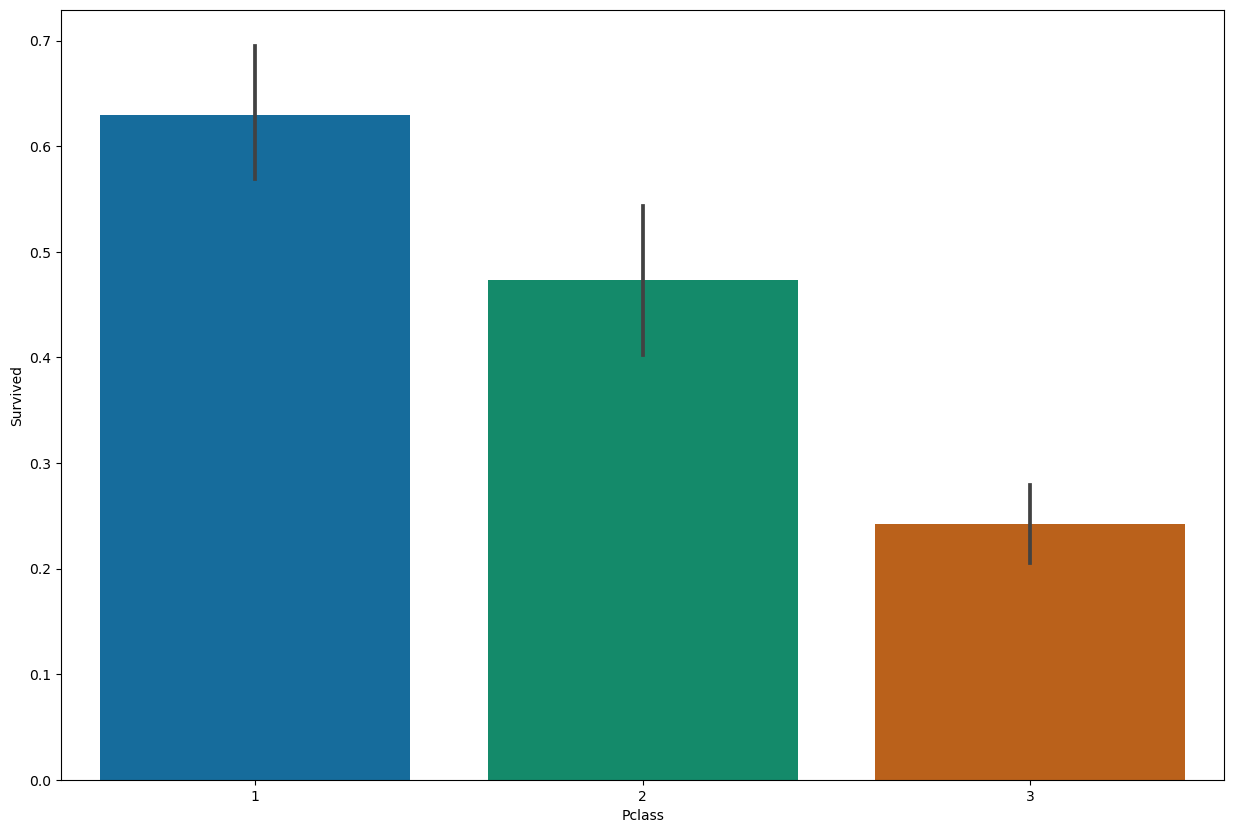

In [6]:
# gráfico de barra 
# y dependiente(survived) vs. x clase
explore.discrete_var_barplot(x='Pclass',y='Survived',data=data,output_path='./data/outs')


Image saved at ./data/outs\Countplot_Pclass.png


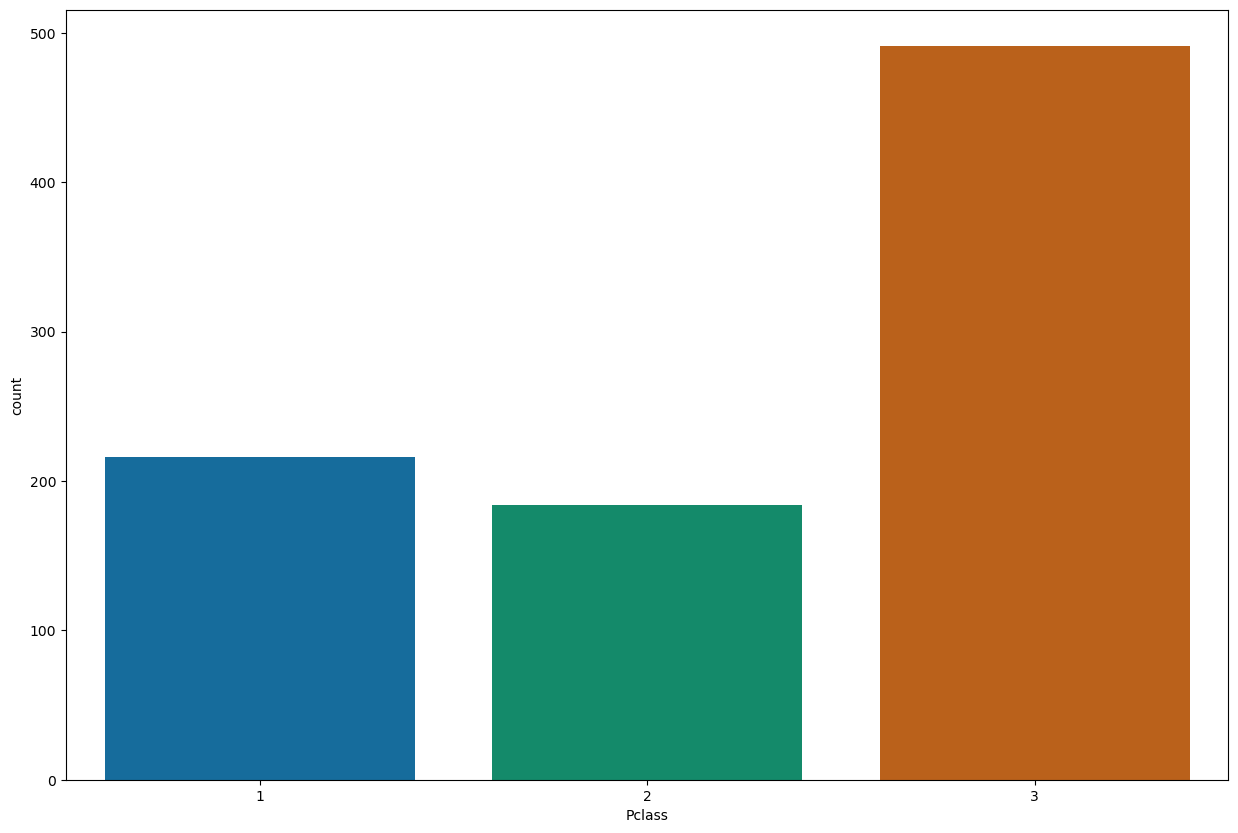

In [8]:
# count plot: contar observaciones por categoria en columna 
# x clase
explore.discrete_var_countplot(x='Pclass',data=data,output_path='./data/outs')

Image saved at ./data/outs\Boxplot_Pclass_Fare.png


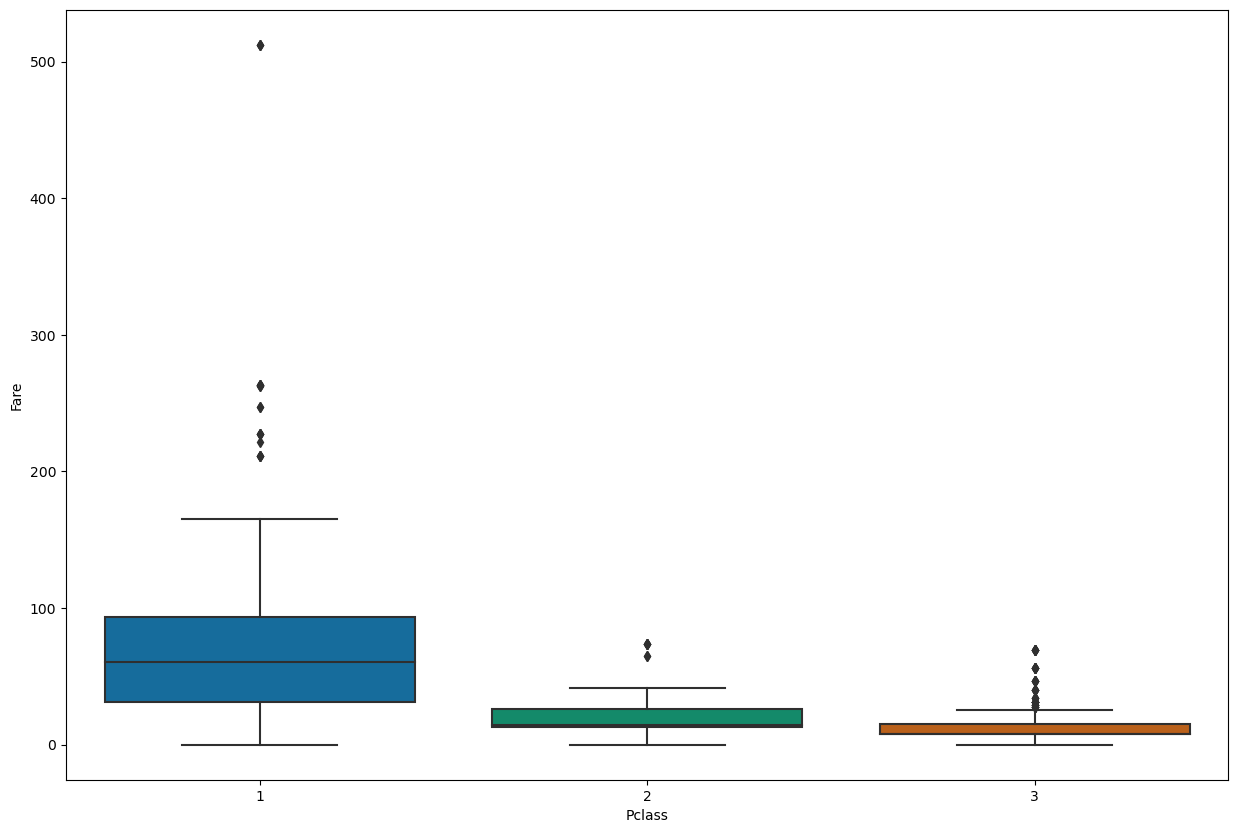

In [10]:
# box plot 
# y Fare vs. x clase
explore.discrete_var_boxplot(x='Pclass',y='Fare',data=data,output_path='./data/outs')

c:\Users\Diego\OneDrive\Documents\GitHub\tech_skills\etl\data_exploration\explore.py:138: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=x,kde=False,bins=bins)


Image saved at ./data/outs\Distplot_Fare.png


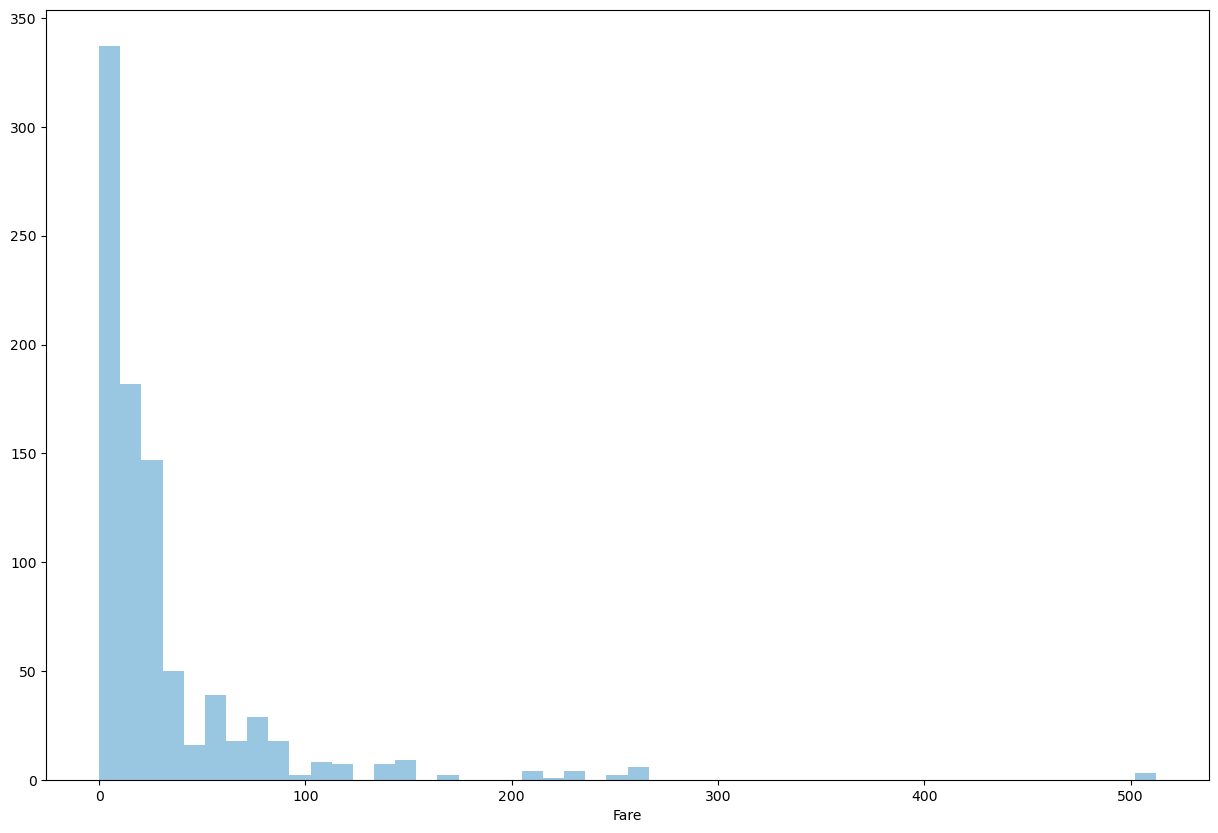

In [11]:
# gráfico de distribución
# variable 'Fare'
explore.continuous_var_distplot(x=data['Fare'],output_path='./data/outs')

Image saved at ./data/outs\Scatter_plot_Fare_Pclass.png


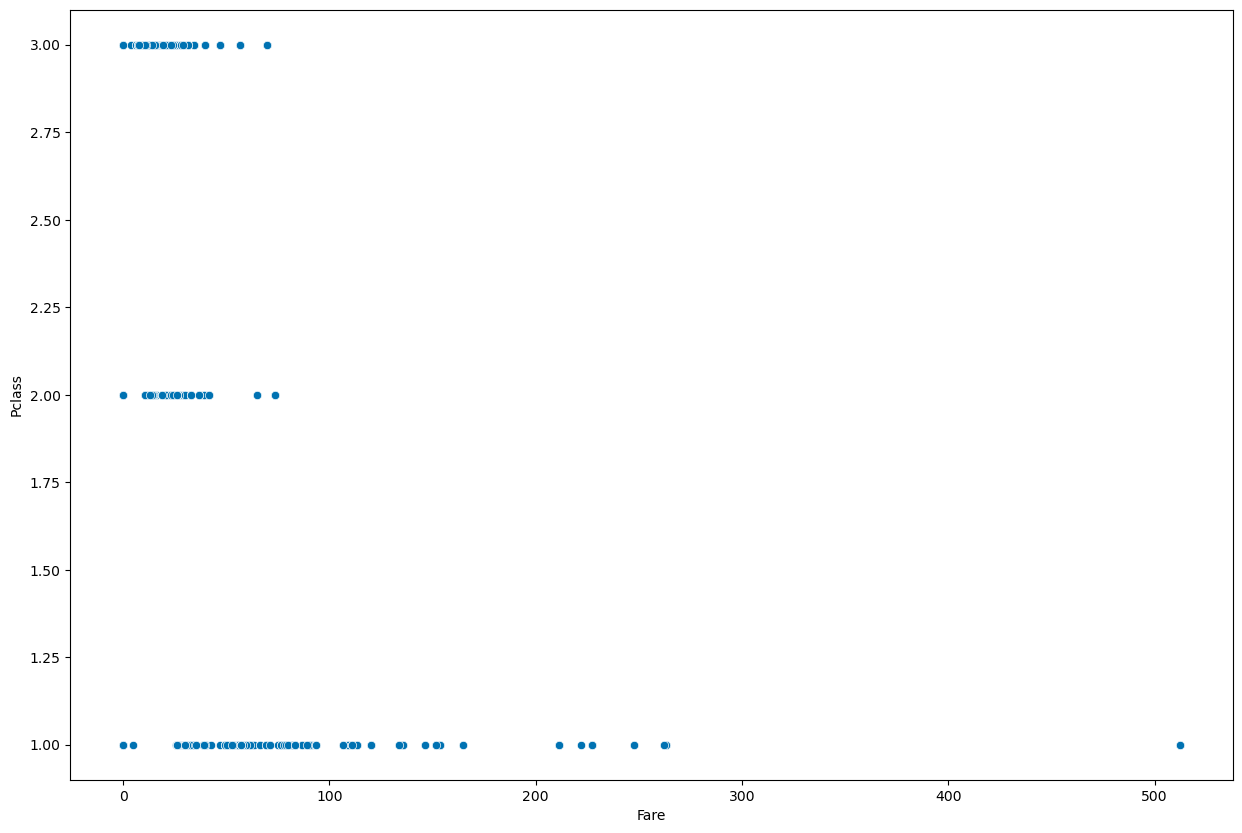

In [9]:
# gráfico discreto
# y clase, x Fare
explore.scatter_plot(x=data.Fare,y=data.Pclass,data=data,output_path='./data/outs')


## Técnicas de correlación

c:\Users\Diego\OneDrive\Documents\GitHub\tech_skills\etl\data_exploration\explore.py:179: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = data.corr()


Image saved at ./data/outs\Corr_plot.png


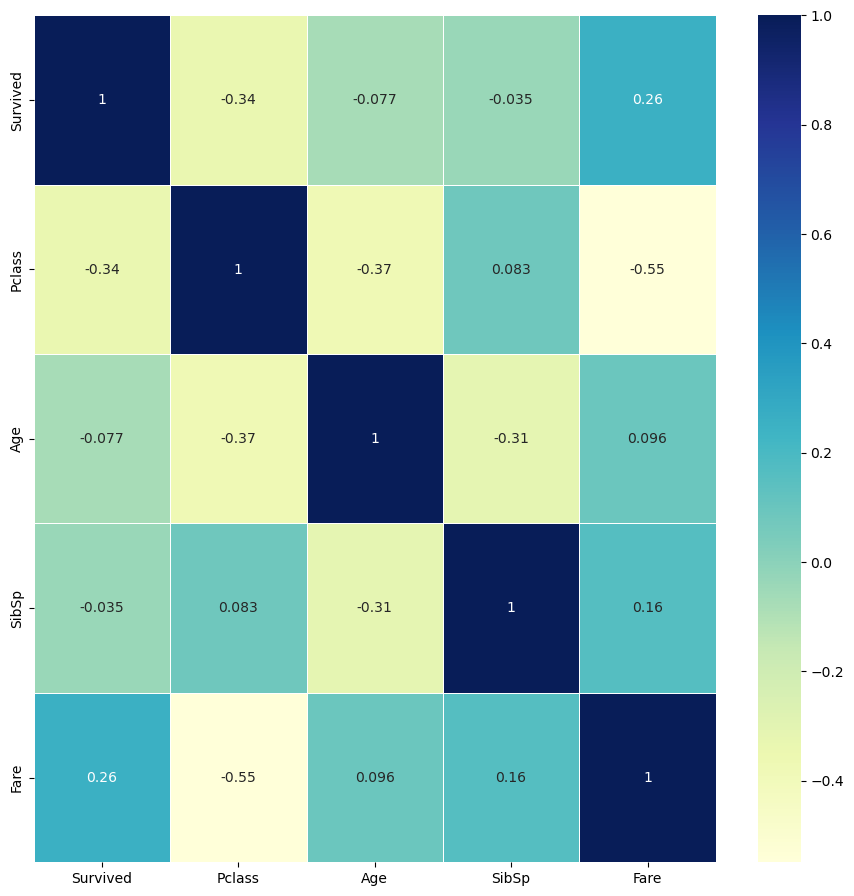

In [10]:
# gráfico de correlación entre columnas (variables) de DataFrame
explore.correlation_plot(data=data,output_path='./data/outs')


   year month  passengers
0  1949   Jan         112
1  1949   Feb         118
2  1949   Mar         132
3  1949   Apr         129
4  1949   May         121


C:\Users\Diego\AppData\Local\Temp\ipykernel_15792\568799939.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  flights = flights.pivot("month", "year", "passengers")


Image saved at ./data/outs\Heatmap.png


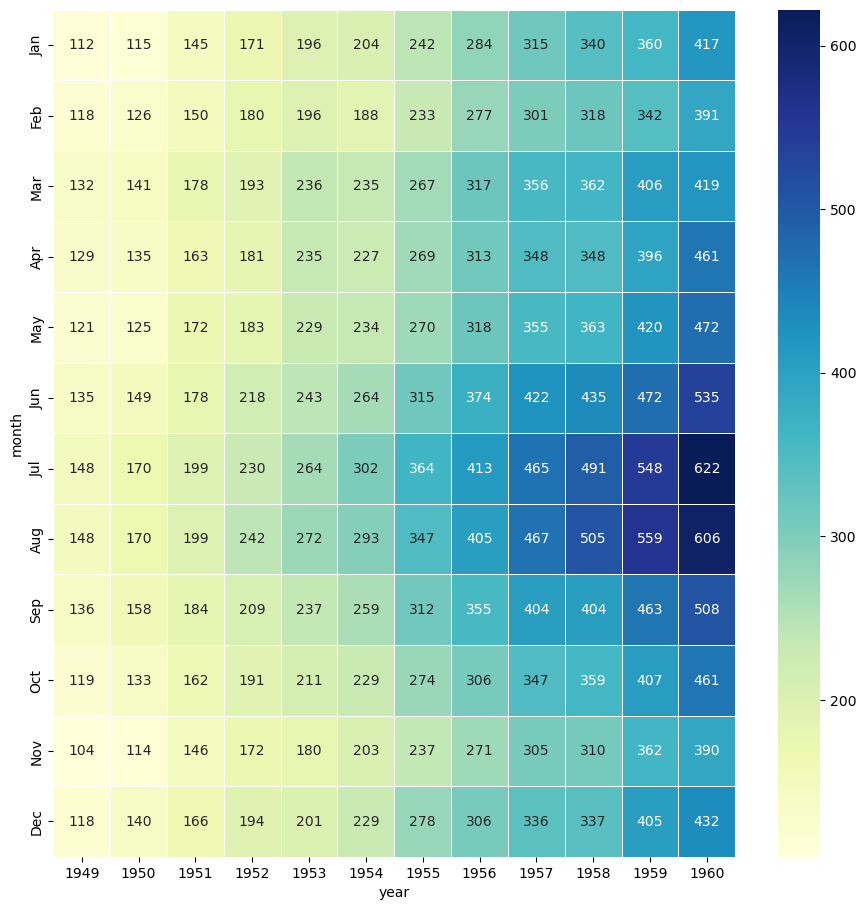

In [13]:
# mapa de calor (frecuencia)

flights = sns.load_dataset("flights") # cargar base de datos "flights"
print(flights.head(5))

# explore.heatmap(data=data[['Sex','Survived']])

flights = flights.pivot("month", "year", "passengers")
explore.heatmap(data=flights,output_path='./data/outs')

# Preprocesamiento

## Limpieza de datos

In [18]:
# cargar bases de datos 
df=pd.read_csv("data/presidents.csv")
df.head()

#          President             Born      Age atstart of presidency  \
0  1  George Washington  Feb 22, 1732[a]  57 years, 67 daysApr 30, 1789   
1  2         John Adams  Oct 30, 1735[a]  61 years, 125 daysMar 4, 1797   
2  3   Thomas Jefferson  Apr 13, 1743[a]  57 years, 325 daysMar 4, 1801   
3  4      James Madison  Mar 16, 1751[a]  57 years, 353 daysMar 4, 1809   
4  5       James Monroe     Apr 28, 1758  58 years, 310 daysMar 4, 1817   

         Age atend of presidency Post-presidencytimespan          Died  \
0   65 years, 10 daysMar 4, 1797       2 years, 285 days  Dec 14, 1799   
1  65 years, 125 daysMar 4, 1801      25 years, 122 days   Jul 4, 1826   
2  65 years, 325 daysMar 4, 1809      17 years, 122 days   Jul 4, 1826   
3  65 years, 353 daysMar 4, 1817      19 years, 116 days  Jun 28, 1836   
4  66 years, 310 daysMar 4, 1825       6 years, 122 days   Jul 4, 1831   

                  Age  
0  67 years, 295 days  
1  90 years, 247 days  
2   83 years, 82 days  
3  85 years, 104 days  
4   73 years, 67 days

In [19]:

# crear columna "First" como copia de columna  'President'
df["First"]=df['President']

# Agregar los nombres de Presidentes con regex=True
# reemplazar "[ ].*", "" con regex
# extraer primer nombre
df["First"]=df["First"].replace("[ ].*", "", regex=True)
df.head()

#          President             Born      Age atstart of presidency  \
0  1  George Washington  Feb 22, 1732[a]  57 years, 67 daysApr 30, 1789   
1  2         John Adams  Oct 30, 1735[a]  61 years, 125 daysMar 4, 1797   
2  3   Thomas Jefferson  Apr 13, 1743[a]  57 years, 325 daysMar 4, 1801   
3  4      James Madison  Mar 16, 1751[a]  57 years, 353 daysMar 4, 1809   
4  5       James Monroe     Apr 28, 1758  58 years, 310 daysMar 4, 1817   

         Age atend of presidency Post-presidencytimespan          Died  \
0   65 years, 10 daysMar 4, 1797       2 years, 285 days  Dec 14, 1799   
1  65 years, 125 daysMar 4, 1801      25 years, 122 days   Jul 4, 1826   
2  65 years, 325 daysMar 4, 1809      17 years, 122 days   Jul 4, 1826   
3  65 years, 353 daysMar 4, 1817      19 years, 116 days  Jun 28, 1836   
4  66 years, 310 daysMar 4, 1825       6 years, 122 days   Jul 4, 1831   

                  Age   First  
0  67 years, 295 days  George  
1  90 years, 247 days    John  
2   83 years, 82 days  Thomas  
3  85 years, 104 days   James  
4   73 years, 67 days   James

In [20]:
# borrar columna "First" 
del(df["First"])

# hacer metodo splitname y agregar 2 columnas al DataFrame

# funcion splitname(row): split fila en columnas row['First'], row['Last']
# parametros: fila de DataFrame

def splitname(row):
    
    # crear columna 'First' en la fila DataFrame
    # aplicar split(" ") sobre la columna row['President'] primera posición  
    row['First']=row['President'].split(" ")[0]
    
    # crear columna 'Last' en la fila DataFrame
    # aplicar split(" ") sobre la columna row['President'] última posición  
    row['Last']=row['President'].split(" ")[-1]
    
    return row # returns: fila modificada

# aplicar un método sobre el DataFrame, sobre las filas y/o columnas
# función: splitname
# axis= 'columns' columnas
df=df.apply(splitname, axis='columns')
df.head()

#          President             Born      Age atstart of presidency  \
0  1  George Washington  Feb 22, 1732[a]  57 years, 67 daysApr 30, 1789   
1  2         John Adams  Oct 30, 1735[a]  61 years, 125 daysMar 4, 1797   
2  3   Thomas Jefferson  Apr 13, 1743[a]  57 years, 325 daysMar 4, 1801   
3  4      James Madison  Mar 16, 1751[a]  57 years, 353 daysMar 4, 1809   
4  5       James Monroe     Apr 28, 1758  58 years, 310 daysMar 4, 1817   

         Age atend of presidency Post-presidencytimespan          Died  \
0   65 years, 10 daysMar 4, 1797       2 years, 285 days  Dec 14, 1799   
1  65 years, 125 daysMar 4, 1801      25 years, 122 days   Jul 4, 1826   
2  65 years, 325 daysMar 4, 1809      17 years, 122 days   Jul 4, 1826   
3  65 years, 353 daysMar 4, 1817      19 years, 116 days  Jun 28, 1836   
4  66 years, 310 daysMar 4, 1825       6 years, 122 days   Jul 4, 1831   

                  Age   First        Last  
0  67 years, 295 days  George  Washington  
1  90 years, 247 days    John       Adams  
2   83 years, 82 days  Thomas   Jefferson  
3  85 years, 104 days   James     Madison  
4   73 years, 67 days   James      Monroe

In [21]:
# quitar columnas de DataFrame
del(df['First'])
del(df['Last'])

# patron de 3 grupos, retorna primer y segundo nombre
pattern="(^[\w]*)(?:.* )([\w]*$)"

# extraer patron de columna "President"
df["President"].str.extract(pattern).head()

0           1
0  George  Washington
1    John       Adams
2  Thomas   Jefferson
3   James     Madison
4   James      Monroe

In [23]:
# patron de 3 grupos, retorna primer y segundo nombre
# nombres de grupos First, Last
pattern="(?P<First>^[\w]*)(?:.* )(?P<Last>[\w]*$)"

# Now call extract
names=df["President"].str.extract(pattern).head()
names

# crear columnas "First", "Last"
df["First"]=names["First"]
df["Last"]=names["Last"]
df.head()

#          President             Born      Age atstart of presidency  \
0  1  George Washington  Feb 22, 1732[a]  57 years, 67 daysApr 30, 1789   
1  2         John Adams  Oct 30, 1735[a]  61 years, 125 daysMar 4, 1797   
2  3   Thomas Jefferson  Apr 13, 1743[a]  57 years, 325 daysMar 4, 1801   
3  4      James Madison  Mar 16, 1751[a]  57 years, 353 daysMar 4, 1809   
4  5       James Monroe     Apr 28, 1758  58 years, 310 daysMar 4, 1817   

         Age atend of presidency Post-presidencytimespan          Died  \
0   65 years, 10 daysMar 4, 1797       2 years, 285 days  Dec 14, 1799   
1  65 years, 125 daysMar 4, 1801      25 years, 122 days   Jul 4, 1826   
2  65 years, 325 daysMar 4, 1809      17 years, 122 days   Jul 4, 1826   
3  65 years, 353 daysMar 4, 1817      19 years, 116 days  Jun 28, 1836   
4  66 years, 310 daysMar 4, 1825       6 years, 122 days   Jul 4, 1831   

                  Age   First        Last  
0  67 years, 295 days  George  Washington  
1  90 years, 247 days    John       Adams  
2   83 years, 82 days  Thomas   Jefferson  
3  85 years, 104 days   James     Madison  
4   73 years, 67 days   James      Monroe

In [25]:
# extraer patron Month Day Year  de columna "Born"
df["Born"]=df["Born"].str.extract("([\w]{3} [\w]{1,2}, [\w]{4})")
df["Born"].head()


# convertir columna df["Born"] a objeto datetime
df["Born"]=pd.to_datetime(df["Born"])
df["Born"].head()

0   1732-02-22
1   1735-10-30
2   1743-04-13
3   1751-03-16
4   1758-04-28
Name: Born, dtype: datetime64[ns]

## Missing Values



In [108]:
# cargar base de datos
df = pd.read_csv('data/class_grades.csv')
df.head(10)

Prefix  Assignment  Tutorial  Midterm  TakeHome  Final
0       5       57.14     34.09    64.38     51.48  52.50
1       8       95.05    105.49    67.50     99.07  68.33
2       8       83.70     83.17      NaN     63.15  48.89
3       7         NaN       NaN    49.38    105.93  80.56
4       8       91.32     93.64    95.00    107.41  73.89
5       7       95.00     92.58    93.12     97.78  68.06
6       8       95.05    102.99    56.25     99.07  50.00
7       7       72.85     86.85    60.00       NaN  56.11
8       8       84.26     93.10    47.50     18.52  50.83
9       7       90.10     97.55    51.25     88.89  63.61

In [109]:
# crear máscara booleana sobre valores NULL en DataFrame
mask=df.isnull()
mask.head(10)

Prefix  Assignment  Tutorial  Midterm  TakeHome  Final
0   False       False     False    False     False  False
1   False       False     False    False     False  False
2   False       False     False     True     False  False
3   False        True      True    False     False  False
4   False       False     False    False     False  False
5   False       False     False    False     False  False
6   False       False     False    False     False  False
7   False       False     False    False      True  False
8   False       False     False    False     False  False
9   False       False     False    False     False  False

In [110]:
# quitar filas con algun valor NA
df.dropna().head(10)

Prefix  Assignment  Tutorial  Midterm  TakeHome  Final
0        5       57.14     34.09    64.38     51.48  52.50
1        8       95.05    105.49    67.50     99.07  68.33
4        8       91.32     93.64    95.00    107.41  73.89
5        7       95.00     92.58    93.12     97.78  68.06
6        8       95.05    102.99    56.25     99.07  50.00
8        8       84.26     93.10    47.50     18.52  50.83
9        7       90.10     97.55    51.25     88.89  63.61
10       7       80.44     90.20    75.00     91.48  39.72
12       8       97.16    103.71    72.50     93.52  63.33
13       7       91.28     83.53    81.25     99.81  92.22

In [111]:
# cambiar NAs en DataFrame por valor por parámetros
# inplace=True  modifica el DataFrame
df.fillna(0, inplace=True)
df.head(10)

Prefix  Assignment  Tutorial  Midterm  TakeHome  Final
0       5       57.14     34.09    64.38     51.48  52.50
1       8       95.05    105.49    67.50     99.07  68.33
2       8       83.70     83.17     0.00     63.15  48.89
3       7        0.00      0.00    49.38    105.93  80.56
4       8       91.32     93.64    95.00    107.41  73.89
5       7       95.00     92.58    93.12     97.78  68.06
6       8       95.05    102.99    56.25     99.07  50.00
7       7       72.85     86.85    60.00      0.00  56.11
8       8       84.26     93.10    47.50     18.52  50.83
9       7       90.10     97.55    51.25     88.89  63.61

In [113]:
df = pd.read_csv("data/log.csv")
df.head(20)

time    user          video  playback position paused  volume
0   1469974424  cheryl     intro.html                  5  False    10.0
1   1469974454  cheryl     intro.html                  6    NaN     NaN
2   1469974544  cheryl     intro.html                  9    NaN     NaN
3   1469974574  cheryl     intro.html                 10    NaN     NaN
4   1469977514     bob     intro.html                  1    NaN     NaN
5   1469977544     bob     intro.html                  1    NaN     NaN
6   1469977574     bob     intro.html                  1    NaN     NaN
7   1469977604     bob     intro.html                  1    NaN     NaN
8   1469974604  cheryl     intro.html                 11    NaN     NaN
9   1469974694  cheryl     intro.html                 14    NaN     NaN
10  1469974724  cheryl     intro.html                 15    NaN     NaN
11  1469974454     sue  advanced.html                 24    NaN     NaN
12  1469974524     sue  advanced.html                 25    NaN     NaN
13  1469974424     sue  advanced.html                 23  False    10.0
14  1469974554     sue  advanced.html                 26    NaN     NaN
15  1469974624     sue  advanced.html                 27    NaN     NaN
16  1469974654     sue  advanced.html                 28    NaN     5.0
17  1469974724     sue  advanced.html                 29    NaN     NaN
18  1469974484  cheryl     intro.html                  7    NaN     NaN
19  1469974514  cheryl     intro.html                  8    NaN     NaN

In [114]:
# set indice a columna 'time' 
df = df.set_index('time')


# organizar indice 
df = df.sort_index()
df.head(20)

user          video  playback position paused  volume
time                                                               
1469974424  cheryl     intro.html                  5  False    10.0
1469974424     sue  advanced.html                 23  False    10.0
1469974454  cheryl     intro.html                  6    NaN     NaN
1469974454     sue  advanced.html                 24    NaN     NaN
1469974484  cheryl     intro.html                  7    NaN     NaN
1469974514  cheryl     intro.html                  8    NaN     NaN
1469974524     sue  advanced.html                 25    NaN     NaN
1469974544  cheryl     intro.html                  9    NaN     NaN
1469974554     sue  advanced.html                 26    NaN     NaN
1469974574  cheryl     intro.html                 10    NaN     NaN
1469974604  cheryl     intro.html                 11    NaN     NaN
1469974624     sue  advanced.html                 27    NaN     NaN
1469974634  cheryl     intro.html                 12    NaN     NaN
1469974654     sue  advanced.html                 28    NaN     5.0
1469974664  cheryl     intro.html                 13    NaN     NaN
1469974694  cheryl     intro.html                 14    NaN     NaN
1469974724  cheryl     intro.html                 15    NaN     NaN
1469974724     sue  advanced.html                 29    NaN     NaN
1469974754     sue  advanced.html                 30    NaN     NaN
1469974824     sue  advanced.html                 31    NaN     NaN

In [115]:
# reiniciar el indice numerico 
df = df.reset_index()

# usar multi-indices con columnas 'time', 'user' 
df = df.set_index(['time', 'user'])
df

video  playback position paused  volume
time       user                                                   
1469974424 cheryl     intro.html                  5  False    10.0
           sue     advanced.html                 23  False    10.0
1469974454 cheryl     intro.html                  6    NaN     NaN
           sue     advanced.html                 24    NaN     NaN
1469974484 cheryl     intro.html                  7    NaN     NaN
1469974514 cheryl     intro.html                  8    NaN     NaN
1469974524 sue     advanced.html                 25    NaN     NaN
1469974544 cheryl     intro.html                  9    NaN     NaN
1469974554 sue     advanced.html                 26    NaN     NaN
1469974574 cheryl     intro.html                 10    NaN     NaN
1469974604 cheryl     intro.html                 11    NaN     NaN
1469974624 sue     advanced.html                 27    NaN     NaN
1469974634 cheryl     intro.html                 12    NaN     NaN
1469974654 sue     advanced.html                 28    NaN     5.0
1469974664 cheryl     intro.html                 13    NaN     NaN
1469974694 cheryl     intro.html                 14    NaN     NaN
1469974724 cheryl     intro.html                 15    NaN     NaN
           sue     advanced.html                 29    NaN     NaN
1469974754 sue     advanced.html                 30    NaN     NaN
1469974824 sue     advanced.html                 31    NaN     NaN
1469974854 sue     advanced.html                 32    NaN     NaN
1469974924 sue     advanced.html                 33    NaN     NaN
1469977424 bob        intro.html                  1   True    10.0
1469977454 bob        intro.html                  1    NaN     NaN
1469977484 bob        intro.html                  1    NaN     NaN
1469977514 bob        intro.html                  1    NaN     NaN
1469977544 bob        intro.html                  1    NaN     NaN
1469977574 bob        intro.html                  1    NaN     NaN
1469977604 bob        intro.html                  1    NaN     NaN
1469977634 bob        intro.html                  1    NaN     NaN
1469977664 bob        intro.html                  1    NaN     NaN
1469977694 bob        intro.html                  1    NaN     NaN
1469977724 bob        intro.html                  1    NaN     NaN

In [117]:
# modificar los NAs con método ffill
df = df.fillna(method='ffill')
df

video  playback position  paused  volume
time       user                                                    
1469974424 cheryl     intro.html                  5   False    10.0
           sue     advanced.html                 23   False    10.0
1469974454 cheryl     intro.html                  6   False    10.0
           sue     advanced.html                 24   False    10.0
1469974484 cheryl     intro.html                  7   False    10.0
1469974514 cheryl     intro.html                  8   False    10.0
1469974524 sue     advanced.html                 25   False    10.0
1469974544 cheryl     intro.html                  9   False    10.0
1469974554 sue     advanced.html                 26   False    10.0
1469974574 cheryl     intro.html                 10   False    10.0
1469974604 cheryl     intro.html                 11   False    10.0
1469974624 sue     advanced.html                 27   False    10.0
1469974634 cheryl     intro.html                 12   False    10.0
1469974654 sue     advanced.html                 28   False     5.0
1469974664 cheryl     intro.html                 13   False     5.0
1469974694 cheryl     intro.html                 14   False     5.0
1469974724 cheryl     intro.html                 15   False     5.0
           sue     advanced.html                 29   False     5.0
1469974754 sue     advanced.html                 30   False     5.0
1469974824 sue     advanced.html                 31   False     5.0
1469974854 sue     advanced.html                 32   False     5.0
1469974924 sue     advanced.html                 33   False     5.0
1469977424 bob        intro.html                  1    True    10.0
1469977454 bob        intro.html                  1    True    10.0
1469977484 bob        intro.html                  1    True    10.0
1469977514 bob        intro.html                  1    True    10.0
1469977544 bob        intro.html                  1    True    10.0
1469977574 bob        intro.html                  1    True    10.0
1469977604 bob        intro.html                  1    True    10.0
1469977634 bob        intro.html                  1    True    10.0
1469977664 bob        intro.html                  1    True    10.0
1469977694 bob        intro.html                  1    True    10.0
1469977724 bob        intro.html                  1    True    10.0

In [119]:
# hacer DataFrame con dict 
df = pd.DataFrame({'A': [1, 1, 2, 3, 4],
                   'B': [3, 6, 3, 8, 9],
                   'C': ['a', 'b', 'c', 'd', 'e']})

# reemplazar valores 1 con 100
df.replace(1, 100)

A  B  C
0  100  3  a
1  100  6  b
2    2  3  c
3    3  8  d
4    4  9  e

In [120]:
# reemplazar valores 1 con 3, valores 100 con 300 
df.replace([1, 3], [100, 300])

A    B  C
0  100  300  a
1  100    6  b
2    2  300  c
3  300    8  d
4    4    9  e

In [122]:
# cargar base 
df = pd.read_csv("data/log.csv")
df.head(20)

time    user          video  playback position paused  volume
0   1469974424  cheryl     intro.html                  5  False    10.0
1   1469974454  cheryl     intro.html                  6    NaN     NaN
2   1469974544  cheryl     intro.html                  9    NaN     NaN
3   1469974574  cheryl     intro.html                 10    NaN     NaN
4   1469977514     bob     intro.html                  1    NaN     NaN
5   1469977544     bob     intro.html                  1    NaN     NaN
6   1469977574     bob     intro.html                  1    NaN     NaN
7   1469977604     bob     intro.html                  1    NaN     NaN
8   1469974604  cheryl     intro.html                 11    NaN     NaN
9   1469974694  cheryl     intro.html                 14    NaN     NaN
10  1469974724  cheryl     intro.html                 15    NaN     NaN
11  1469974454     sue  advanced.html                 24    NaN     NaN
12  1469974524     sue  advanced.html                 25    NaN     NaN
13  1469974424     sue  advanced.html                 23  False    10.0
14  1469974554     sue  advanced.html                 26    NaN     NaN
15  1469974624     sue  advanced.html                 27    NaN     NaN
16  1469974654     sue  advanced.html                 28    NaN     5.0
17  1469974724     sue  advanced.html                 29    NaN     NaN
18  1469974484  cheryl     intro.html                  7    NaN     NaN
19  1469974514  cheryl     intro.html                  8    NaN     NaN

In [123]:
# reemplazar ".*.html$" con "webpage"
# regex=true
df.replace(to_replace=".*.html$", value="webpage", regex=True)

time    user    video  playback position paused  volume
0   1469974424  cheryl  webpage                  5  False    10.0
1   1469974454  cheryl  webpage                  6    NaN     NaN
2   1469974544  cheryl  webpage                  9    NaN     NaN
3   1469974574  cheryl  webpage                 10    NaN     NaN
4   1469977514     bob  webpage                  1    NaN     NaN
5   1469977544     bob  webpage                  1    NaN     NaN
6   1469977574     bob  webpage                  1    NaN     NaN
7   1469977604     bob  webpage                  1    NaN     NaN
8   1469974604  cheryl  webpage                 11    NaN     NaN
9   1469974694  cheryl  webpage                 14    NaN     NaN
10  1469974724  cheryl  webpage                 15    NaN     NaN
11  1469974454     sue  webpage                 24    NaN     NaN
12  1469974524     sue  webpage                 25    NaN     NaN
13  1469974424     sue  webpage                 23  False    10.0
14  1469974554     sue  webpage                 26    NaN     NaN
15  1469974624     sue  webpage                 27    NaN     NaN
16  1469974654     sue  webpage                 28    NaN     5.0
17  1469974724     sue  webpage                 29    NaN     NaN
18  1469974484  cheryl  webpage                  7    NaN     NaN
19  1469974514  cheryl  webpage                  8    NaN     NaN
20  1469974754     sue  webpage                 30    NaN     NaN
21  1469974824     sue  webpage                 31    NaN     NaN
22  1469974854     sue  webpage                 32    NaN     NaN
23  1469974924     sue  webpage                 33    NaN     NaN
24  1469977424     bob  webpage                  1   True    10.0
25  1469977454     bob  webpage                  1    NaN     NaN
26  1469977484     bob  webpage                  1    NaN     NaN
27  1469977634     bob  webpage                  1    NaN     NaN
28  1469977664     bob  webpage                  1    NaN     NaN
29  1469974634  cheryl  webpage                 12    NaN     NaN
30  1469974664  cheryl  webpage                 13    NaN     NaN
31  1469977694     bob  webpage                  1    NaN     NaN
32  1469977724     bob  webpage                  1    NaN     NaN